### This notebook actually calculates a representative subsample of GBS. ROC Curves are therefore combined with increasing brightness to demonstrate the progress. Iterations stop around 0.5.

In [63]:
from pathlib import Path
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

path = Path(os.getcwd()).parent

def roc(y_test, preds, iteration, name):
    alpha = min(iteration+0.2,0.8)
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    #plt.title('Iteration: '+ str(name))
    plt.figure(figsize=(12,8))
    plt.plot(fpr, tpr, 'black', label = 'AUC = %0.2f' % roc_auc,alpha=alpha)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'k--', alpha=alpha)
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.savefig(os.path.join(path, 'tex/fig/roc/'+str(name)+'.png'))
    plt.show()
    return roc_auc

In [64]:
gbs = pd.read_csv(os.path.join(path, 'data/gbs_processed.csv'), encoding = "ISO-8859-1", delimiter = ',')
gesis = pd.read_csv(os.path.join(path, 'data/gesis_processed.csv'), encoding = "ISO-8859-1", delimiter = ',')

gbs = gbs.fillna(gbs.median())
gesis = gesis.fillna(gesis.median())

gbs['Umfrage'] = 1
gesis['Umfrage'] = 0

In [56]:
gbs.columns

Index(['Geschlecht', 'Geburtsjahr', 'Erwerbstaetigkeit', 'Wahlteilnahme',
       'leicht Vertrauen', 'Faulheit', 'Entspannt',
       'wenig kuenstlerisches Interesse', 'Gesellig', 'Andere kritisieren',
       'Gruendlich', 'Nervoes', 'Phantasievoll', 'Umfrage'],
      dtype='object')

In [58]:
gesis['Erwerbstaetigkeit'].value_counts()

0.0    2082
2.0    1235
3.0     890
4.0      42
Name: Erwerbstaetigkeit, dtype: int64

In [65]:
gesis.drop(columns = ['GESIS-CODE'], axis=1, inplace = True)
gbs.drop(columns = ['GBS-CODE', 'Gruppe'], axis=1, inplace = True)

drop = ['Personen im Haushalt', 'Druck', 'Optimismus Zukunft', 'Geburtsland', 'Nationalitaet',
       'Familienstand', 'Hoechster Bildungsabschluss', 'Berufliche Ausbildung',
       'Berufsgruppe', 'Leben genießen', 'Zu Nichts aufraffen',
       'Alles anstrengend', 'Zufriedenheit Leben', 'Aktiv', 'Verärgert',
       'Zufriedenheit Wahlergebnis', 'Resilienz', 'Wach', 'Nervös', 'Ängstlich', 'Zurueckhaltend',
       'Nettoeinkommen Selbst', 'Nettoeinkommen Haushalt', 'Schlechter Schlaf',
       'Wahlabsicht', 'Desinteresse Politiker']

gbs.drop(columns=drop, axis=1, inplace=True)
gesis.drop(columns=drop, axis=1, inplace=True)

gbs_base = gbs.copy()

[0.02305655 0.21623221 0.32802278 0.03075804 0.12852182 0.04229906
 0.03190524 0.04297231 0.02629948 0.02882099 0.02927679 0.03581084
 0.03602389]


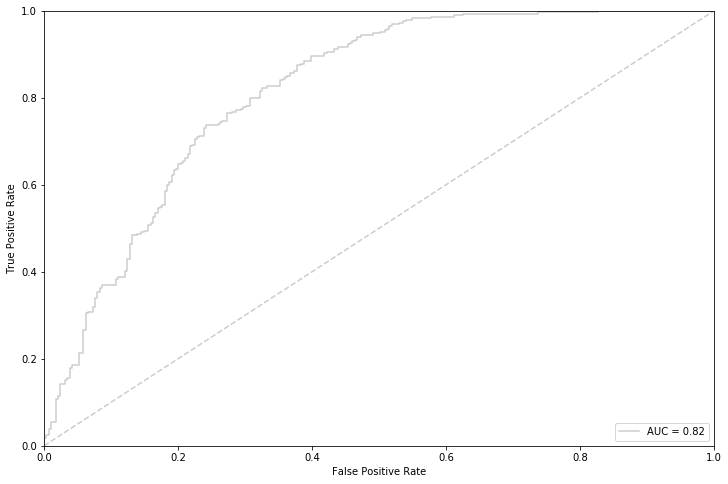

[0.02197624 0.2104659  0.38743317 0.07528376 0.0604133  0.02823399
 0.04238153 0.02454843 0.01910579 0.0285242  0.02116301 0.05531199
 0.0251587 ]


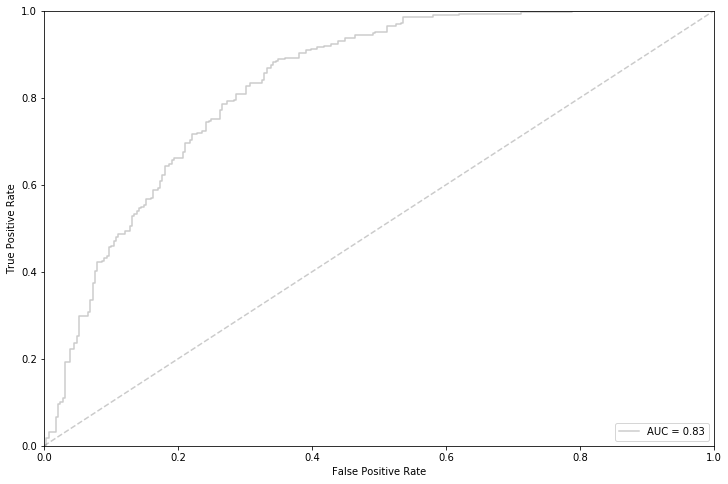

[0.02381059 0.20205403 0.36547937 0.05325507 0.06307529 0.04099016
 0.04997163 0.03548522 0.02118882 0.02311505 0.02148642 0.05793835
 0.04214999]


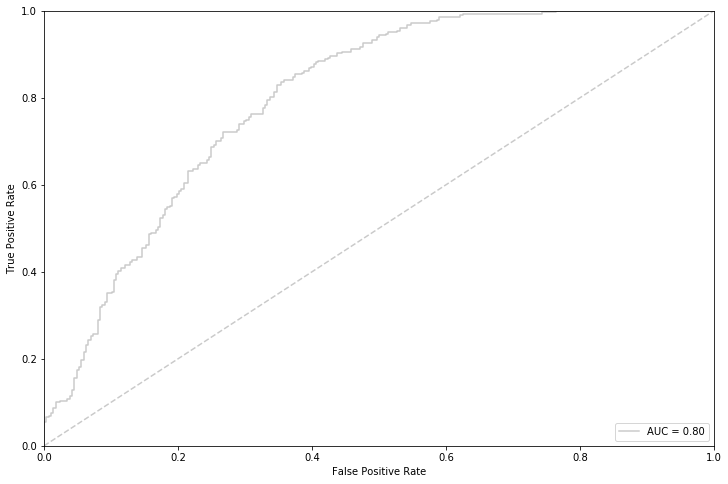

[0.04087421 0.22602204 0.32920414 0.05892094 0.07907658 0.03821718
 0.0333576  0.04452247 0.03316943 0.01949949 0.02014638 0.04299483
 0.03399472]


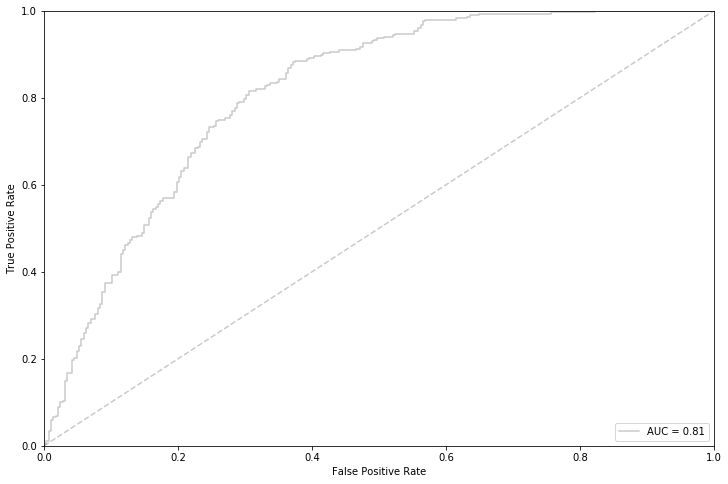

[0.04809474 0.18727238 0.29790981 0.0529808  0.10923407 0.02907641
 0.03189376 0.05590365 0.02581214 0.03224188 0.02358968 0.06577721
 0.04021347]


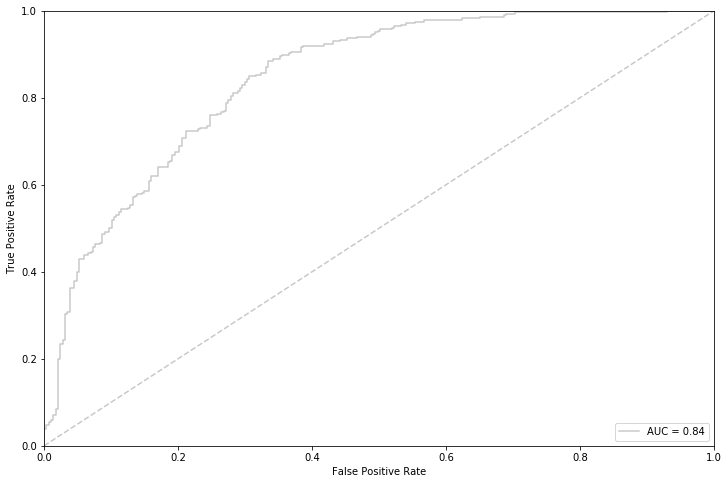

[0.02232763 0.23207776 0.29774941 0.09585348 0.06606774 0.03226077
 0.04197288 0.04109593 0.03406945 0.01754173 0.02628    0.0464706
 0.0462326 ]


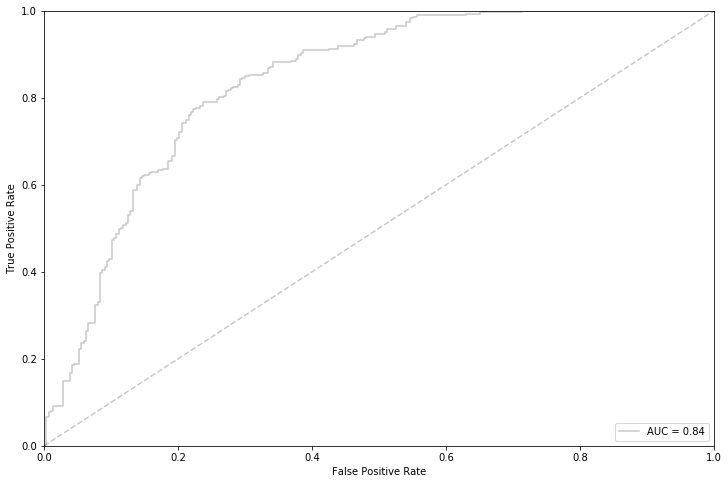

[0.03014051 0.19709968 0.33044567 0.0291771  0.09467818 0.02937939
 0.05812525 0.05104126 0.0243191  0.02187005 0.02063892 0.06108868
 0.05199621]


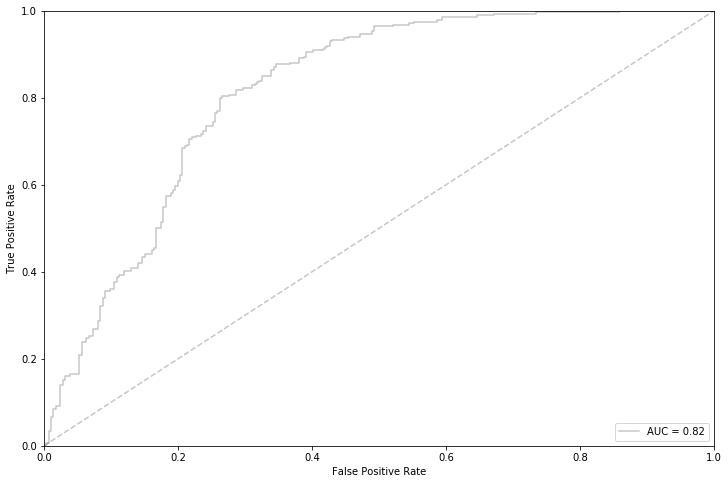

[0.01695405 0.24685534 0.2827048  0.09807322 0.06927477 0.07453455
 0.03281308 0.05247875 0.01902246 0.01924769 0.01987125 0.04349188
 0.02467815]


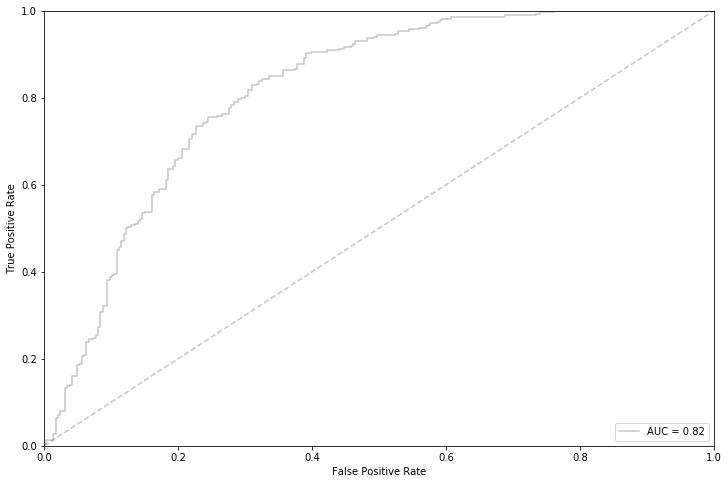

[0.02487142 0.19376391 0.36839707 0.05485293 0.08389378 0.03336124
 0.03747717 0.03642749 0.01957261 0.02375862 0.02412279 0.06055039
 0.03895056]


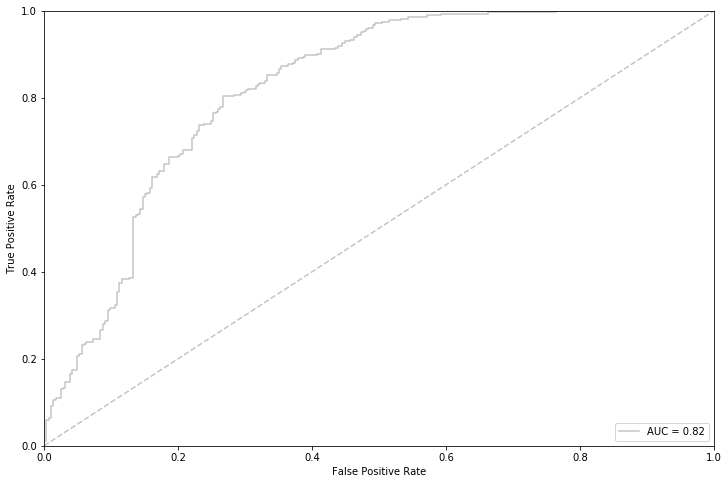

[0.03029263 0.22987973 0.31566617 0.05768711 0.09371076 0.04064261
 0.02449125 0.04709242 0.02376591 0.02092946 0.01436964 0.05374403
 0.0477283 ]


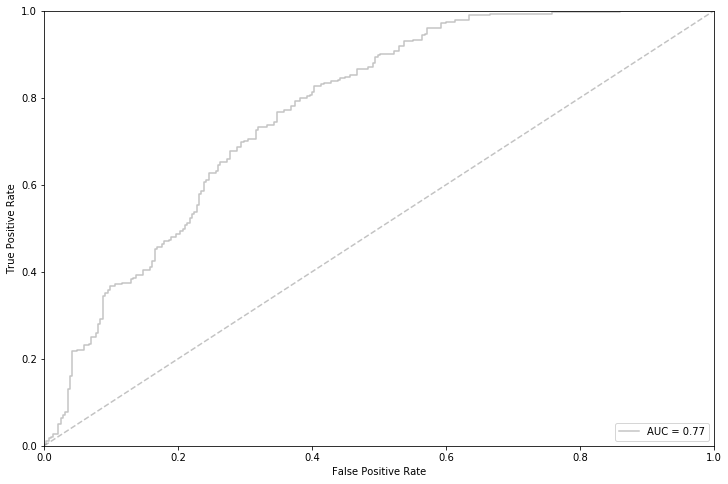

[0.01739107 0.21147327 0.35793029 0.03343758 0.07968795 0.03430644
 0.06496681 0.03192326 0.02668505 0.0192889  0.0235217  0.06227165
 0.03711603]


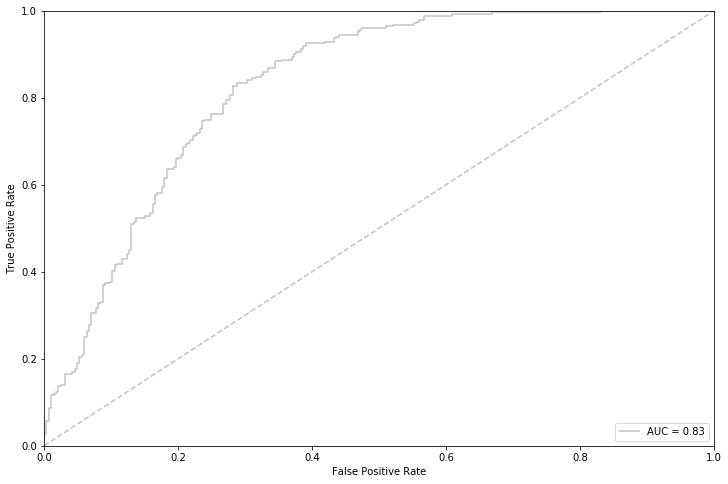

[0.02369922 0.23345933 0.35646919 0.03012601 0.07396808 0.03933491
 0.03548203 0.03741708 0.02726306 0.02093101 0.02540606 0.0687896
 0.02765444]


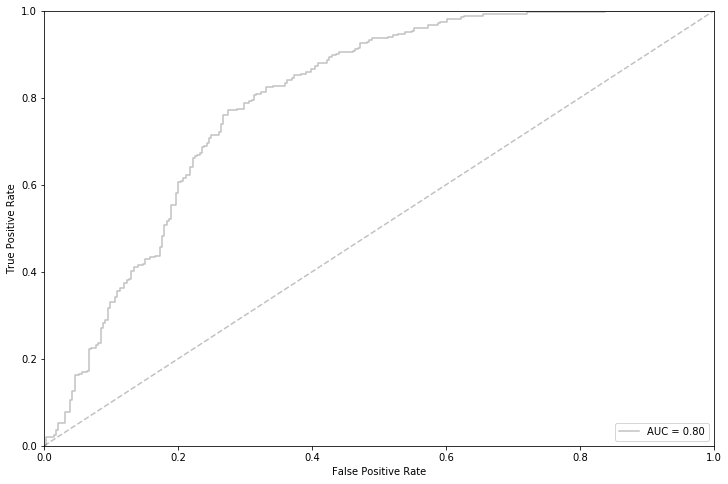

[0.03541967 0.21951717 0.33021981 0.0395543  0.05858303 0.03415075
 0.04489179 0.06348583 0.02696682 0.02515009 0.02638521 0.06384428
 0.03183125]


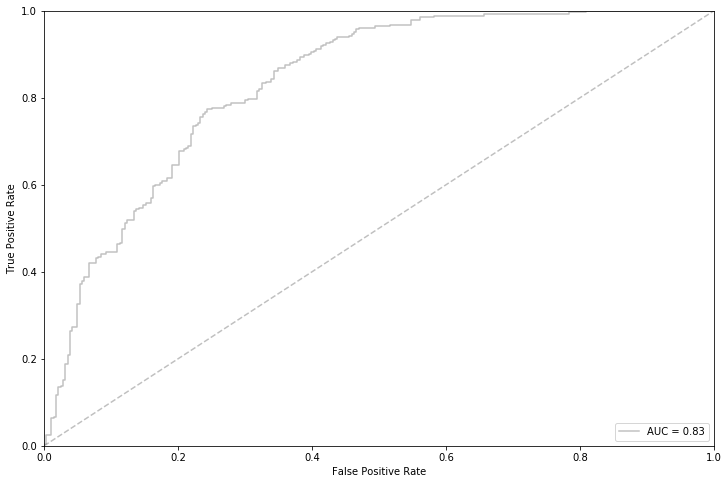

[0.03859806 0.21003456 0.31463315 0.06879174 0.06369013 0.04151352
 0.03022666 0.05207631 0.03129018 0.02607968 0.0233117  0.03296522
 0.06678909]


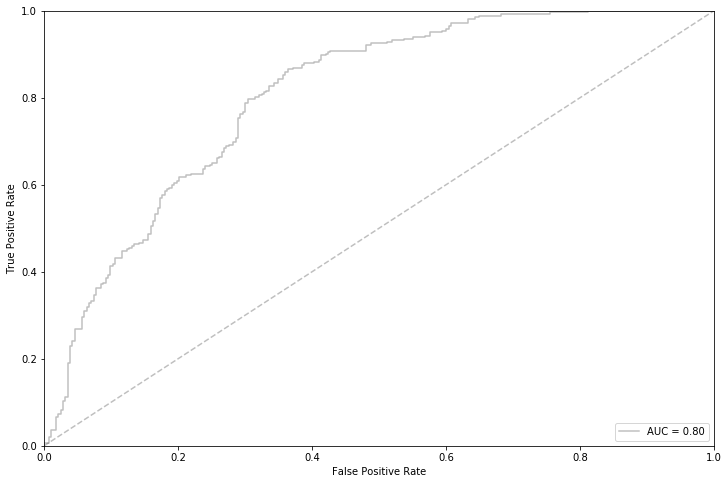

[0.02000536 0.20529373 0.35555826 0.03222129 0.0715949  0.03947444
 0.04210446 0.05007282 0.02380327 0.02186789 0.02333004 0.0741997
 0.04047385]


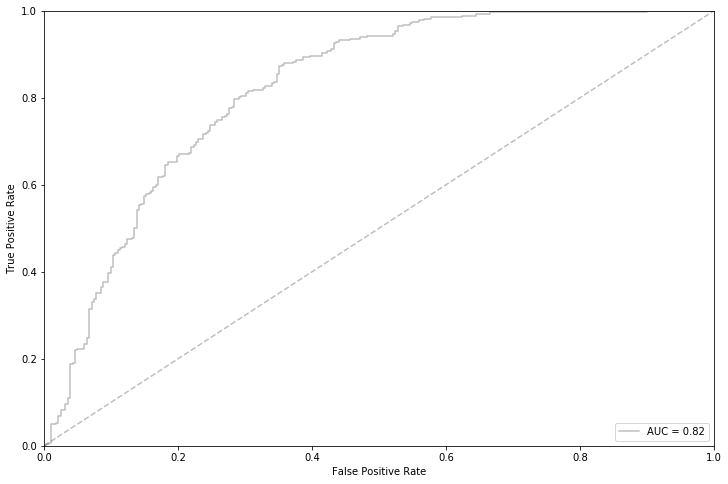

[0.03255873 0.21951347 0.30526963 0.07237947 0.09560275 0.0301875
 0.0265117  0.07830474 0.02050058 0.02021121 0.0190265  0.043486
 0.03644771]


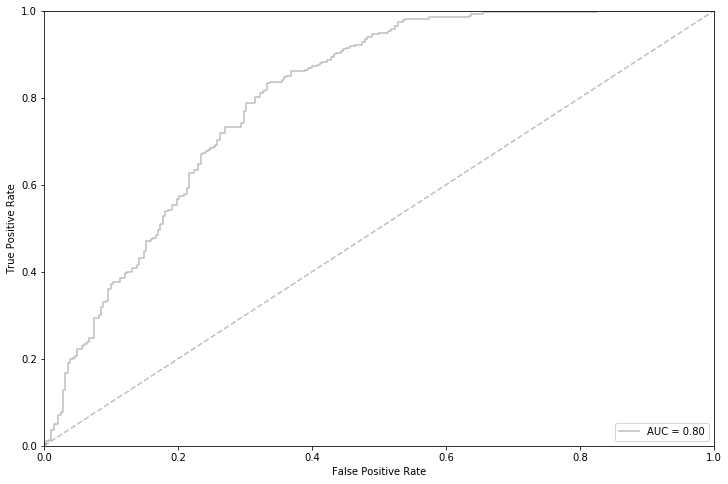

[0.02804568 0.24132232 0.32101289 0.06421467 0.05301815 0.04338692
 0.04837253 0.03592556 0.02564519 0.02009319 0.01976615 0.0551695
 0.04402725]


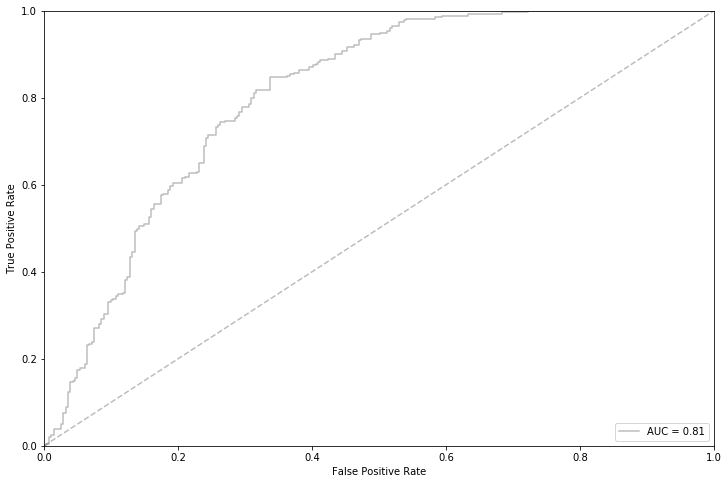

[0.02747203 0.21592015 0.34507588 0.0289512  0.07191965 0.03754113
 0.03816939 0.0391743  0.02819547 0.02129843 0.03280035 0.06724701
 0.04623502]


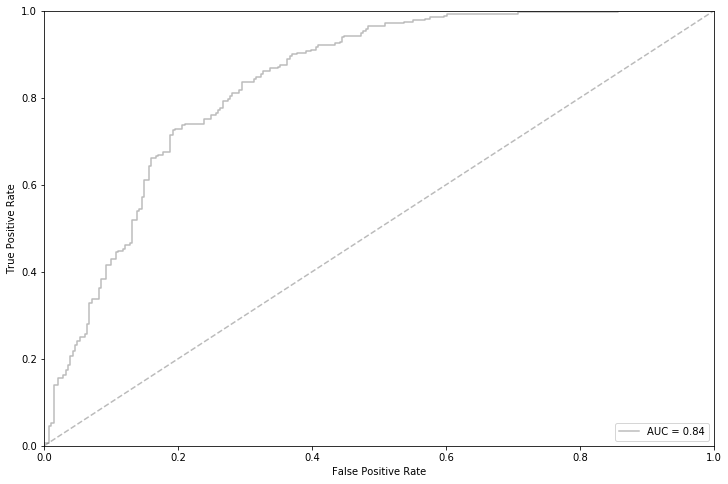

[0.01884185 0.18140008 0.37841472 0.08264568 0.06010032 0.03449302
 0.0337101  0.0425158  0.02555014 0.02025418 0.0161264  0.05802757
 0.04792014]


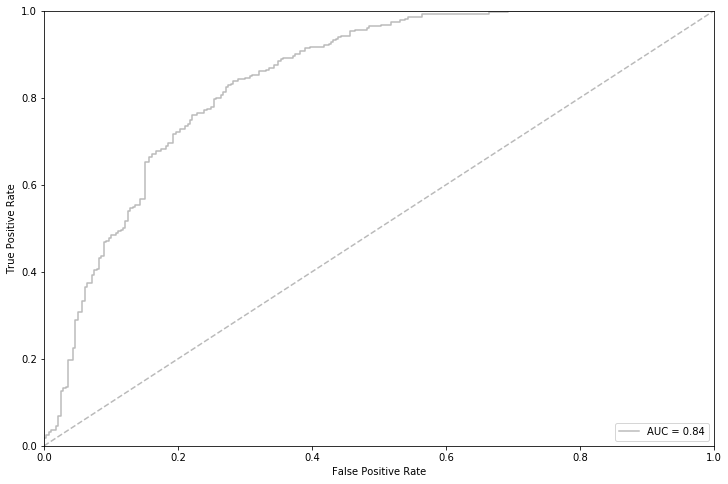

[0.02428171 0.17198494 0.36844505 0.05641778 0.09907664 0.04363317
 0.03705552 0.0357108  0.01978859 0.02671013 0.01455201 0.05175152
 0.05059214]


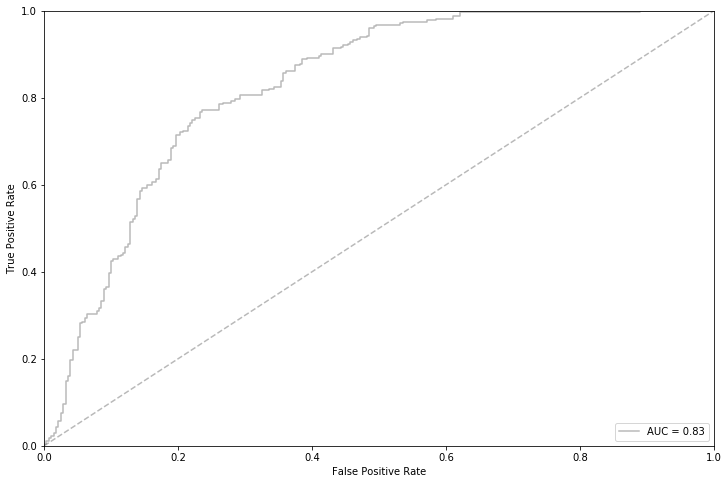

[0.06069819 0.23257863 0.27549559 0.07592986 0.08231896 0.04116502
 0.03015151 0.03779004 0.0373891  0.02940637 0.01852415 0.04592482
 0.03262776]


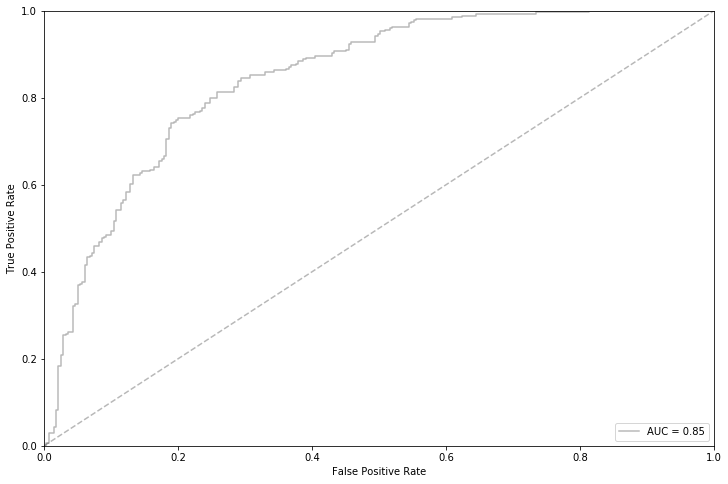

[0.03039698 0.22050626 0.27728486 0.05707184 0.07617787 0.05095004
 0.04141233 0.07731228 0.02934198 0.02025837 0.02171173 0.05949391
 0.03808154]


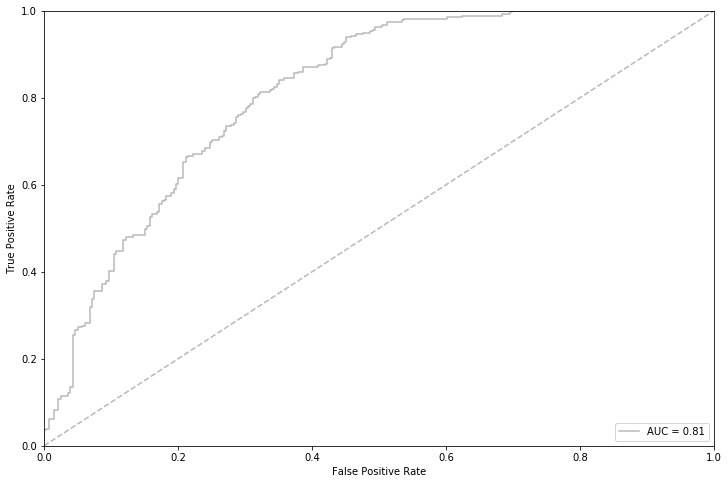

[0.03094547 0.2086114  0.33795829 0.04526347 0.06520645 0.04676165
 0.03312091 0.0730758  0.0283397  0.02195764 0.02360608 0.05435713
 0.03079601]


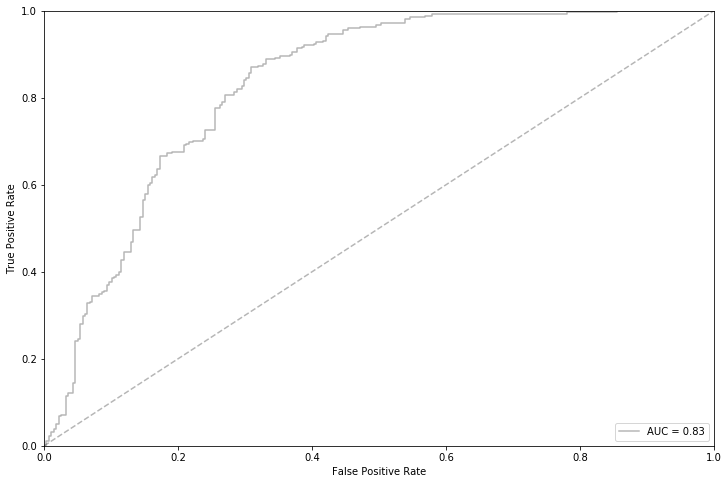

[0.0209384  0.19003502 0.29404036 0.04150084 0.11968074 0.05620453
 0.02691818 0.07151492 0.02305679 0.02438378 0.019537   0.06436531
 0.04782412]


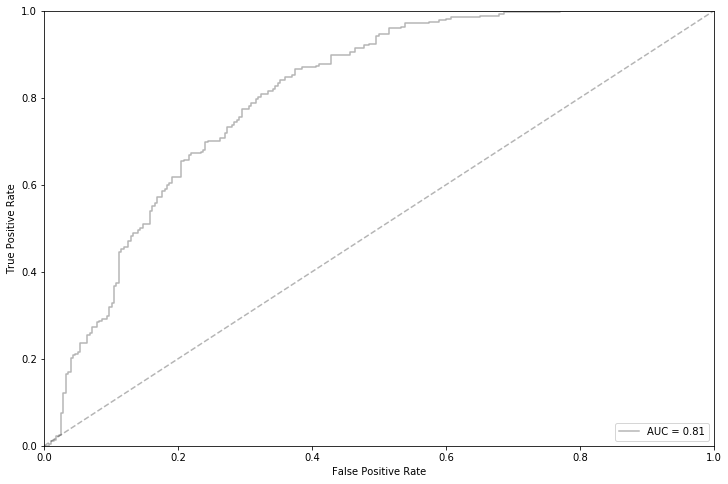

[0.01806613 0.22556985 0.30045587 0.07369793 0.06028899 0.04917019
 0.04474223 0.04950052 0.02399047 0.01877992 0.02703471 0.0450076
 0.06369558]


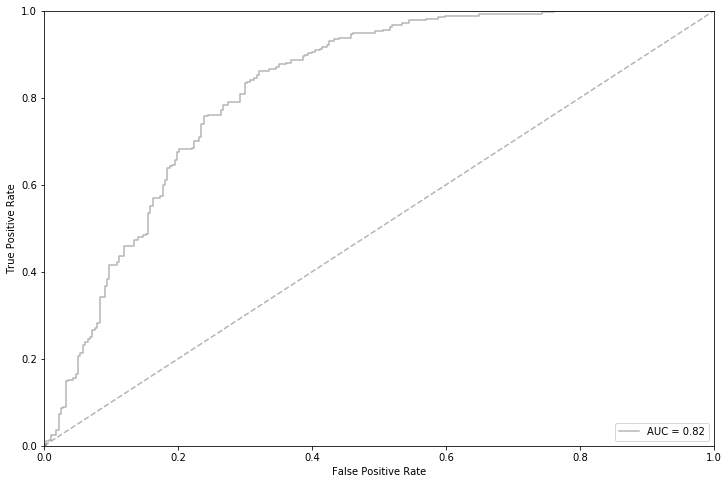

[0.03774335 0.25491116 0.29642653 0.03697946 0.08989025 0.03971466
 0.04159431 0.04275435 0.02628315 0.03581334 0.01870456 0.05736133
 0.02182353]


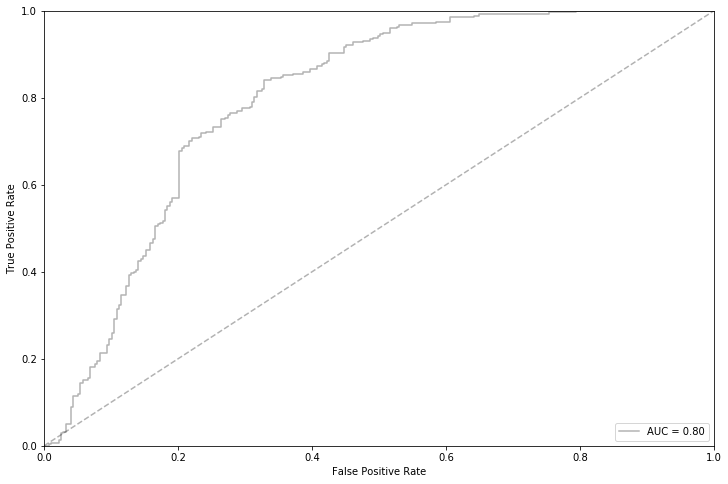

[0.02119751 0.20848759 0.32170196 0.07561795 0.0641356  0.044831
 0.02667257 0.05798087 0.02115426 0.02580484 0.02154399 0.06605912
 0.04481274]


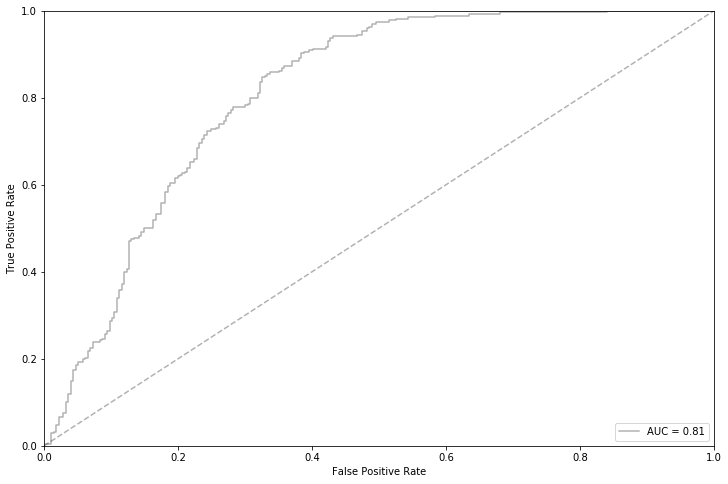

[0.03247102 0.22177271 0.33217992 0.0504596  0.07174978 0.04094539
 0.02561263 0.05006657 0.03657875 0.02093094 0.03244968 0.03165726
 0.05312576]


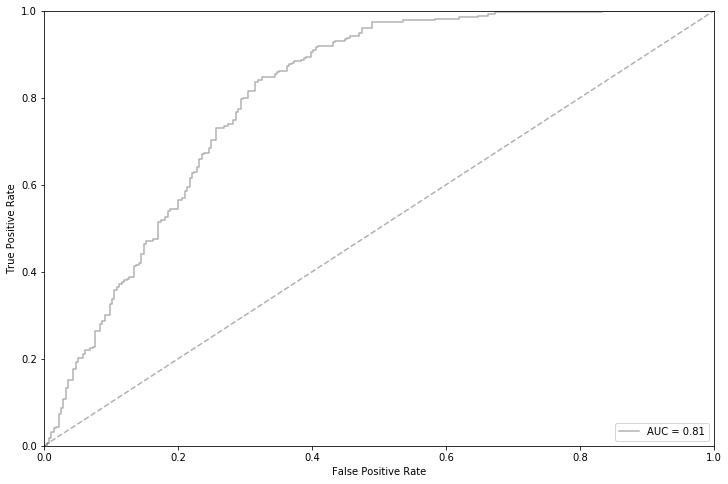

[0.03254101 0.25619592 0.3326625  0.05428641 0.0642788  0.03574479
 0.03340911 0.03877223 0.02597643 0.02685155 0.02167023 0.04149245
 0.03611856]


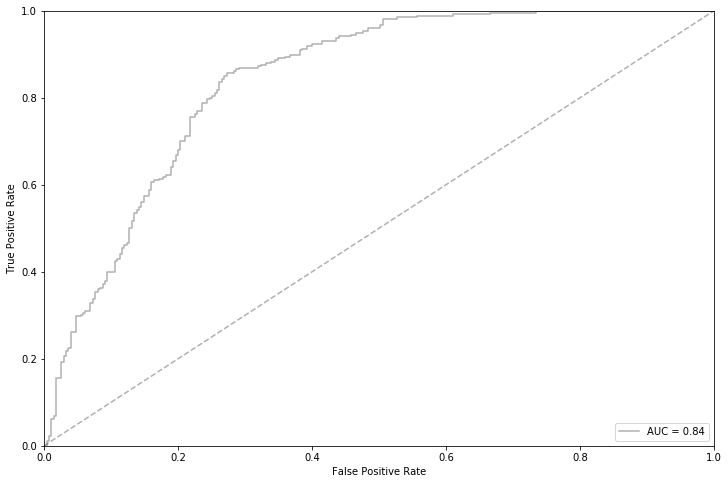

[0.02727147 0.1892684  0.33407384 0.07109588 0.08634274 0.06521087
 0.03167724 0.03188453 0.03025043 0.02515077 0.02251147 0.03466839
 0.05059398]


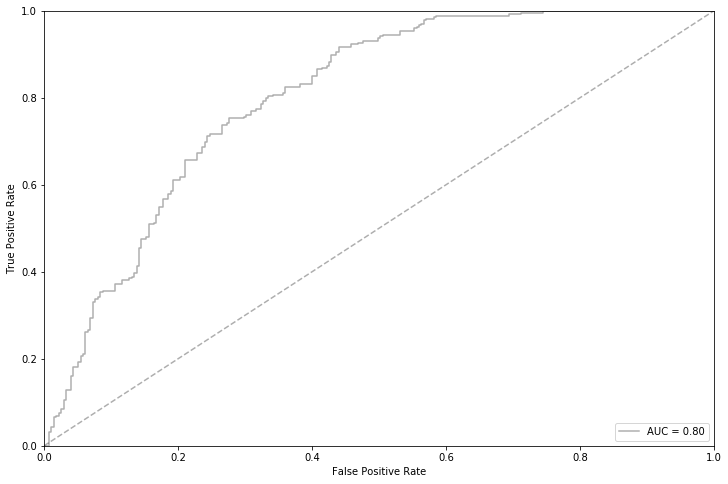

[0.02043446 0.19733322 0.37449979 0.05408487 0.05651405 0.02925614
 0.03169172 0.07856383 0.02558046 0.02310931 0.02239003 0.05797641
 0.0285657 ]


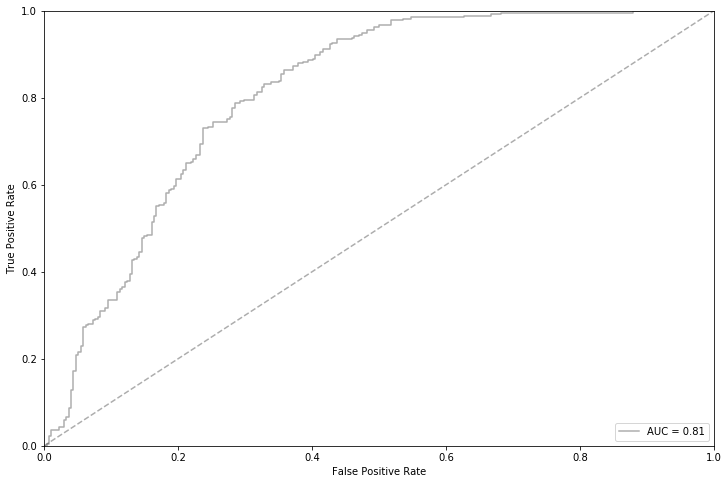

[0.02896876 0.22180189 0.29016625 0.07463189 0.05903439 0.0438111
 0.05640159 0.0303633  0.02557701 0.01972313 0.01499398 0.08596764
 0.04855907]


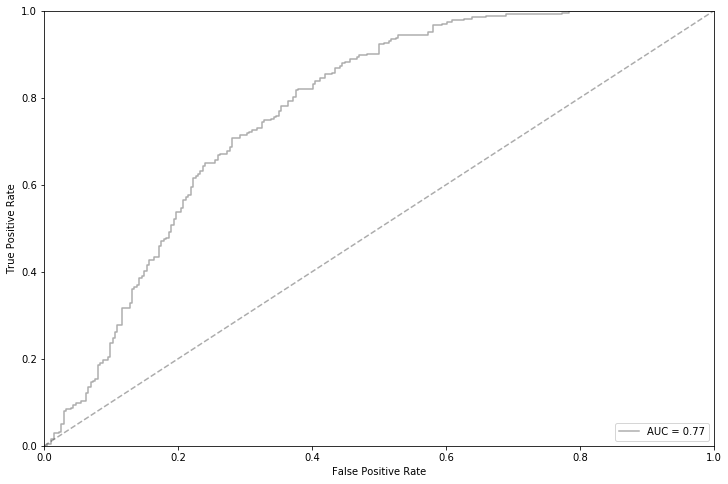

[0.02948425 0.18767818 0.30960725 0.06892279 0.1256851  0.05051624
 0.04946427 0.02943243 0.02222143 0.02556243 0.01535653 0.04371604
 0.04235306]


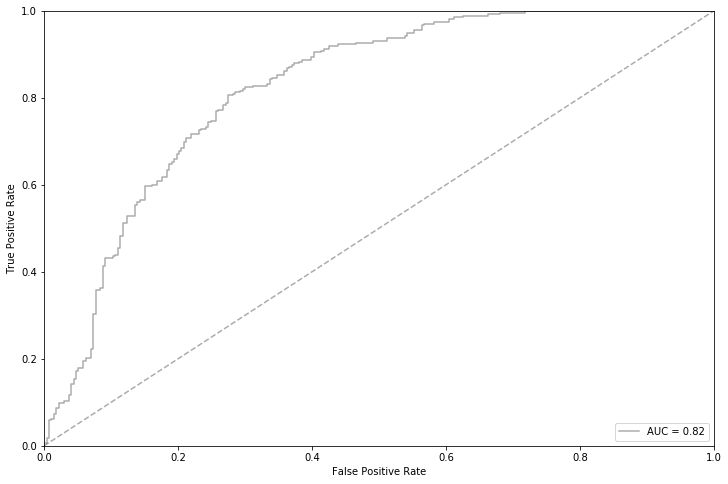

[0.02767172 0.22343019 0.3227572  0.03654206 0.08220445 0.0681469
 0.04861365 0.04297169 0.02075282 0.03040549 0.01445256 0.03525001
 0.04680126]


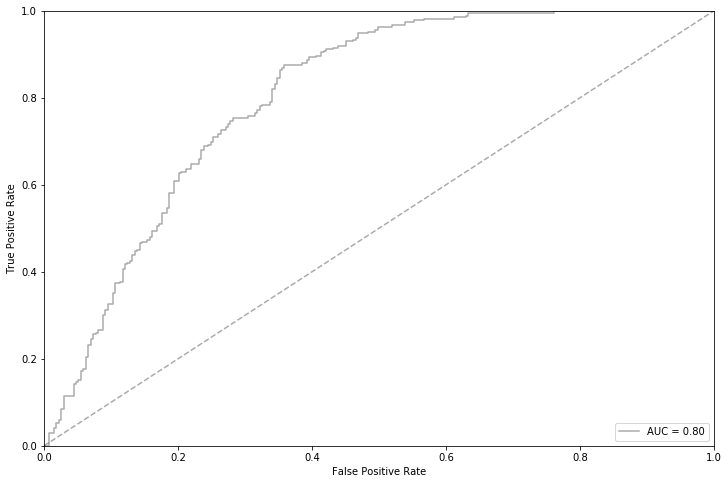

[0.03774251 0.19482006 0.35216038 0.05696692 0.07237878 0.03909549
 0.02878373 0.03149273 0.02122404 0.02247803 0.02265304 0.08348972
 0.03671457]


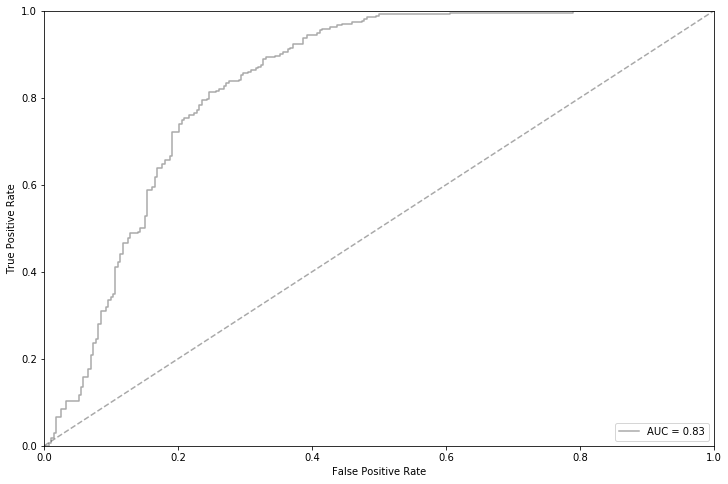

[0.01577859 0.22773286 0.30102448 0.08497005 0.09783846 0.03514071
 0.0329019  0.0482967  0.02872262 0.02111225 0.02081443 0.04921115
 0.0364558 ]


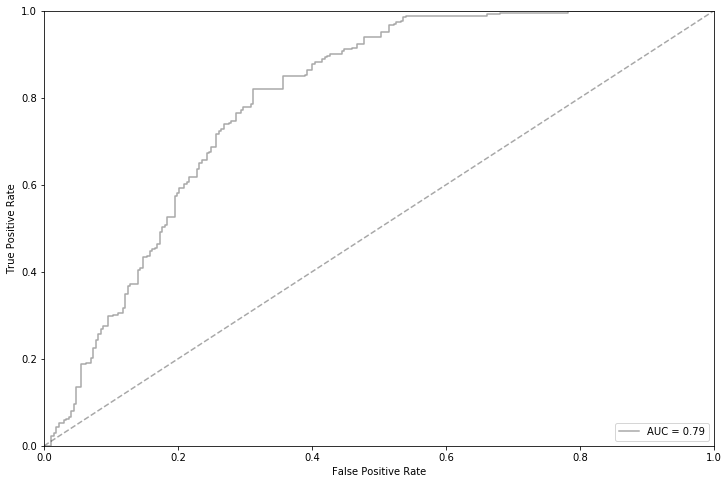

[0.03188186 0.2460658  0.29634629 0.05545138 0.07110686 0.05017289
 0.04161097 0.04573444 0.0234631  0.0212835  0.01922639 0.05307868
 0.04457784]


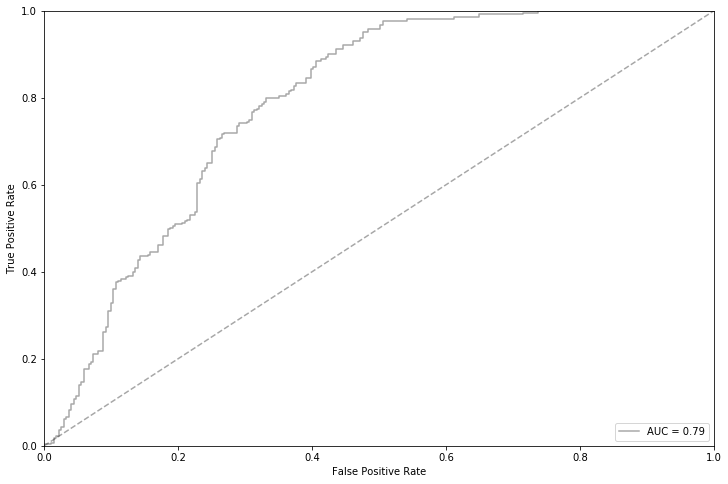

[0.02513968 0.1902748  0.34106017 0.06837716 0.07929435 0.03327185
 0.02968784 0.05853324 0.02733077 0.02381597 0.02531059 0.04762527
 0.05027833]


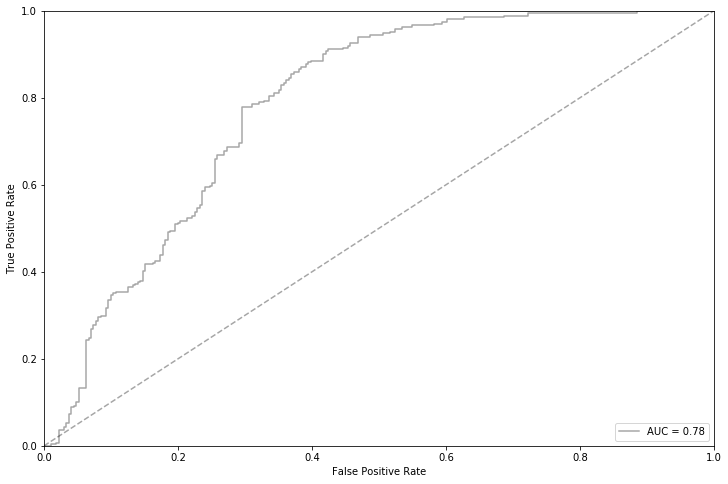

[0.01441571 0.22493095 0.35084267 0.06320375 0.04406607 0.0785425
 0.02276732 0.04409936 0.01809243 0.02126194 0.01684838 0.05399356
 0.04693536]


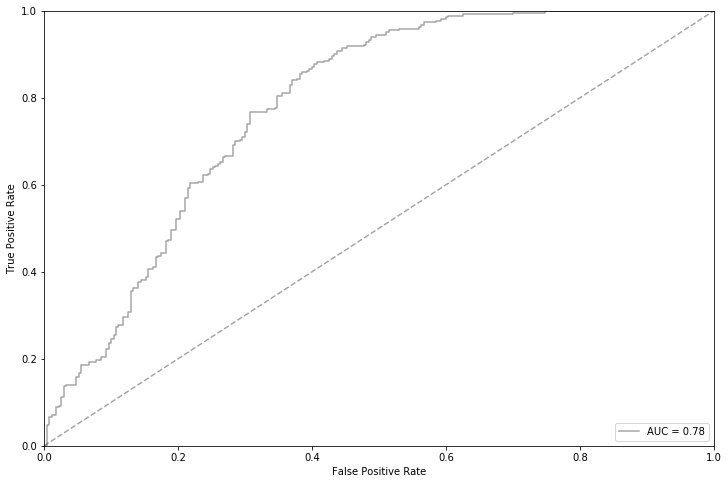

[0.04202124 0.25532012 0.31225281 0.02921531 0.05552805 0.03508176
 0.04447437 0.0345066  0.03666601 0.02514826 0.02051936 0.06820837
 0.04105774]


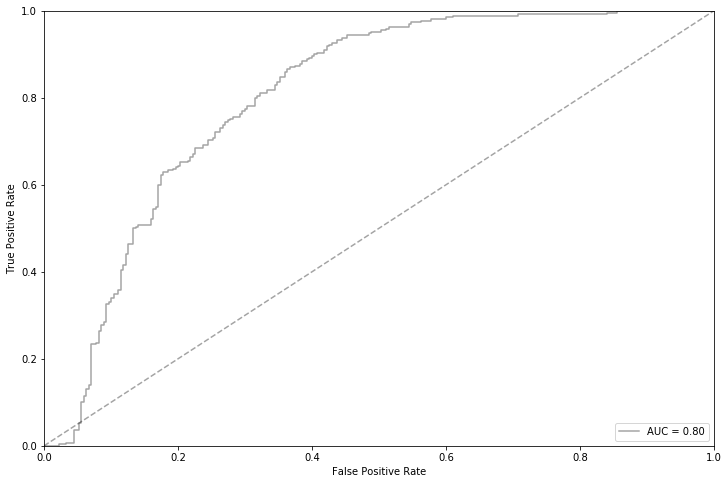

[0.04636893 0.20267281 0.32555254 0.06210318 0.07434055 0.02539789
 0.0290691  0.03954451 0.0342089  0.01665475 0.02489454 0.07052278
 0.04866952]


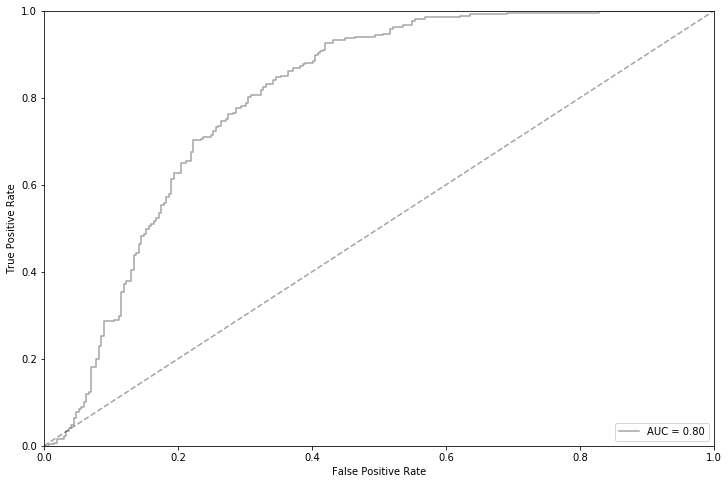

[0.03013989 0.2210903  0.32461341 0.03538264 0.0614475  0.049878
 0.03627126 0.07410997 0.0200146  0.01997274 0.02235948 0.04515715
 0.05956304]


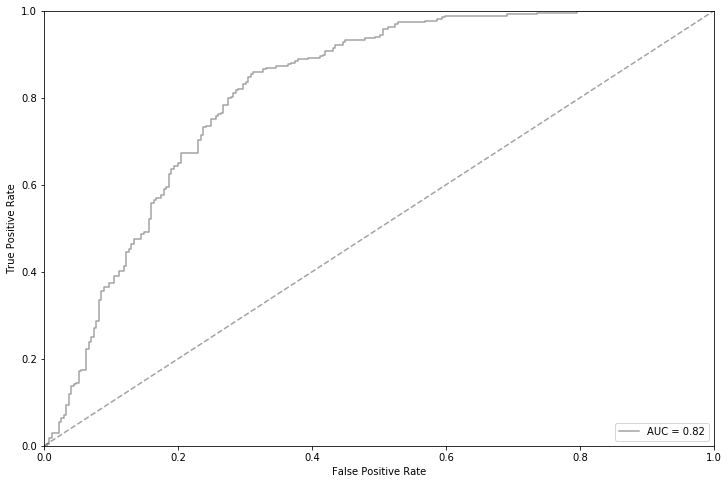

[0.01909162 0.25396038 0.27227707 0.03469674 0.10480155 0.03933318
 0.06822507 0.04765284 0.02619028 0.01901922 0.01510941 0.03907763
 0.060565  ]


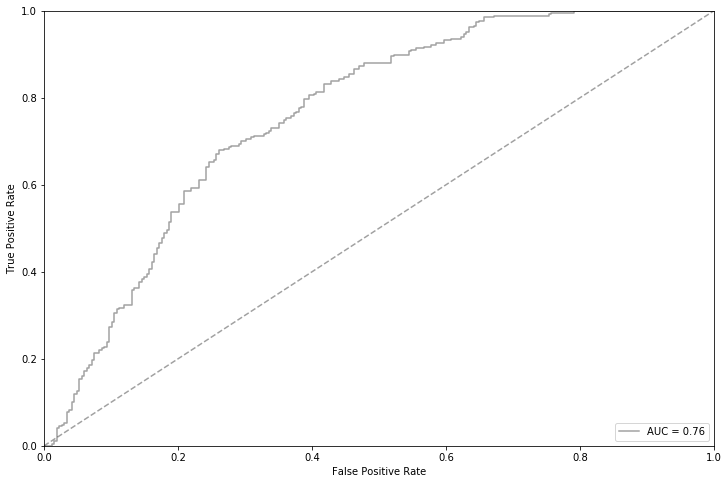

[0.02258933 0.22914753 0.33653877 0.0429701  0.09156793 0.04948163
 0.02360777 0.03979281 0.02894288 0.02237697 0.01534635 0.05709804
 0.0405399 ]


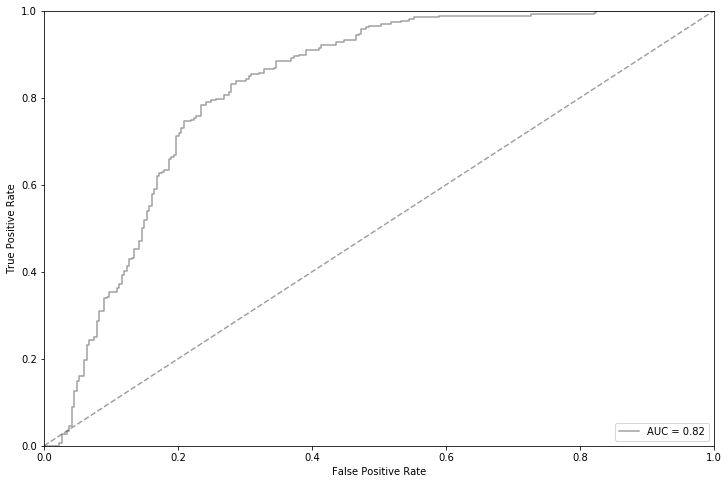

[0.02437045 0.23665864 0.34296298 0.02677014 0.10348549 0.03892533
 0.03226992 0.04536399 0.02786525 0.01941203 0.01232235 0.05884784
 0.03074559]


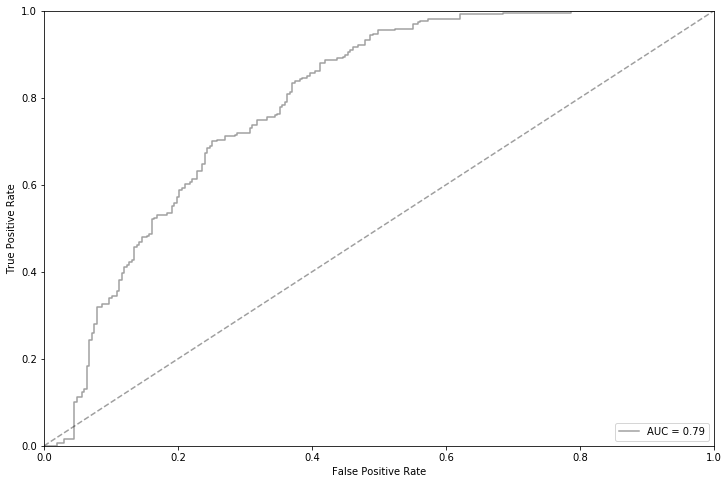

[0.03509471 0.27733087 0.30235863 0.03571595 0.05552249 0.03104867
 0.02627779 0.06583657 0.03694952 0.02213024 0.01604749 0.06791544
 0.02777162]


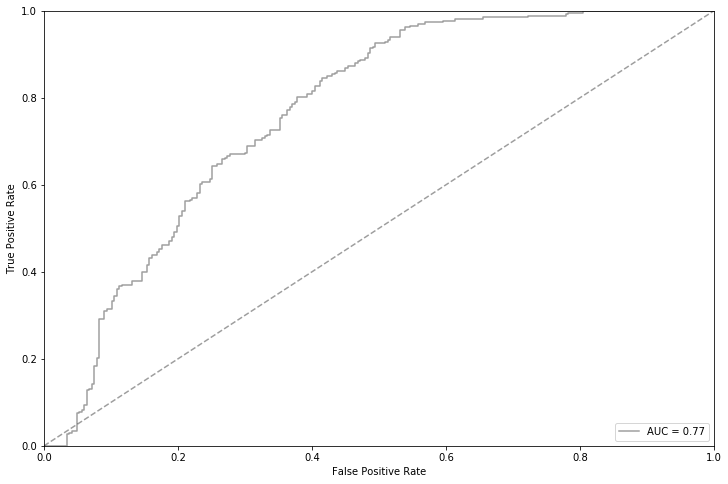

[0.02488606 0.25802476 0.35612936 0.01948731 0.07140797 0.03940422
 0.02739416 0.0356801  0.02140933 0.02157632 0.01970437 0.04727484
 0.05762119]


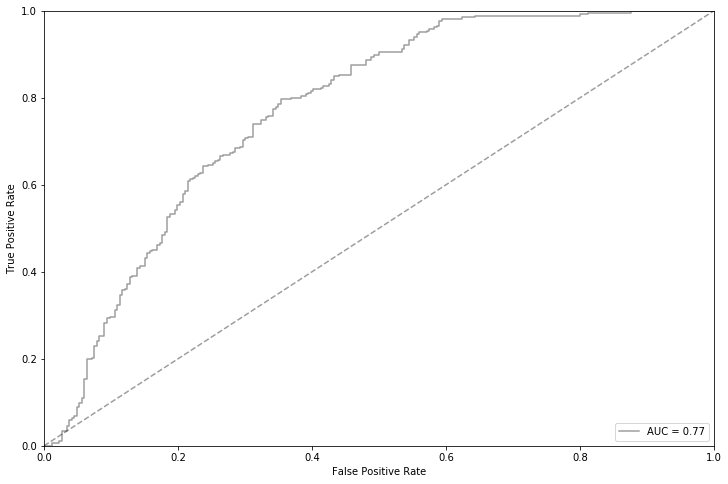

[0.05651144 0.19399242 0.30905997 0.07299698 0.0613737  0.03055754
 0.04393796 0.03383363 0.02428982 0.01899978 0.03324757 0.06838002
 0.05281917]


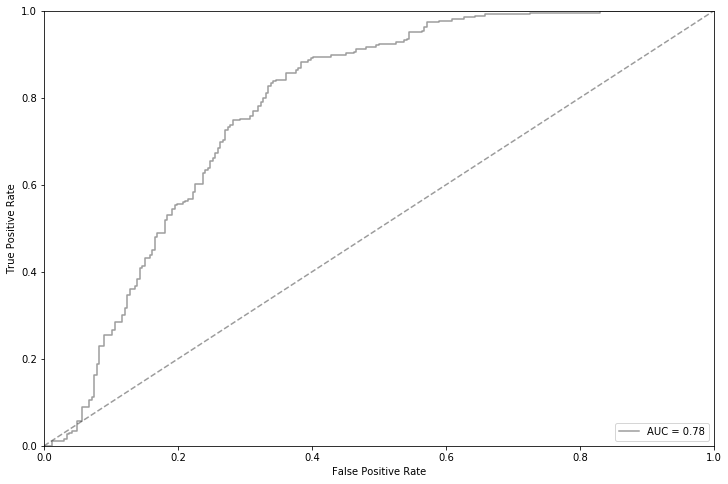

[0.02678125 0.23847821 0.36381134 0.03366801 0.06236921 0.03392918
 0.03392865 0.02826231 0.02297956 0.02263533 0.02375211 0.05530219
 0.05410265]


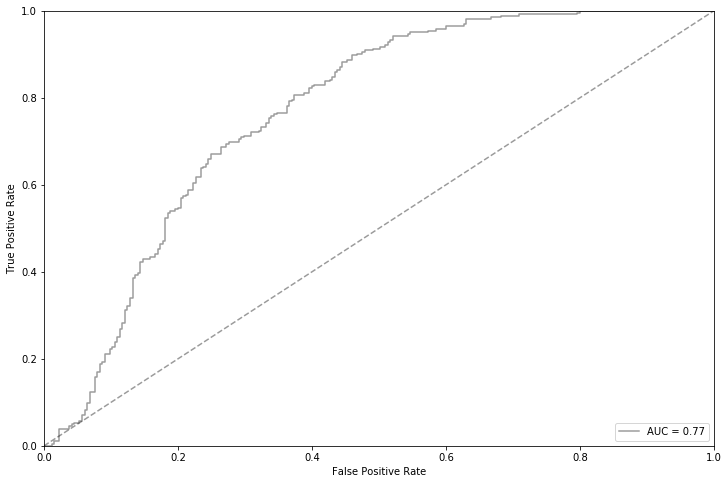

[0.0138447  0.20395425 0.29355364 0.04597545 0.07734028 0.03051848
 0.03964136 0.09082304 0.0200412  0.02357338 0.02916942 0.07991013
 0.05165468]


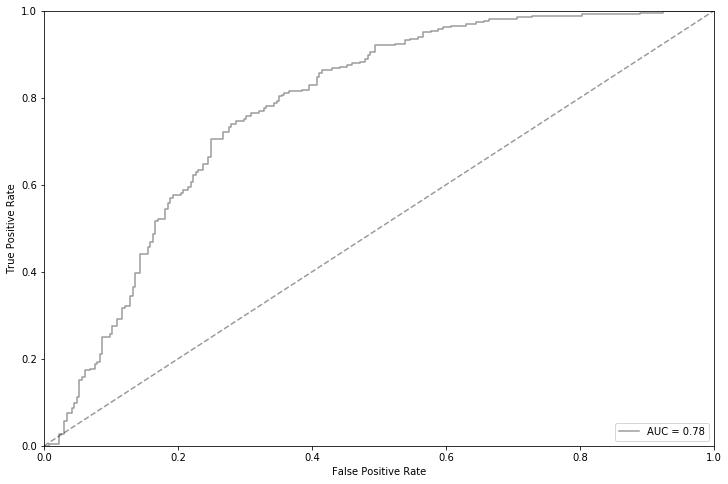

[0.02703841 0.23377608 0.34762019 0.063282   0.03744791 0.03949531
 0.04720847 0.04348414 0.0317802  0.01787909 0.02086509 0.04766912
 0.042454  ]


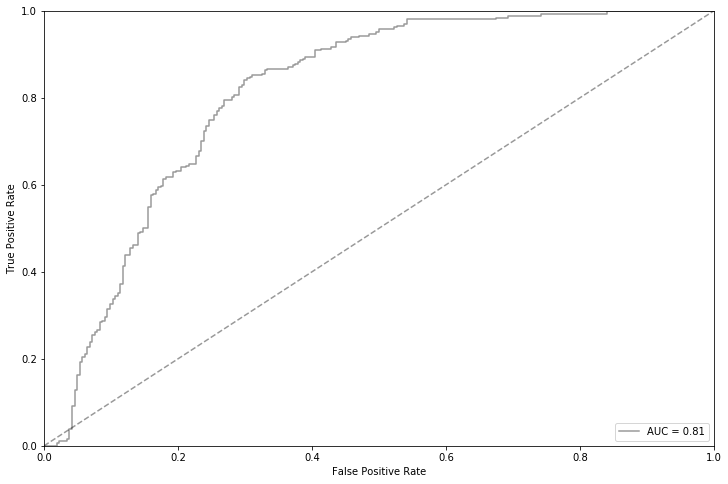

[0.02054783 0.21898948 0.31089964 0.04872925 0.06587641 0.03363601
 0.04735548 0.03493396 0.0289888  0.0249515  0.05505941 0.06990113
 0.04013109]


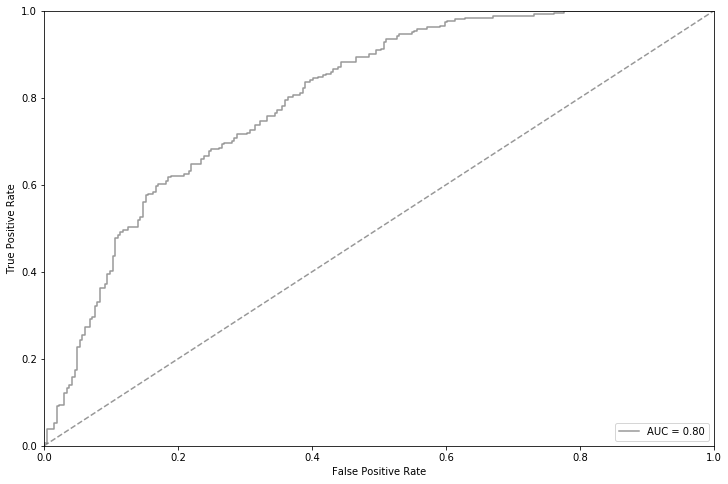

[0.05129967 0.21171643 0.25468646 0.05089059 0.09991458 0.02965719
 0.0318031  0.04154597 0.02624489 0.02279808 0.02089985 0.09910823
 0.05943496]


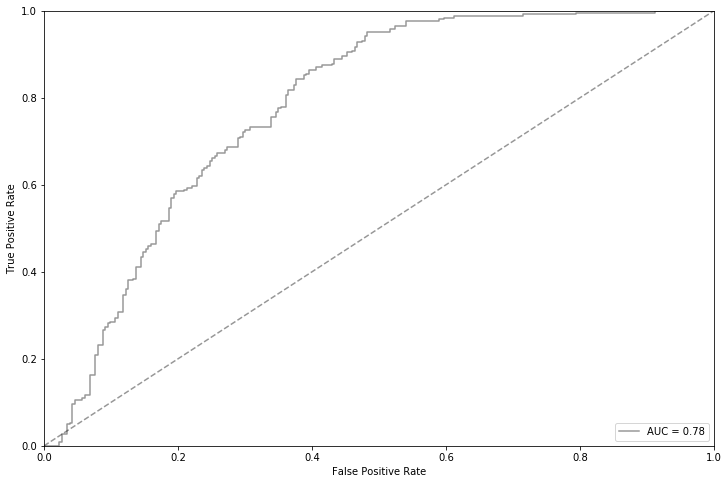

[0.02601444 0.201665   0.28730211 0.04577248 0.12885546 0.04913931
 0.03022424 0.04294326 0.03052367 0.03923136 0.02768718 0.0610788
 0.0295627 ]


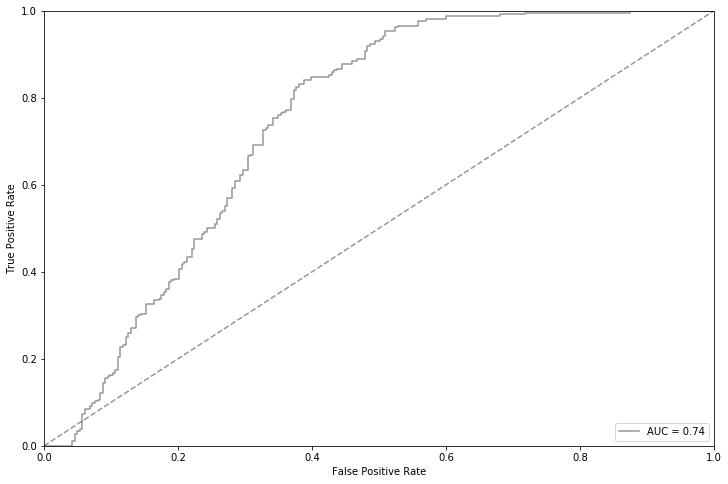

[0.02500332 0.25466975 0.3180185  0.06240743 0.074107   0.04532837
 0.03169331 0.04072232 0.02863786 0.01895846 0.02453878 0.03622234
 0.03969256]


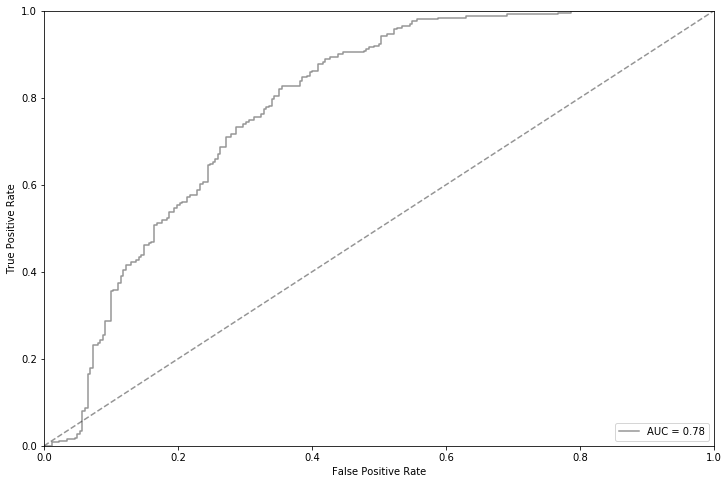

[0.01969193 0.20738636 0.33506176 0.05717497 0.09184784 0.03099826
 0.03952792 0.03927847 0.03498559 0.02625204 0.01800508 0.07653151
 0.02325828]


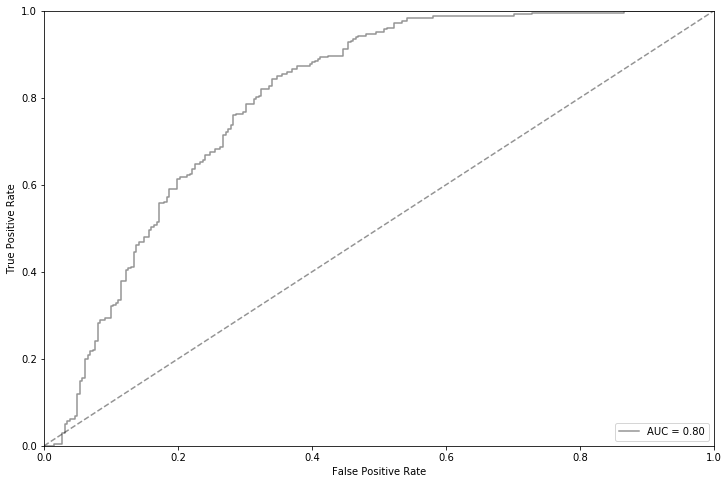

[0.01583001 0.24747177 0.31080181 0.05266826 0.09995332 0.03074996
 0.03931986 0.03991398 0.02540338 0.02465823 0.01447109 0.06132426
 0.03743405]


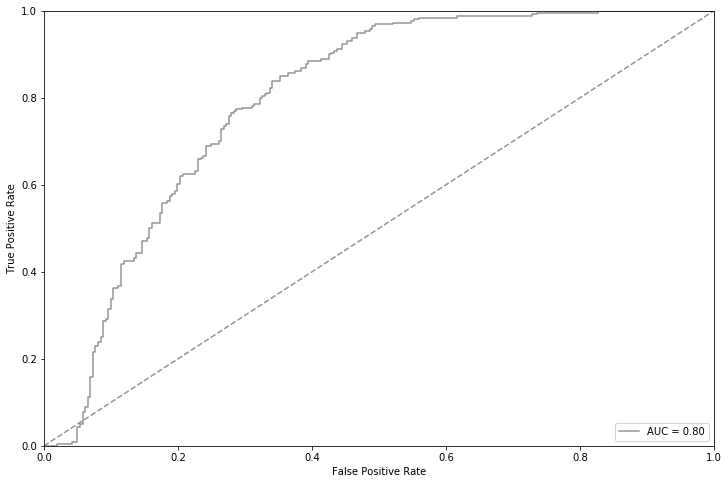

[0.04761081 0.26081614 0.26528479 0.03995439 0.07492181 0.06564606
 0.03486195 0.03210446 0.02742566 0.02616522 0.01641141 0.06588878
 0.04290853]


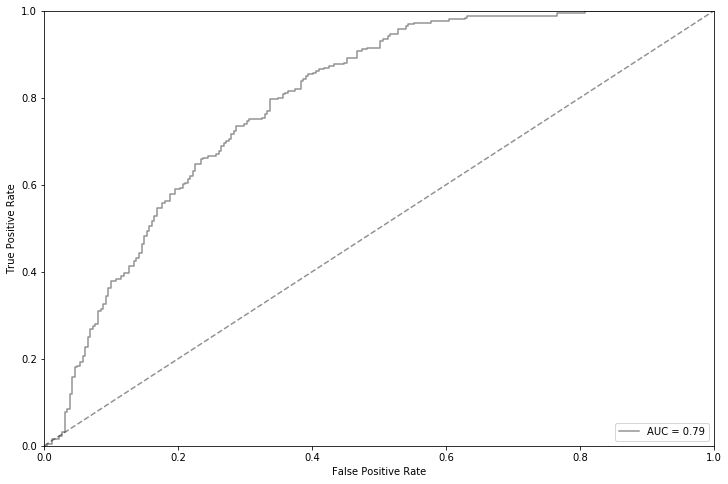

[0.01861069 0.23630926 0.27389906 0.06197606 0.06540058 0.05031384
 0.06353806 0.04594992 0.02840715 0.02455078 0.01696594 0.07980055
 0.0342781 ]


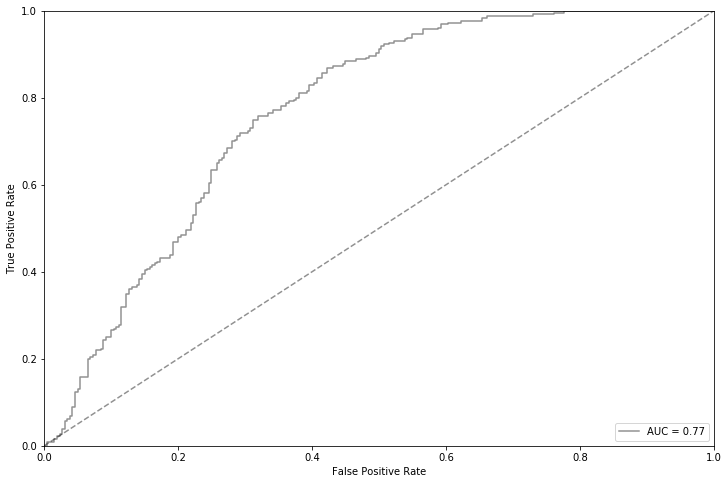

[0.03750694 0.18897536 0.28819025 0.04510798 0.11007867 0.04911806
 0.05417725 0.04596005 0.02577116 0.02129897 0.0343425  0.05015181
 0.049321  ]


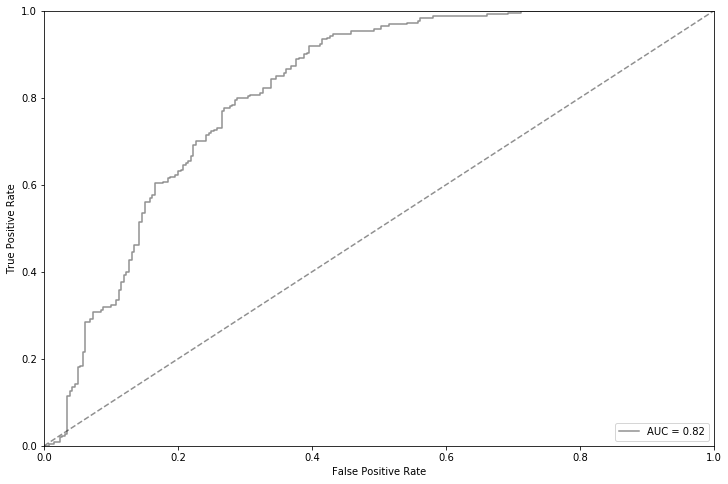

[0.02655509 0.21375609 0.35340262 0.0501017  0.0567972  0.03494125
 0.03336624 0.05198624 0.02238853 0.02571476 0.02655538 0.07048037
 0.03395452]


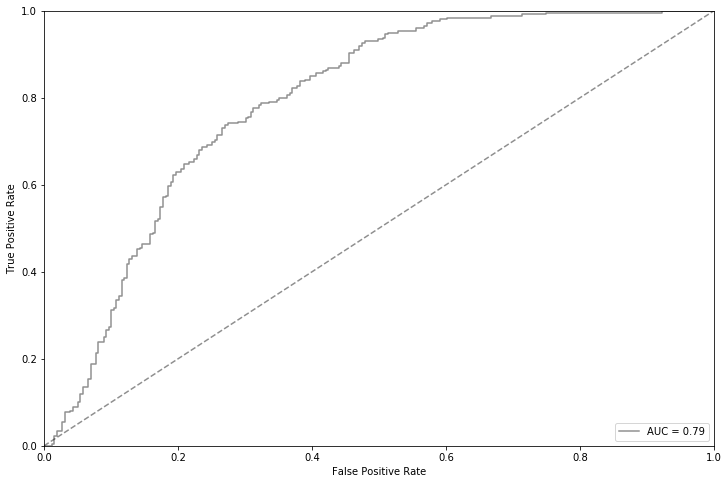

[0.04678066 0.22253398 0.25366343 0.04250597 0.07621515 0.0429767
 0.05456234 0.05103681 0.02572785 0.02251072 0.01944831 0.08263051
 0.05940758]


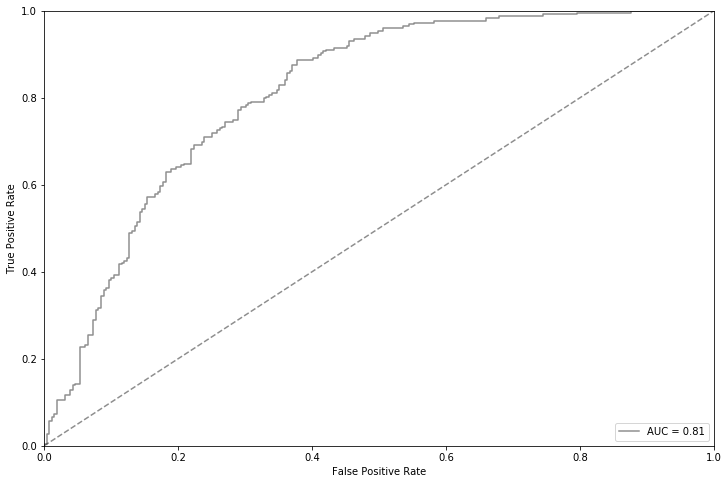

[0.03080199 0.24662767 0.27268894 0.04212087 0.0942525  0.04118991
 0.03489405 0.05581173 0.02958643 0.02218892 0.03044966 0.04244049
 0.05694682]


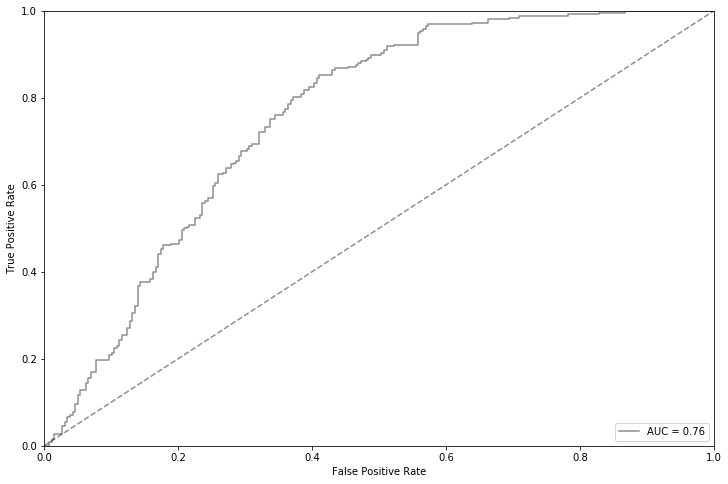

[0.01867249 0.2112715  0.33387077 0.06842077 0.06584884 0.04230617
 0.04450302 0.04173632 0.02314945 0.02390934 0.01503509 0.0522881
 0.05898812]


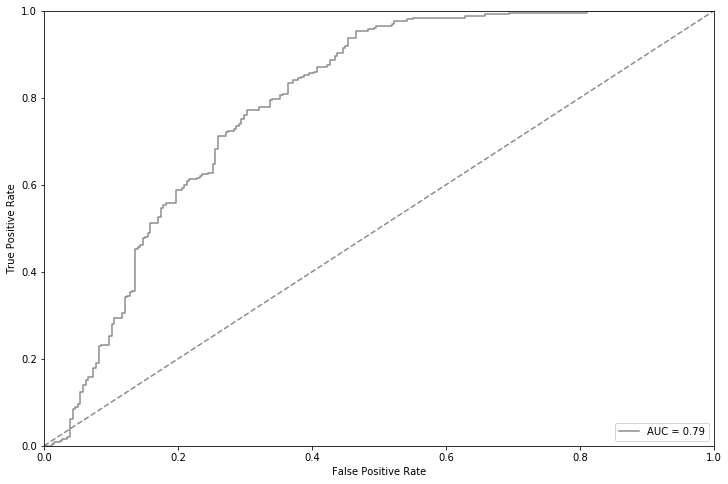

[0.03364404 0.22631181 0.32173897 0.08748743 0.07211323 0.02834572
 0.03362309 0.04283962 0.02922129 0.01606633 0.01798833 0.05667156
 0.03394857]


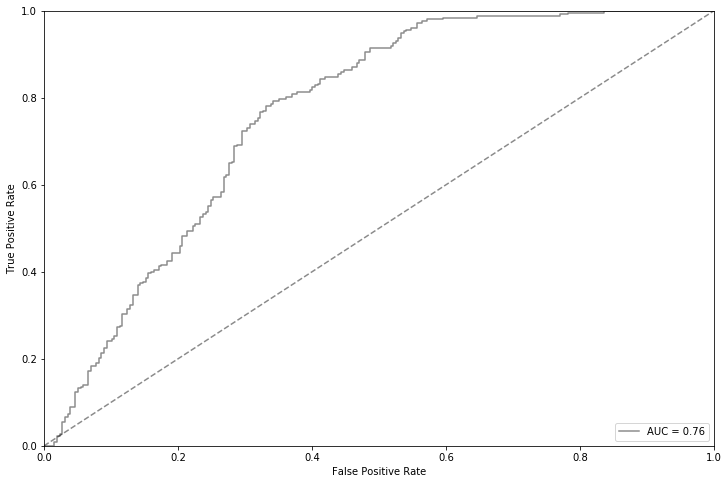

[0.02132676 0.25191143 0.28583578 0.05384508 0.06751415 0.0507735
 0.03463993 0.04204332 0.02426025 0.02739794 0.03946628 0.07027631
 0.03070926]


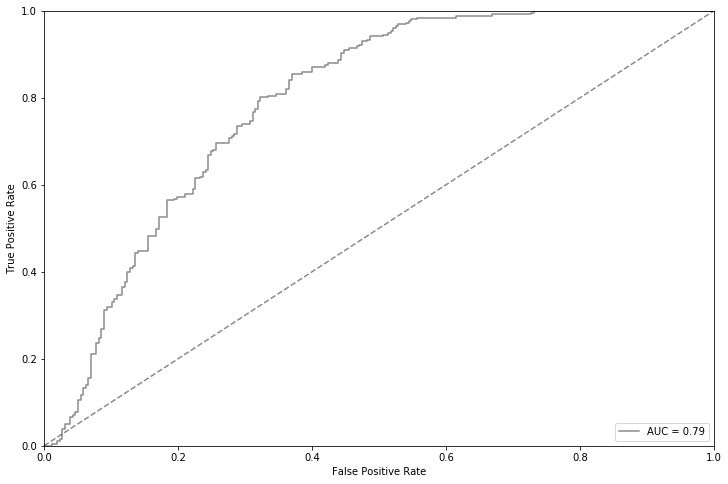

[0.02189813 0.22685404 0.3186039  0.06261047 0.07976634 0.04913589
 0.03088609 0.04733477 0.02326084 0.02448611 0.01774112 0.05954037
 0.03788194]


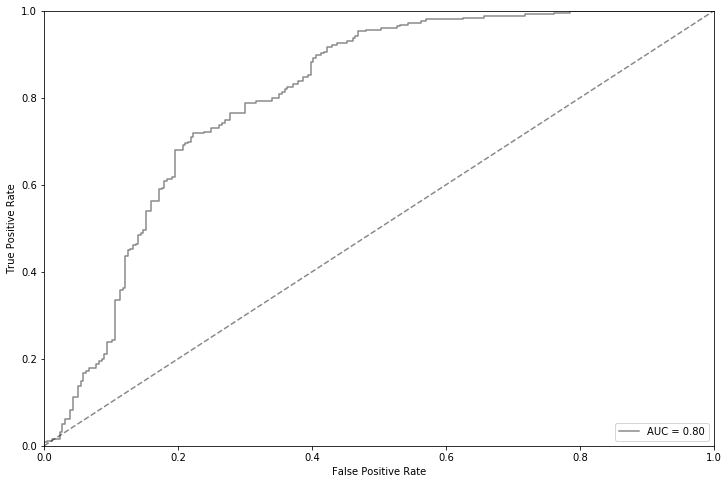

[0.01699668 0.19987165 0.27882799 0.07462091 0.06668263 0.07530733
 0.05880925 0.0465808  0.02431614 0.02197242 0.03278778 0.06443303
 0.03879339]


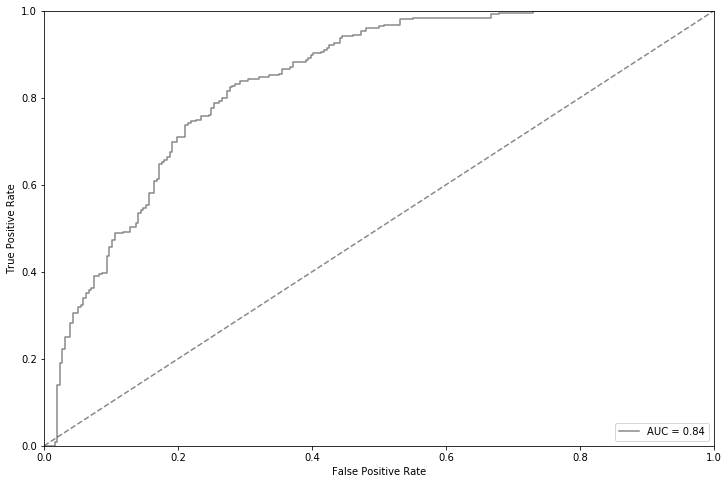

[0.02129138 0.21601655 0.31462682 0.04192628 0.10241073 0.04220298
 0.04744326 0.04550407 0.02410651 0.02757155 0.02266142 0.0451085
 0.04912994]


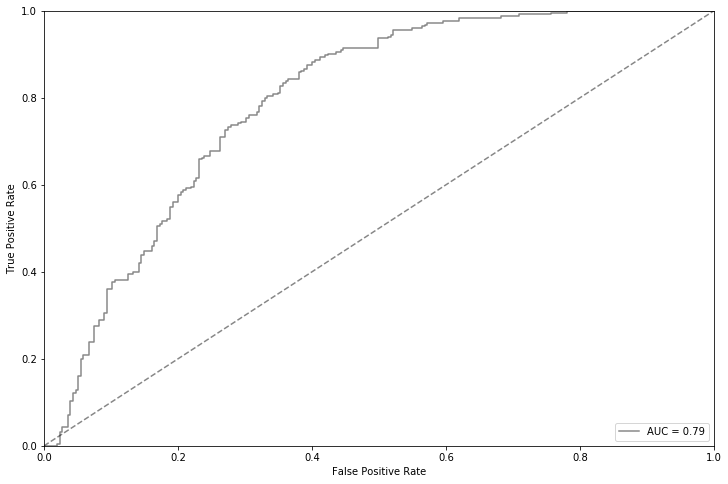

[0.03909292 0.29084815 0.26402676 0.06250321 0.05301409 0.04866427
 0.03974568 0.05673375 0.02670722 0.02227855 0.01708293 0.04075914
 0.03854332]


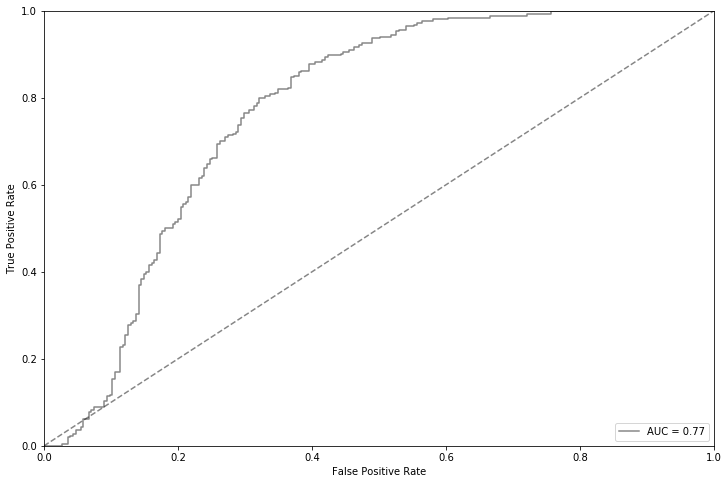

[0.0367074  0.23425204 0.31544486 0.08402932 0.03667961 0.03623721
 0.03592596 0.04526546 0.02521799 0.02342992 0.01508504 0.04346428
 0.06826091]


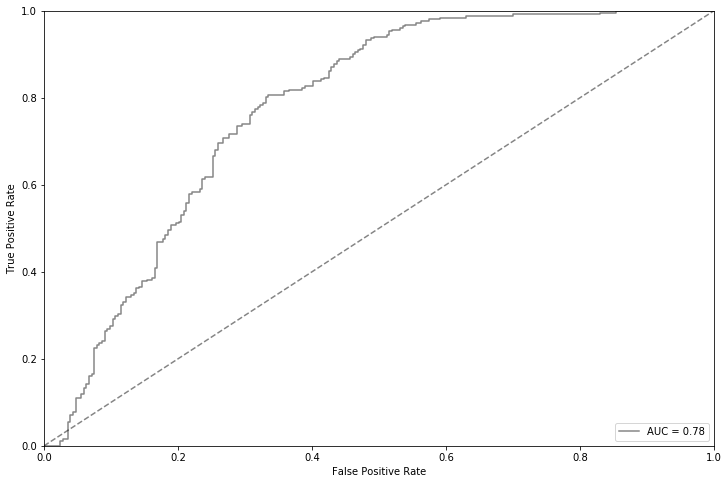

[0.02664624 0.22320961 0.29670761 0.06161036 0.11038909 0.05132886
 0.03635179 0.03970991 0.02867017 0.02216194 0.02579239 0.04296211
 0.03445992]


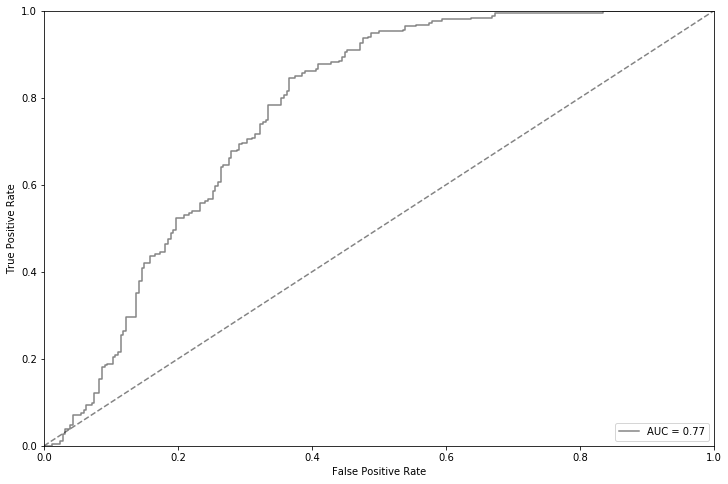

[0.02947321 0.28875605 0.28122588 0.04894082 0.06643394 0.05419992
 0.03015474 0.03236872 0.02784692 0.01939147 0.03120188 0.03834764
 0.05165881]


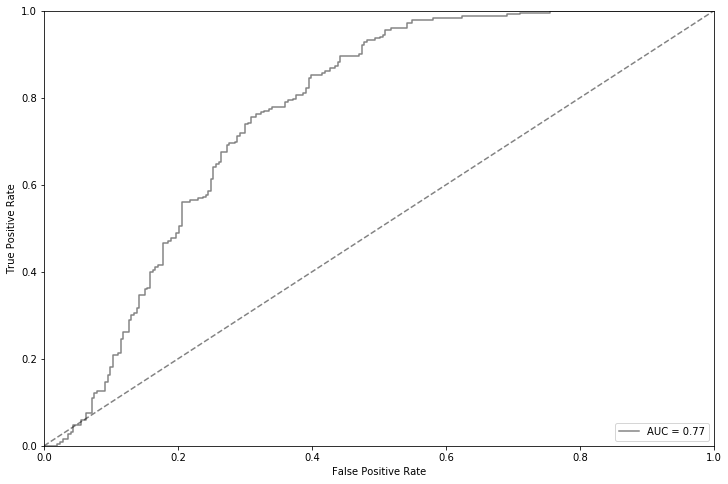

[0.01432206 0.20267851 0.33934825 0.0620068  0.06875441 0.05787071
 0.03212006 0.0319629  0.02252061 0.01840057 0.02475835 0.06062467
 0.0646321 ]


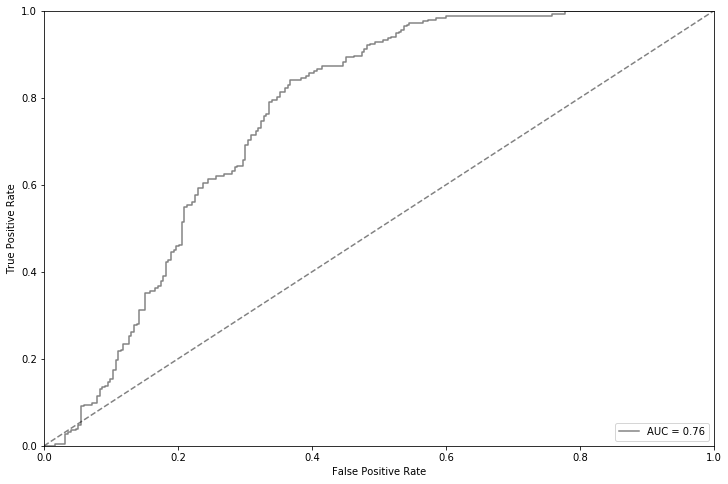

[0.02471723 0.21772012 0.31249121 0.10261004 0.05664688 0.04763282
 0.02613333 0.04886238 0.02654039 0.02582996 0.01650742 0.05388436
 0.04042386]


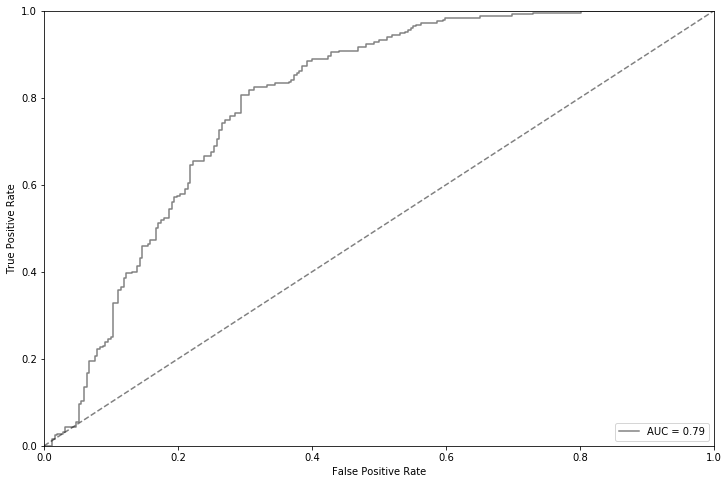

[0.02892073 0.24290941 0.28728407 0.04873072 0.07861632 0.05097044
 0.03495856 0.04313524 0.02704243 0.02763801 0.02300893 0.06058742
 0.04619771]


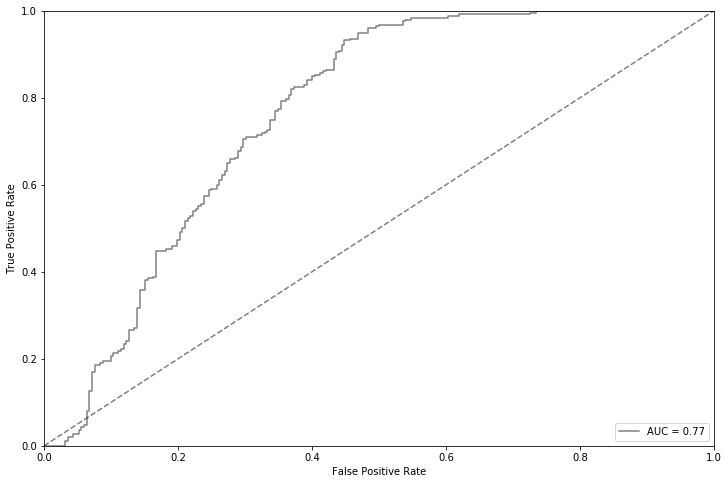

[0.02733785 0.2107093  0.34159911 0.05661259 0.0653562  0.0371155
 0.03604348 0.06161476 0.02070889 0.0194203  0.01591992 0.05617326
 0.05138883]


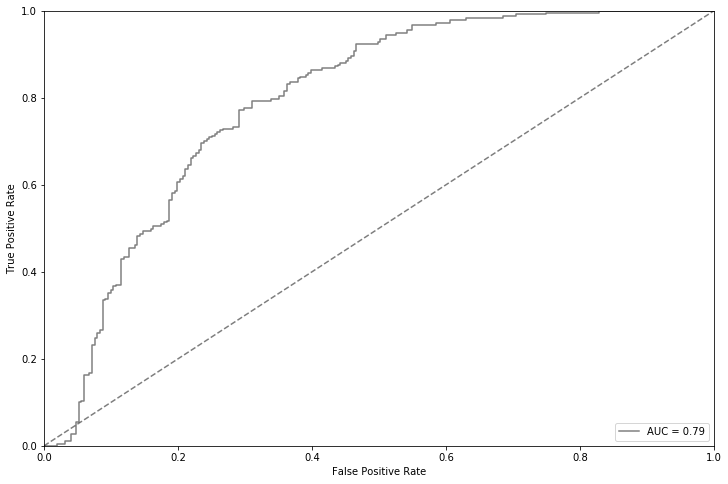

[0.03353384 0.2384088  0.32485808 0.04646015 0.07176461 0.04817142
 0.04283622 0.05811405 0.02541104 0.02590593 0.01444357 0.02982469
 0.04026757]


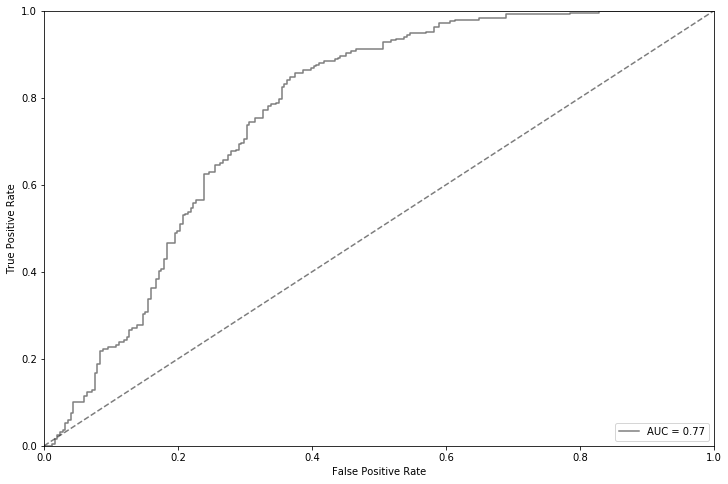

[0.03560879 0.24048857 0.29234624 0.05581396 0.09369363 0.03661192
 0.02519736 0.0540172  0.02475301 0.02485345 0.02457677 0.04503686
 0.04700223]


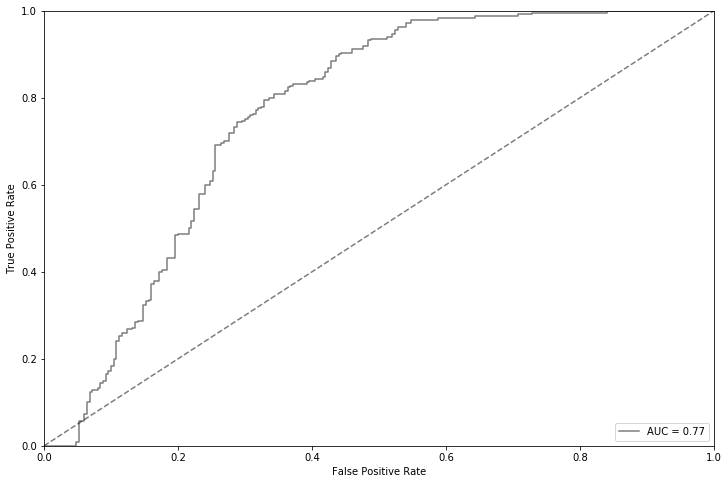

[0.01808935 0.2477284  0.2875791  0.08289656 0.07932159 0.02964925
 0.03813696 0.04793133 0.02342843 0.02256476 0.01937369 0.05680448
 0.04649611]


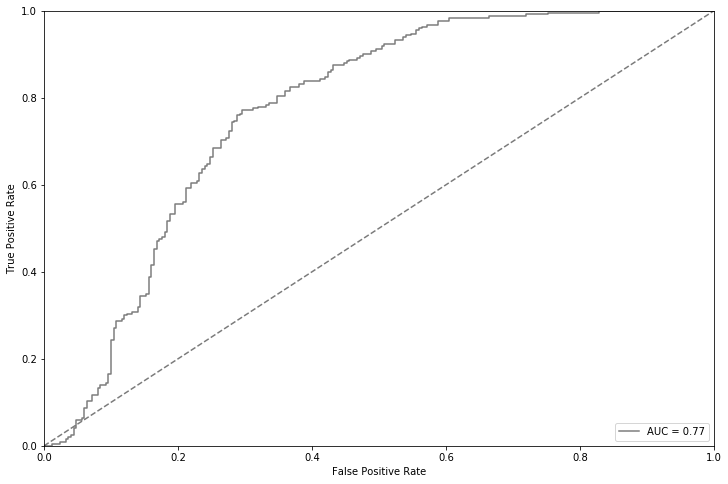

[0.0226893  0.2498443  0.25805113 0.05772838 0.07547884 0.04411798
 0.03167157 0.05509983 0.03011548 0.02327008 0.03596959 0.05538023
 0.06058329]


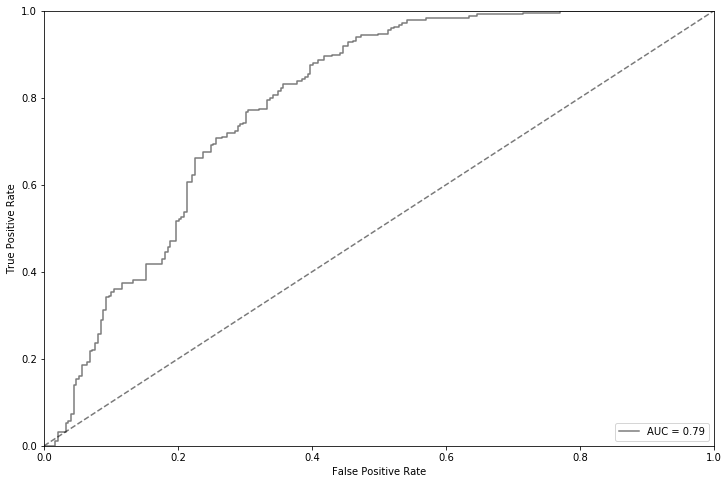

[0.0248817  0.2227048  0.36570244 0.0558775  0.05453822 0.03759529
 0.04121042 0.0241791  0.03177295 0.02204525 0.02591348 0.05745845
 0.0361204 ]


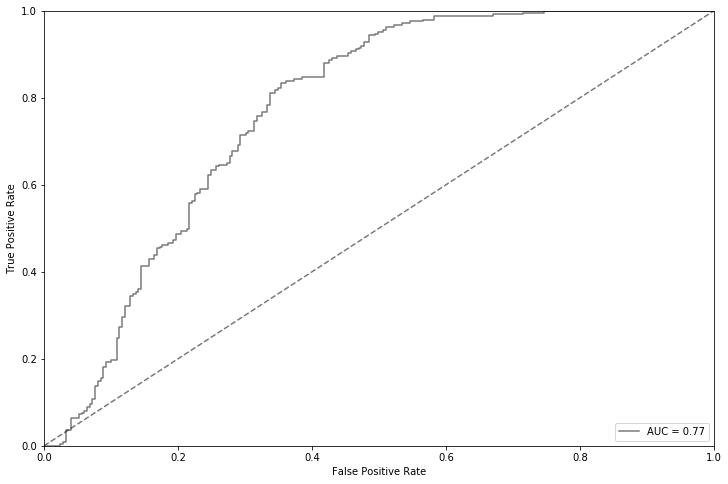

[0.02355114 0.21246452 0.33079416 0.04401598 0.08248018 0.03300547
 0.03808205 0.0505891  0.02952745 0.03739462 0.03013332 0.05370028
 0.03426173]


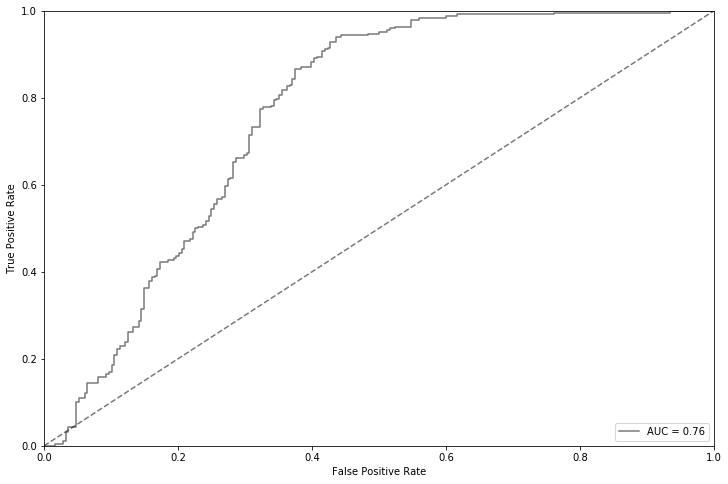

[0.03077674 0.25474469 0.30055092 0.02289221 0.06021255 0.04180089
 0.02862714 0.06815294 0.03836057 0.02560451 0.03548844 0.05002786
 0.04276054]


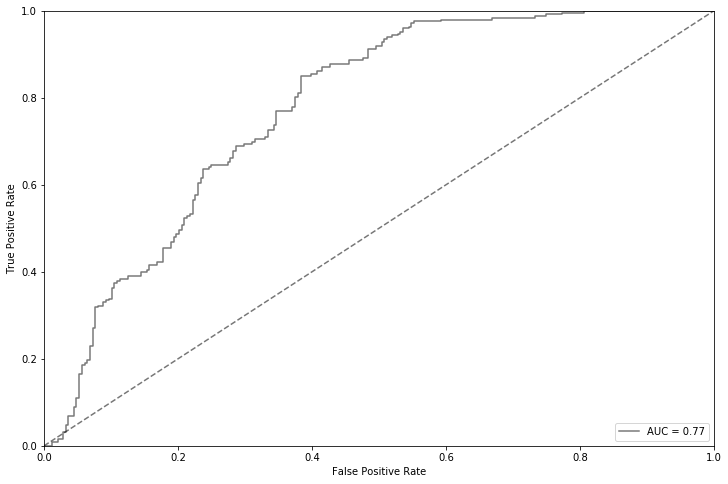

[0.0256029  0.18906133 0.30013078 0.07043851 0.07071179 0.05777038
 0.03704806 0.06585364 0.02994874 0.03205469 0.01835296 0.0427444
 0.06028182]


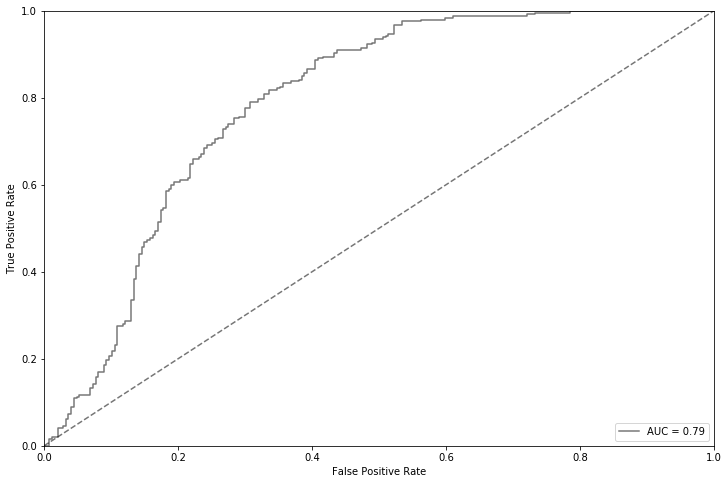

[0.01352218 0.19157353 0.31695412 0.05189806 0.07652284 0.042079
 0.06189045 0.04993529 0.02543742 0.02650352 0.03323135 0.05598109
 0.05447116]


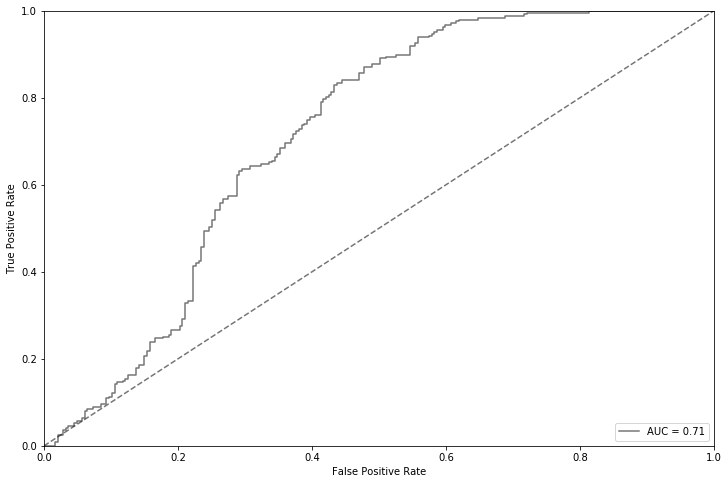

[0.02980774 0.2426718  0.30029333 0.042352   0.06003596 0.04260865
 0.04042263 0.06393959 0.02500647 0.0272874  0.02281312 0.05671908
 0.04604223]


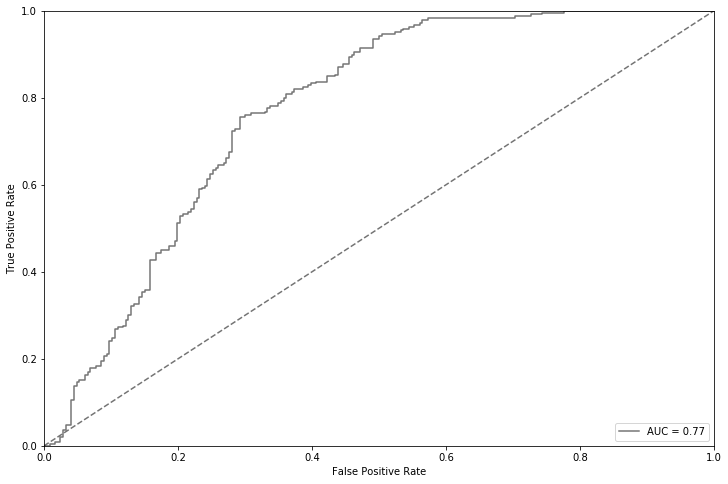

[0.03567745 0.22637748 0.29318127 0.05984409 0.09164768 0.03729047
 0.03699927 0.03598117 0.03954402 0.01797914 0.01931419 0.07434899
 0.03181479]


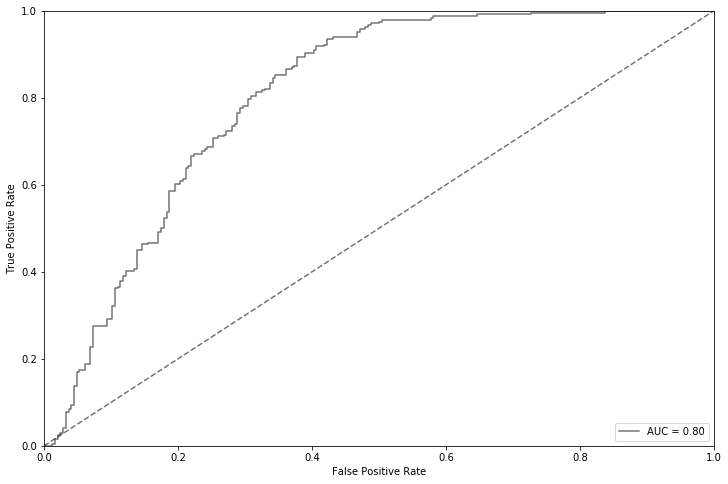

[0.02522017 0.21091545 0.32291825 0.039625   0.1026018  0.04215217
 0.04834791 0.03810189 0.02685499 0.02661671 0.01899627 0.04687488
 0.05077452]


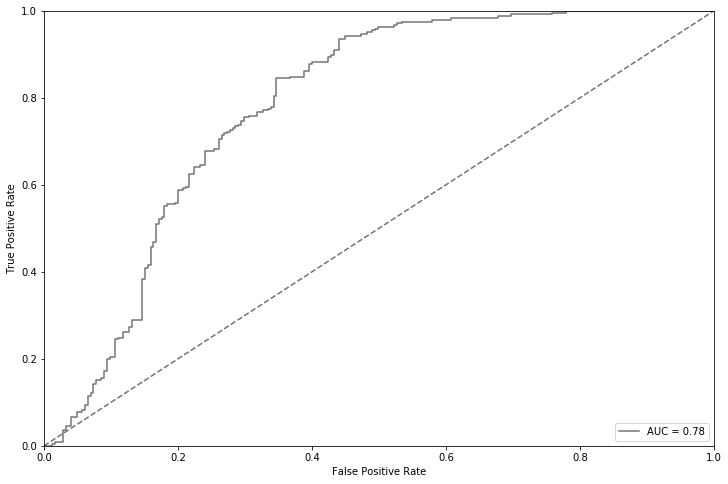

[0.0197587  0.20142867 0.34623891 0.07418935 0.07294708 0.04340217
 0.05148473 0.03841763 0.02383059 0.01980433 0.01726793 0.03279249
 0.05843742]


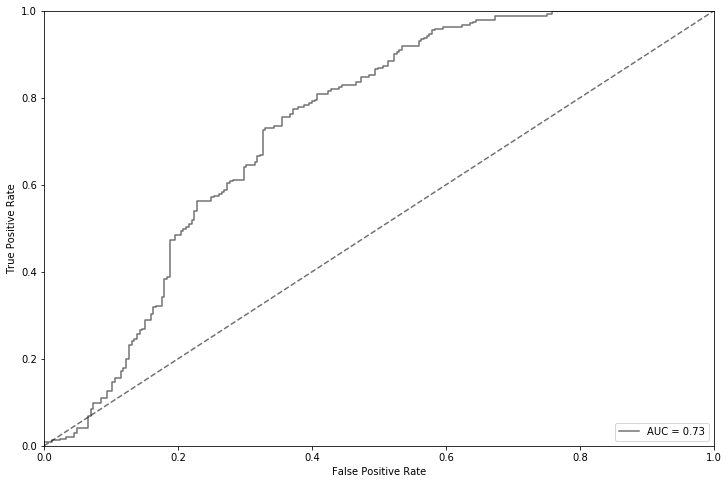

[0.025178   0.22018969 0.3423019  0.08684486 0.05304162 0.03629766
 0.03071648 0.03902637 0.03103715 0.01995752 0.02111055 0.05300748
 0.04129071]


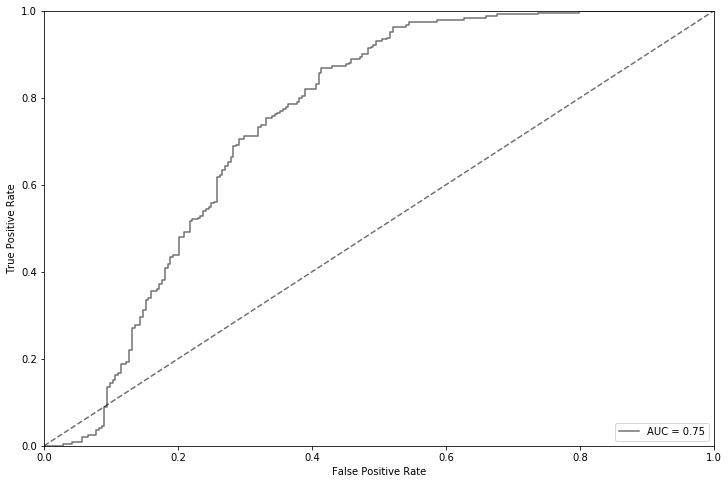

[0.02802031 0.18948248 0.34349987 0.04878305 0.07289697 0.0504528
 0.04068901 0.0529251  0.02551844 0.02552493 0.01857885 0.06191553
 0.04171265]


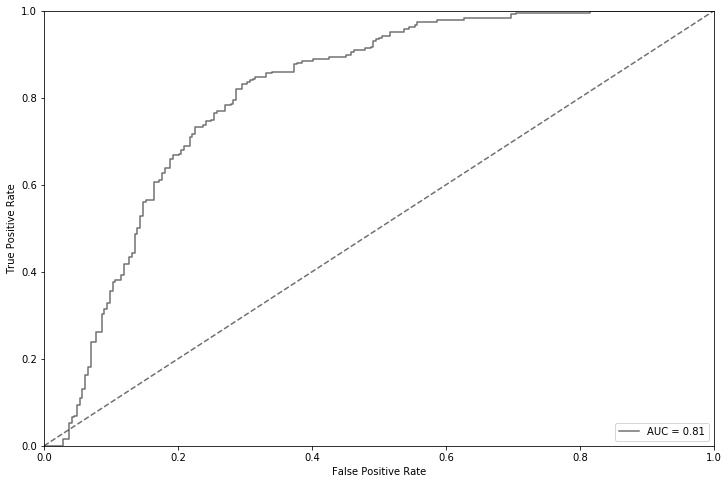

[0.03081643 0.18917385 0.27229072 0.10424773 0.10439997 0.05552112
 0.03542322 0.05419245 0.0338165  0.02162237 0.01372061 0.05412976
 0.03064528]


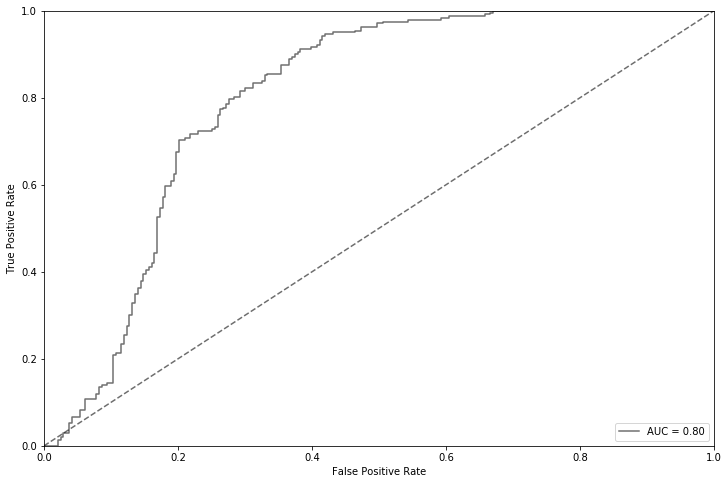

[0.01656657 0.24781055 0.33849556 0.03457821 0.06395086 0.06314731
 0.03594017 0.03608864 0.01873904 0.0241757  0.02888305 0.04760995
 0.04401439]


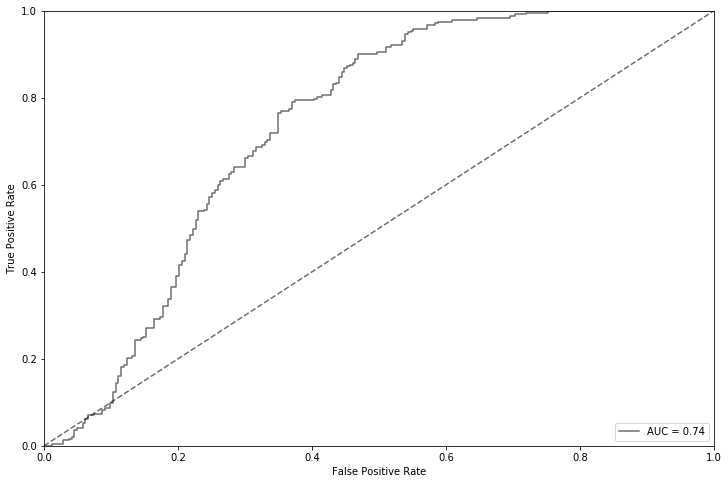

[0.02225139 0.20610697 0.35477728 0.08870637 0.06065148 0.03983477
 0.03132244 0.04467605 0.02954108 0.02218205 0.02079045 0.04607935
 0.03308034]


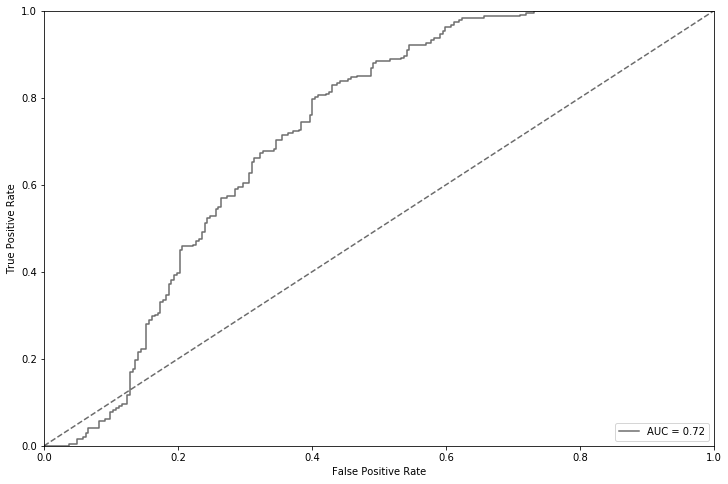

[0.0270551  0.24245295 0.2706321  0.03690722 0.08516502 0.04048686
 0.05186445 0.04950283 0.02692398 0.02765814 0.04728141 0.04834755
 0.04572241]


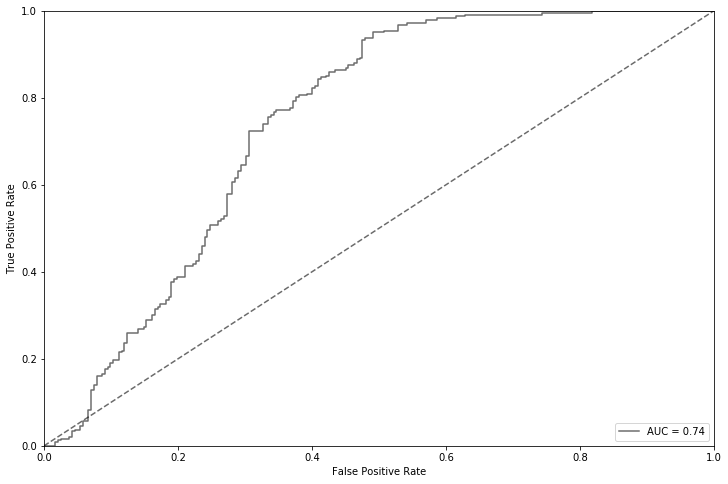

[0.03008096 0.22956664 0.2871567  0.04385868 0.05828131 0.04328117
 0.04748318 0.04997425 0.03095814 0.02197082 0.02616536 0.07558432
 0.05563848]


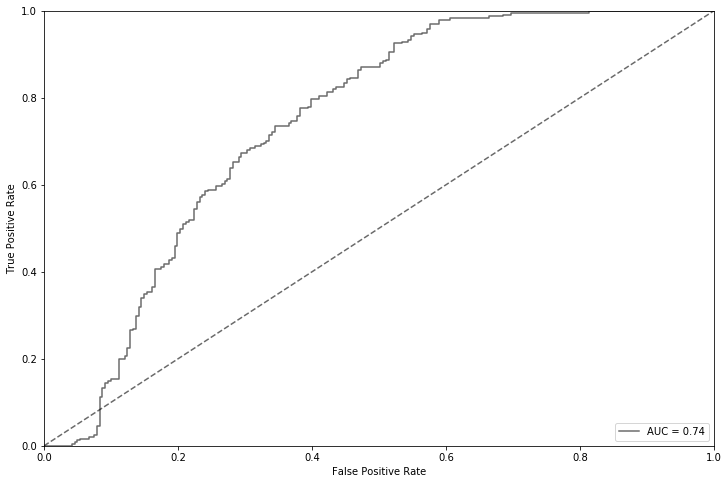

[0.0148771  0.20792199 0.3590466  0.10761739 0.04498736 0.05056985
 0.03336348 0.03878297 0.02508768 0.01730181 0.01219811 0.04942965
 0.038816  ]


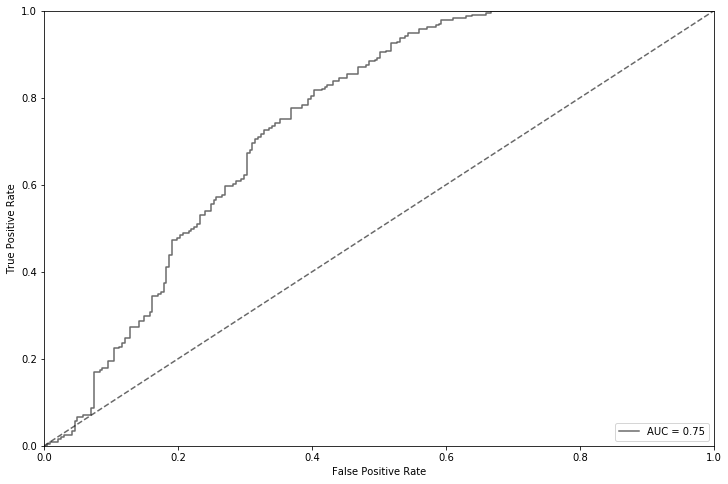

[0.01749144 0.23557007 0.31665639 0.05939378 0.08086151 0.04669964
 0.03205017 0.04596269 0.02979534 0.02816197 0.02593479 0.05546571
 0.02595651]


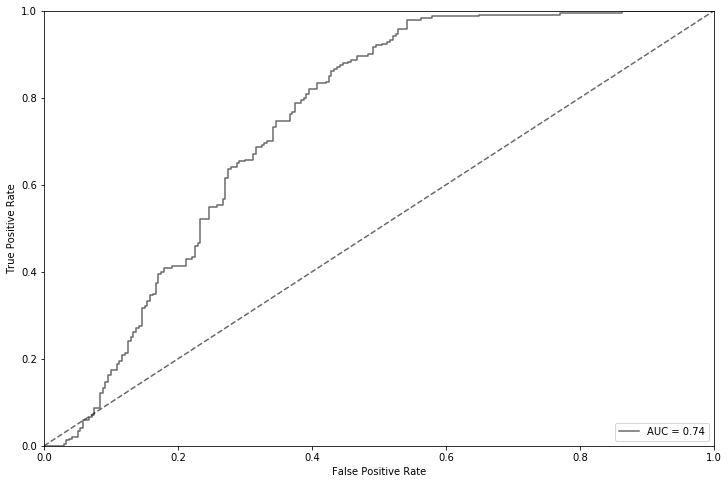

[0.03485226 0.25897812 0.26916462 0.07038199 0.05038543 0.0492887
 0.03120303 0.0435766  0.02725573 0.02402051 0.01698755 0.07975417
 0.04415129]


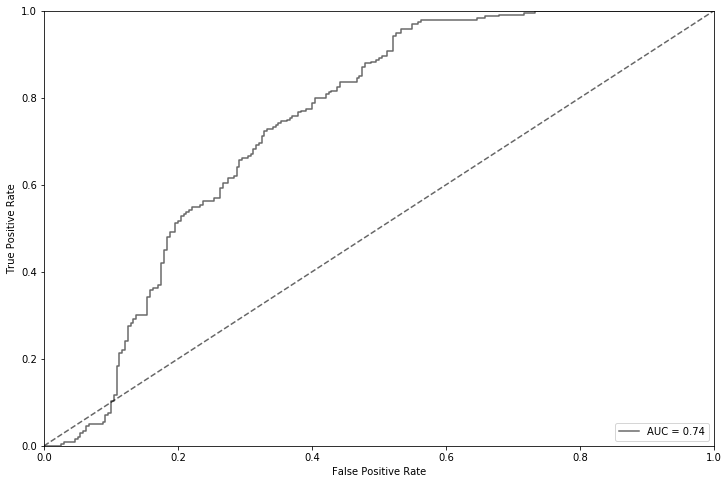

[0.04052937 0.21585925 0.29900282 0.03955751 0.07465114 0.04329745
 0.05089726 0.05960437 0.02525383 0.02249732 0.02908842 0.07019474
 0.02956651]


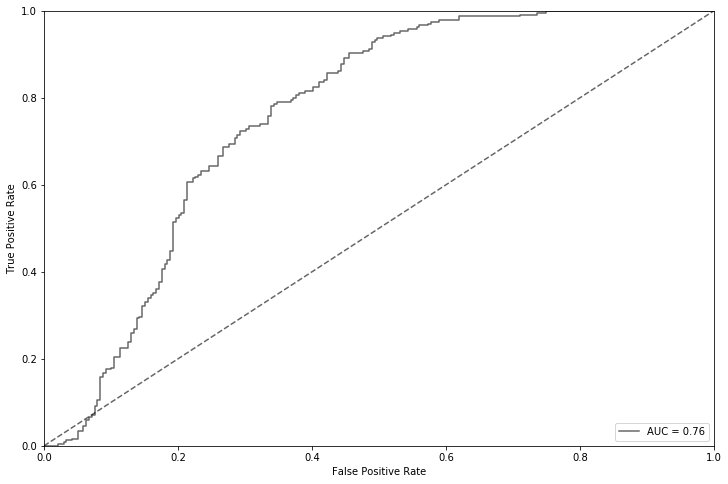

[0.0415701  0.19294222 0.22691052 0.09186332 0.09963013 0.05693446
 0.02924437 0.0639678  0.03013679 0.02772808 0.01941015 0.04373173
 0.07593032]


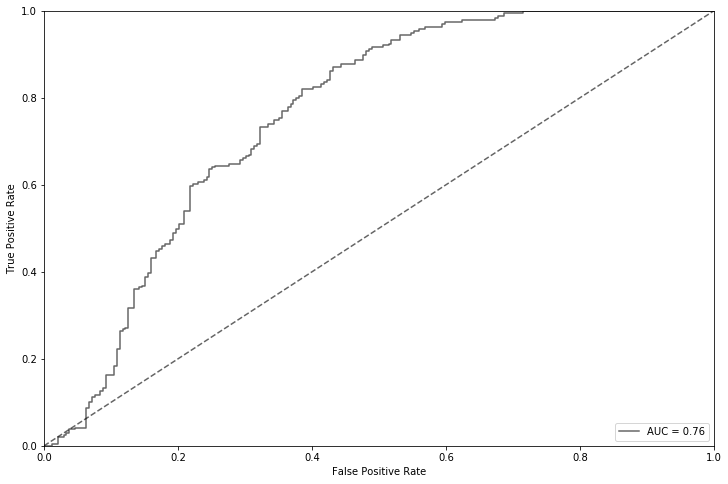

[0.03424909 0.18956962 0.29917425 0.03911574 0.05420517 0.04050745
 0.04812602 0.05409829 0.02929479 0.01800407 0.03754432 0.0727026
 0.08340858]


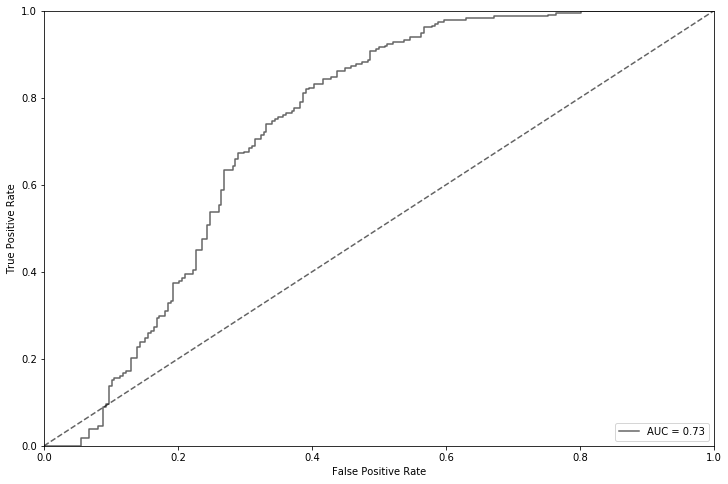

[0.02425131 0.22498269 0.32255741 0.03619408 0.05387993 0.04474471
 0.04073587 0.05416018 0.03055881 0.02571953 0.03389979 0.05530879
 0.05300692]


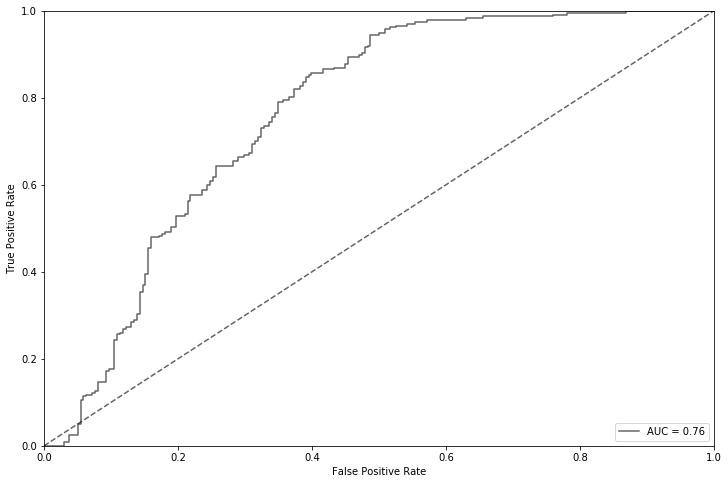

[0.02595046 0.22749358 0.31052631 0.03445629 0.07350416 0.05033948
 0.04430294 0.03850519 0.02985185 0.03607091 0.02027121 0.04827454
 0.06045307]


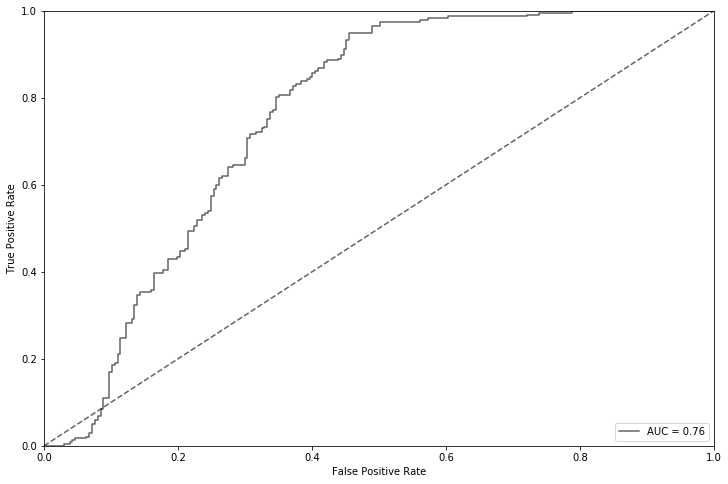

[0.01769312 0.20782108 0.28557364 0.10185311 0.058073   0.0360873
 0.04506475 0.03850598 0.02509869 0.02952994 0.02306251 0.07775526
 0.05388161]


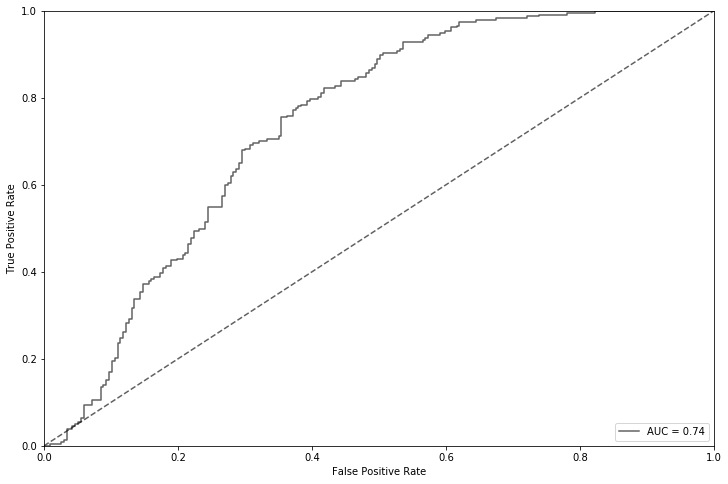

[0.01723284 0.22356087 0.28762488 0.07664562 0.05674864 0.04337437
 0.03844773 0.05847863 0.02821997 0.02402278 0.03073301 0.06289817
 0.05201248]


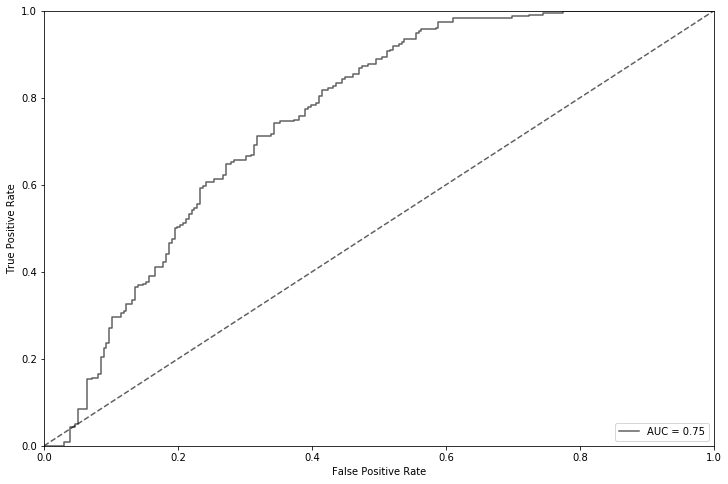

[0.02251024 0.2269739  0.3209236  0.06243159 0.05787661 0.04663682
 0.04337091 0.03988062 0.02120889 0.02124456 0.02062873 0.04723875
 0.06907478]


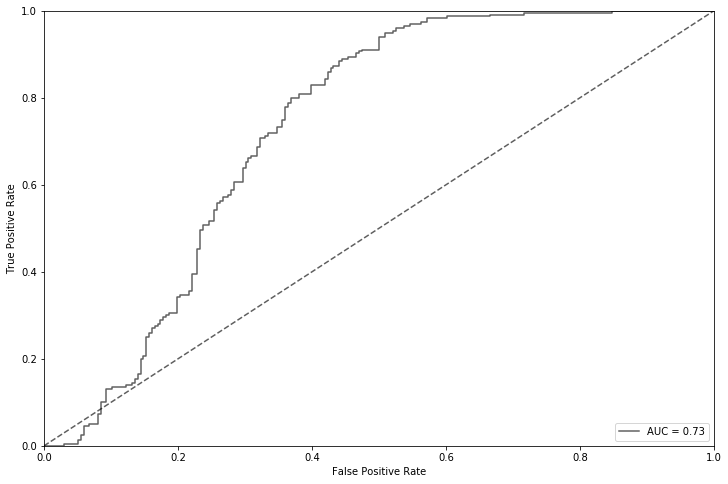

[0.03417375 0.17405189 0.33372721 0.05619887 0.08516075 0.02801203
 0.03151121 0.0500789  0.0273515  0.02283948 0.03408384 0.07524339
 0.04756717]


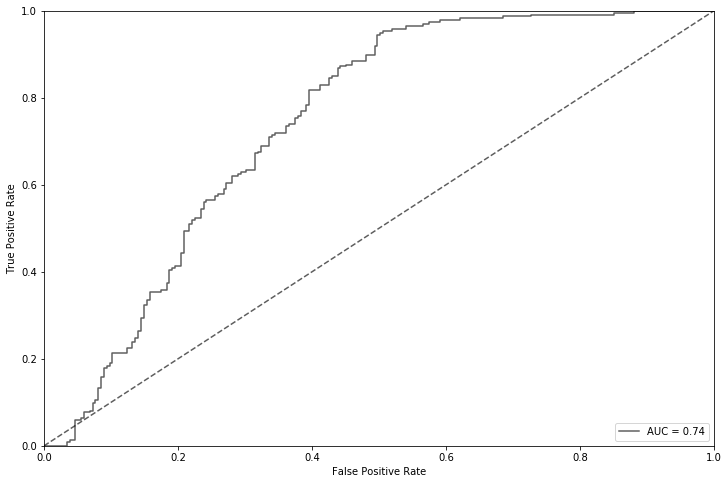

[0.02226861 0.21154882 0.33756584 0.03289611 0.08021096 0.03780959
 0.04153108 0.06999048 0.02873067 0.0312283  0.01782763 0.05511698
 0.03327492]


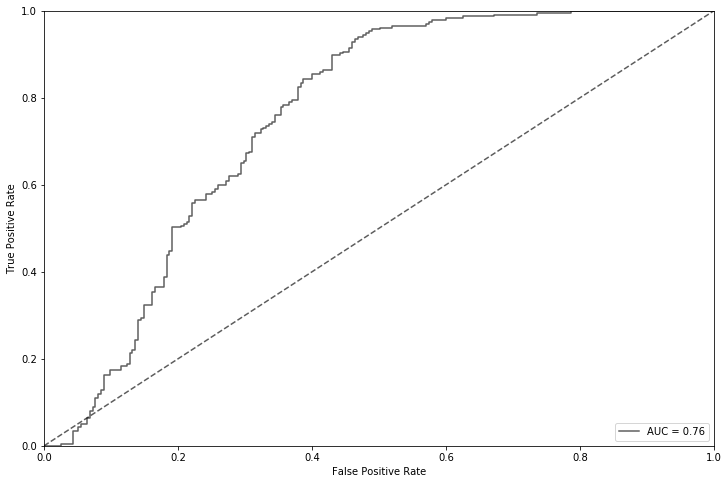

[0.02791955 0.21234447 0.3384473  0.0945655  0.06431177 0.03253144
 0.02957989 0.03528014 0.03043109 0.020005   0.02425553 0.0325353
 0.05779303]


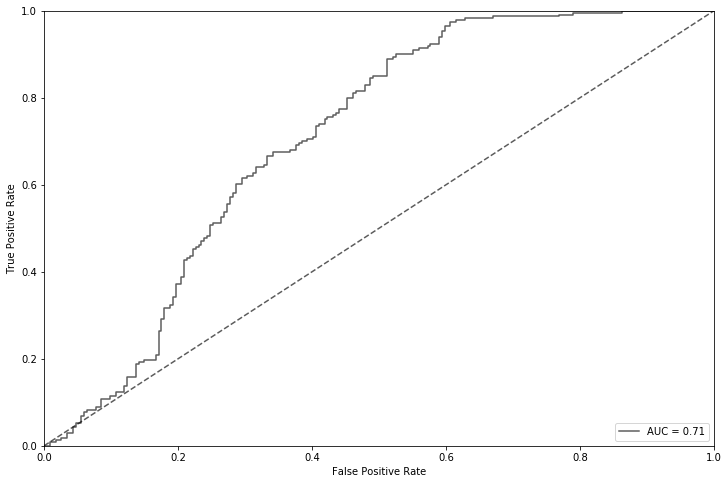

[0.03724075 0.24394219 0.32129674 0.05696211 0.05910677 0.02699373
 0.02919938 0.03409416 0.03060551 0.02969433 0.02673925 0.07474524
 0.02937984]


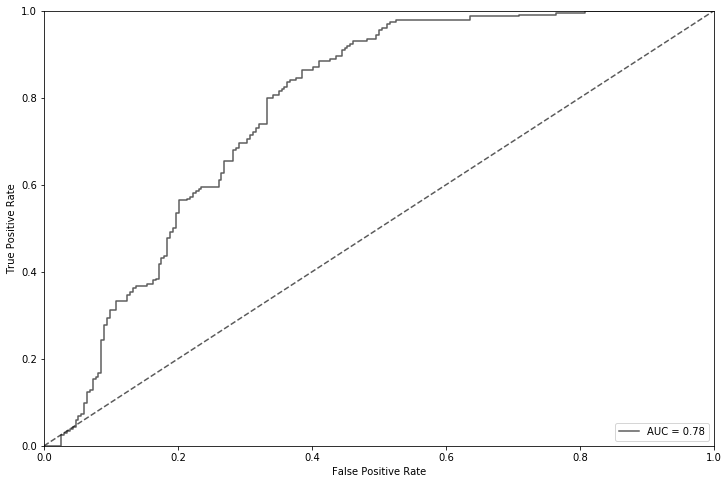

[0.02048486 0.20266548 0.38777309 0.06647662 0.05226859 0.04730247
 0.03870469 0.04507259 0.02913183 0.01872532 0.02947014 0.02651152
 0.03541281]


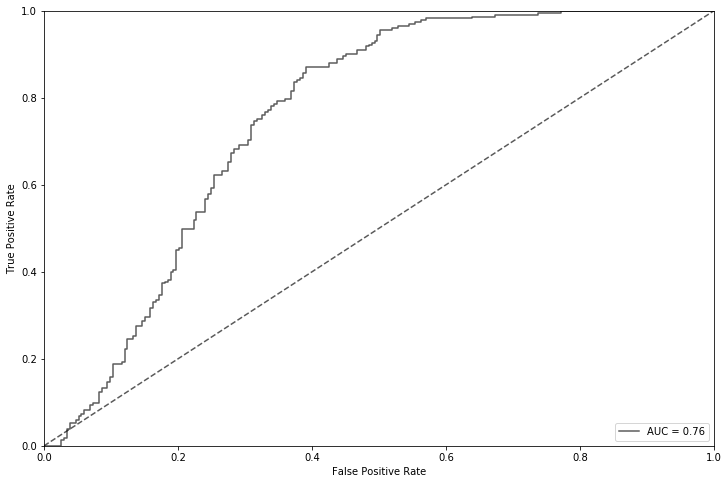

[0.03135224 0.2029873  0.37171661 0.05579169 0.06556782 0.03750311
 0.03847788 0.04116171 0.03217822 0.02751949 0.02874924 0.03747006
 0.02952463]


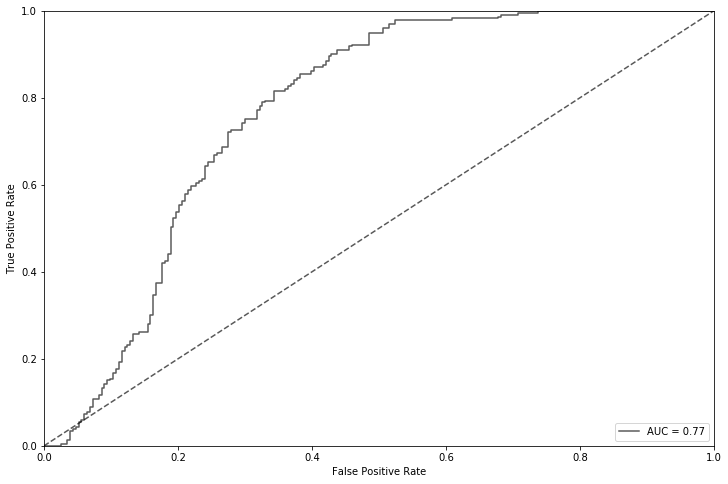

[0.01929186 0.20988966 0.33067131 0.03809776 0.06173474 0.0443822
 0.03366027 0.05627307 0.03259677 0.0239348  0.02496474 0.0654846
 0.05901822]


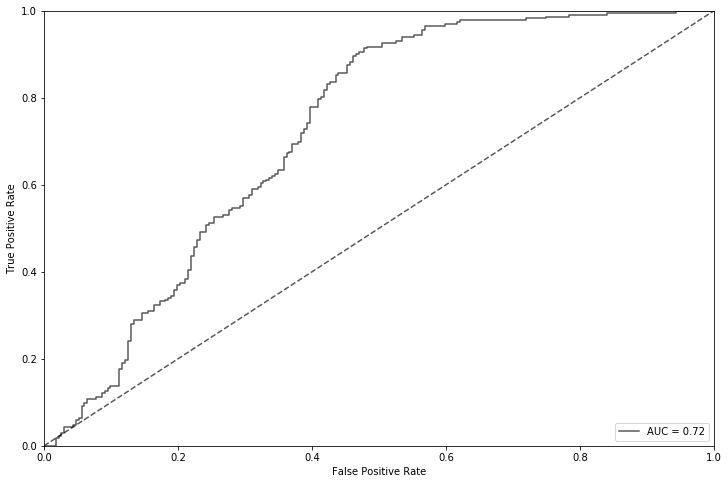

[0.02824303 0.20617241 0.33015057 0.04338126 0.08941215 0.03662133
 0.03477215 0.0497686  0.04162375 0.02682837 0.03203058 0.05413116
 0.02686463]


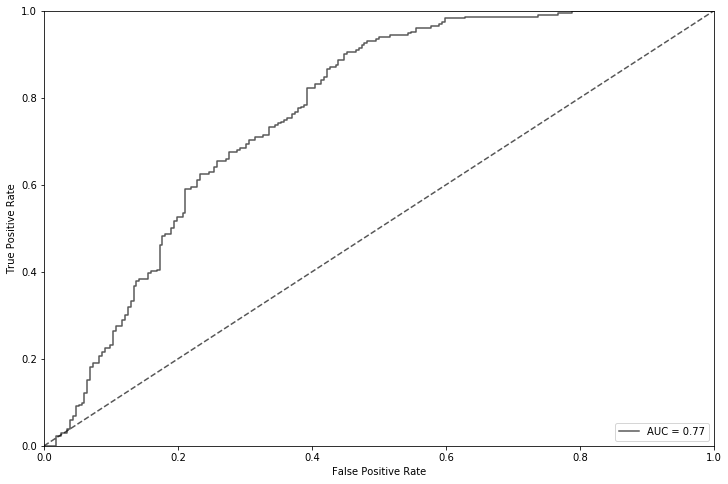

[0.0398138  0.22455817 0.30402311 0.0360748  0.06556445 0.05636258
 0.03901792 0.05574546 0.0326697  0.02612409 0.02604695 0.05947987
 0.03451909]


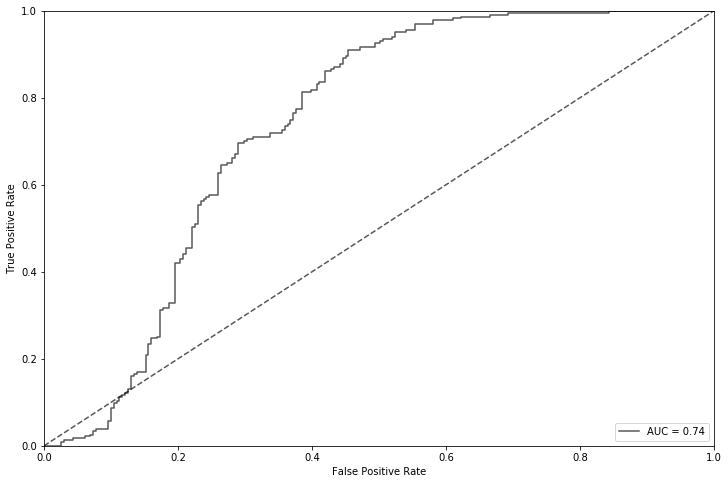

[0.02482375 0.2222769  0.30871389 0.09141357 0.07760757 0.04177384
 0.0262321  0.05154245 0.04242975 0.02245875 0.01678542 0.03331964
 0.04062236]


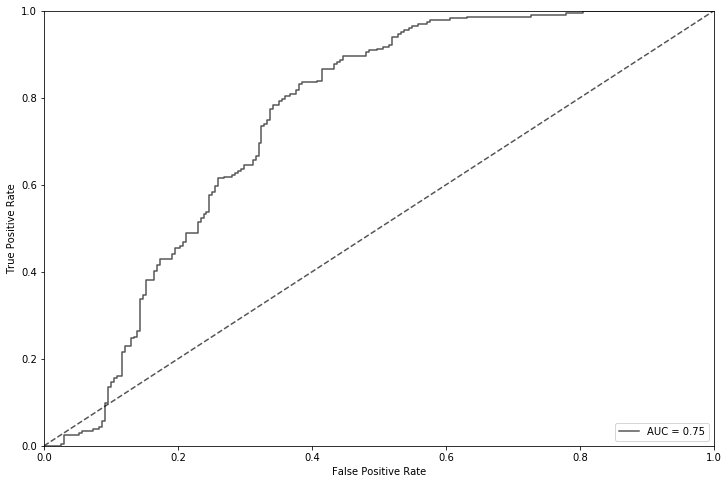

[0.03250773 0.26815718 0.30893988 0.02339212 0.05129947 0.04929962
 0.03454883 0.04082289 0.03758509 0.03083746 0.02943765 0.0614894
 0.03168266]


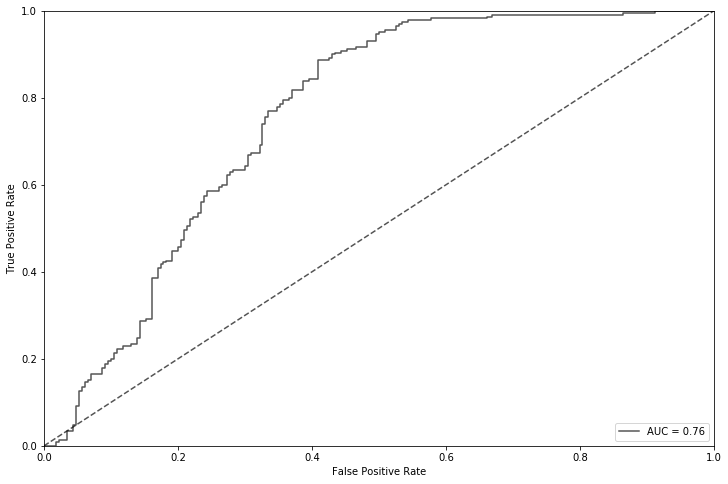

[0.01739348 0.1972987  0.31593334 0.10779852 0.06291899 0.0339972
 0.0320379  0.03833663 0.0297616  0.01717733 0.02347026 0.08212656
 0.04174948]


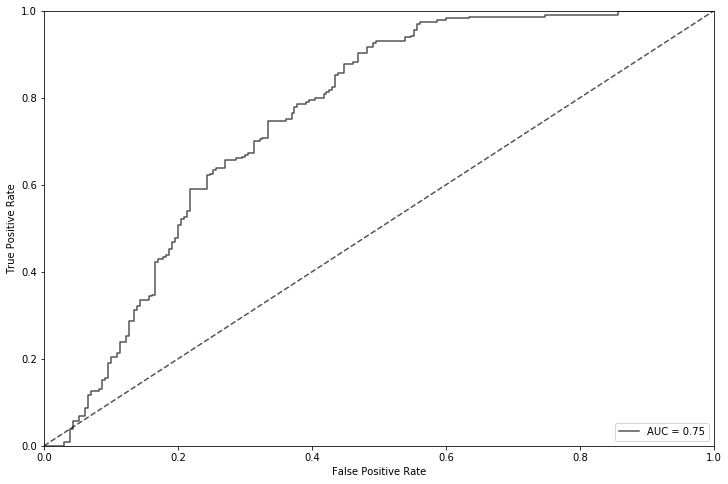

[0.03575163 0.23378204 0.29838865 0.06349644 0.06135928 0.044053
 0.03338175 0.04551246 0.0242692  0.02542913 0.01539608 0.07362855
 0.04555181]


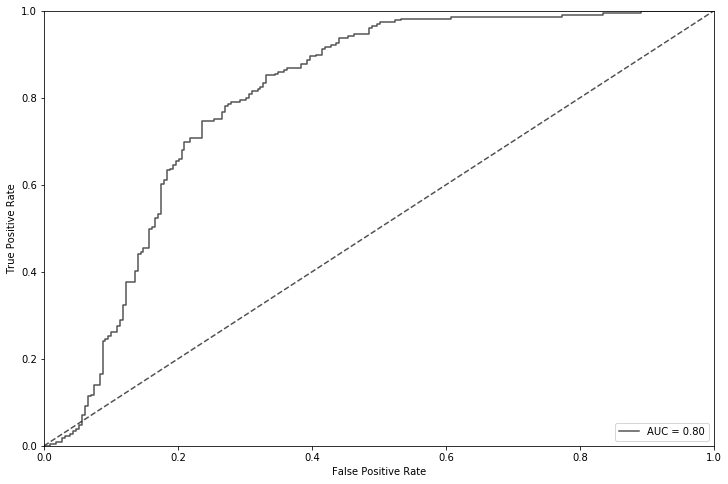

[0.02586821 0.23391028 0.29329892 0.06008716 0.06439773 0.03400221
 0.03506028 0.0337552  0.02971378 0.02733053 0.02728089 0.11035092
 0.02494387]


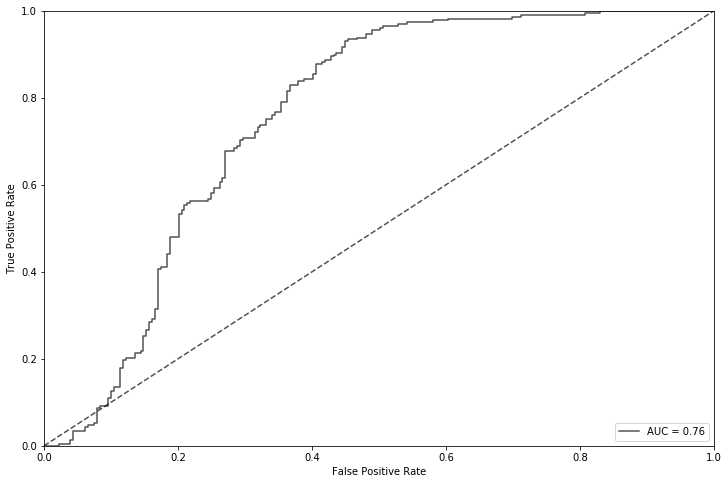

[0.02110438 0.18824371 0.28928783 0.07247103 0.05525361 0.04554389
 0.04176557 0.0686044  0.02244171 0.03047068 0.0306475  0.08302999
 0.0511357 ]


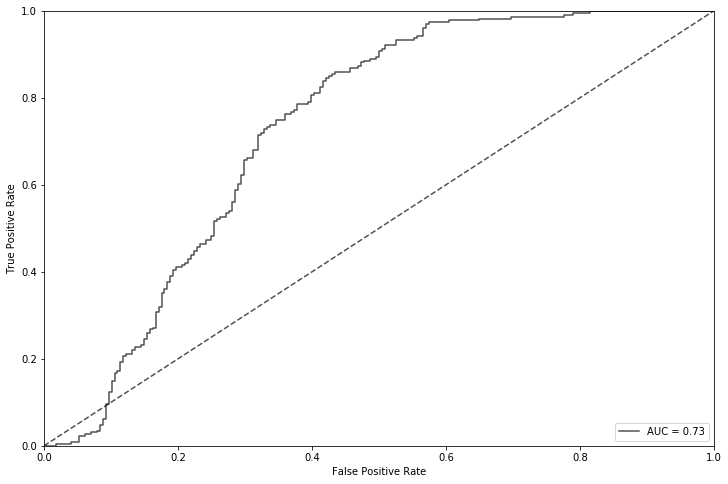

[0.03431973 0.26360032 0.3186925  0.0226548  0.05921499 0.04177882
 0.03558369 0.05422166 0.02077784 0.01953867 0.03129574 0.04834193
 0.04997929]


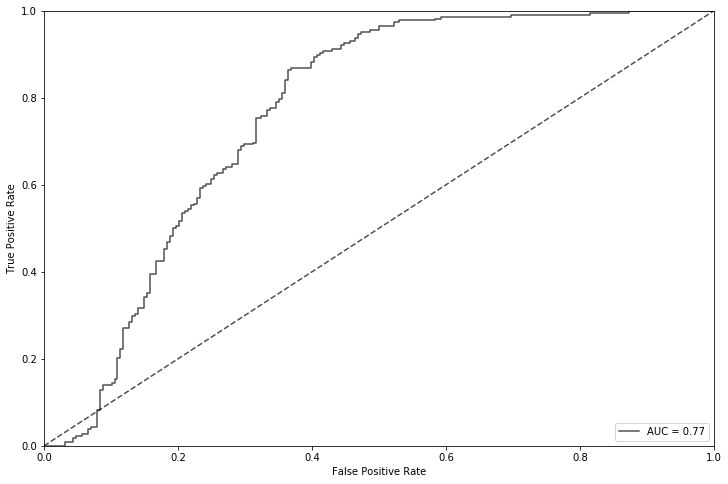

[0.02332655 0.26224834 0.31499787 0.05455537 0.05695164 0.04062219
 0.04119806 0.04627927 0.02684235 0.02246853 0.01717418 0.06711766
 0.02621799]


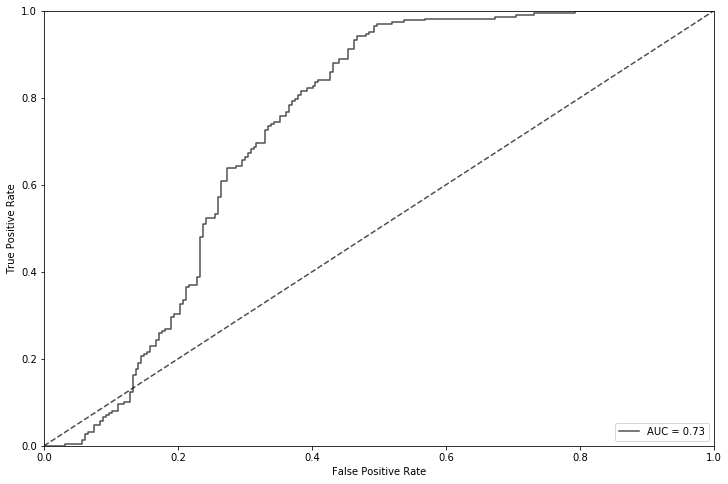

[0.0216551  0.2121519  0.29584243 0.07610542 0.09339561 0.04796657
 0.05132682 0.04962716 0.02679235 0.02219273 0.03114286 0.03920397
 0.03259708]


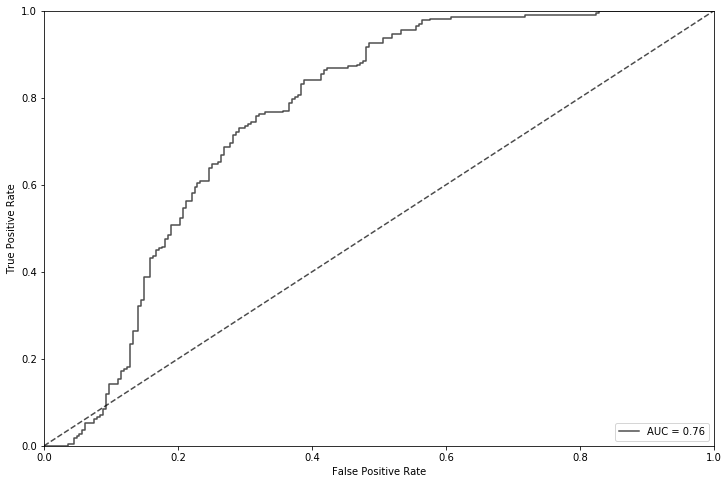

[0.02909392 0.27184703 0.29914757 0.04300232 0.06126404 0.02998862
 0.03259428 0.05243413 0.02358758 0.01980425 0.0290778  0.0647977
 0.04336075]


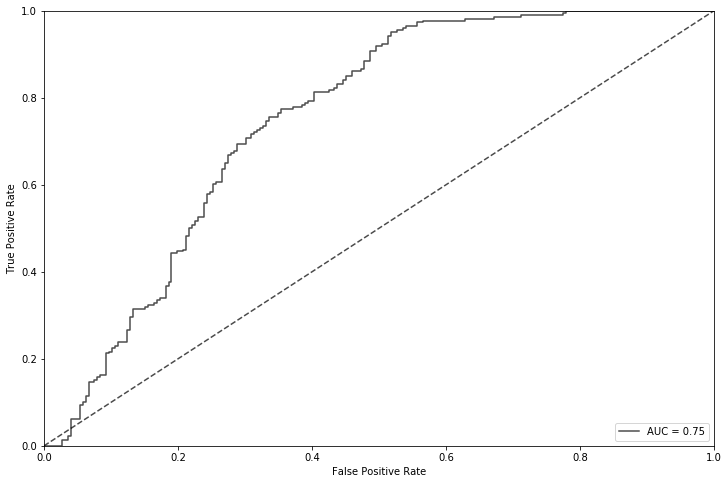

[0.04766059 0.27262202 0.2769707  0.05755272 0.05157665 0.0372457
 0.04004638 0.04201154 0.03264621 0.02267462 0.02989642 0.04808759
 0.04100886]


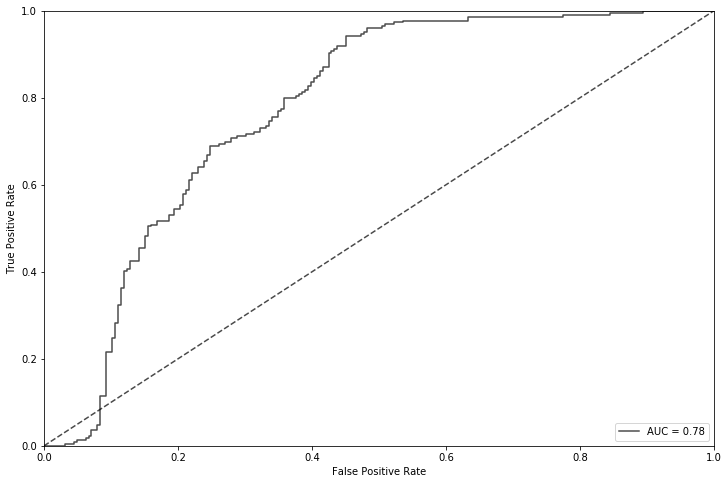

[0.01606476 0.21878659 0.27281706 0.06118457 0.06506117 0.04095481
 0.04183574 0.06879598 0.02731496 0.02219283 0.02091061 0.09735196
 0.04672896]


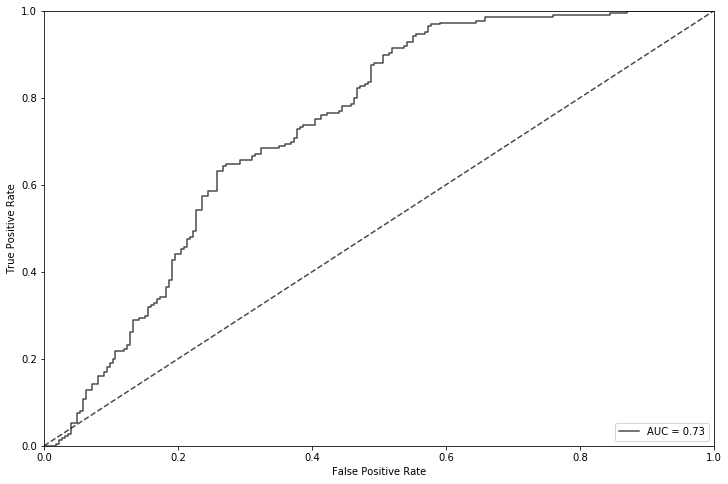

[0.01688205 0.26586453 0.29201059 0.02952009 0.07416775 0.05203062
 0.03434276 0.05696902 0.02583007 0.02273242 0.0204938  0.06883557
 0.04032074]


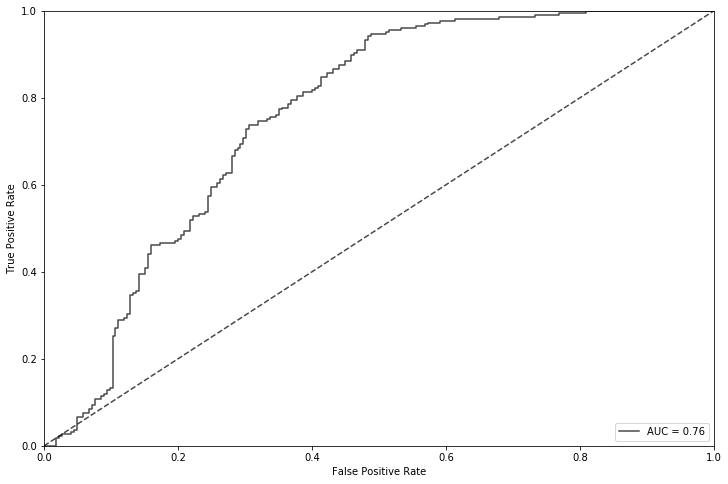

[0.03388959 0.22830332 0.27446353 0.03720136 0.07093844 0.03802522
 0.04116268 0.09142025 0.02947807 0.02545771 0.02471026 0.07092055
 0.03402902]


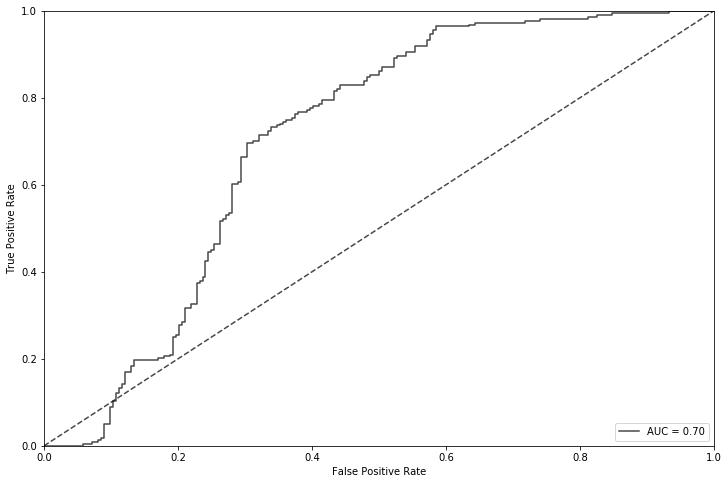

[0.0549027  0.27905812 0.23233039 0.04234576 0.05949198 0.04501934
 0.04276206 0.03655949 0.04143611 0.03670476 0.0345159  0.03276195
 0.06211144]


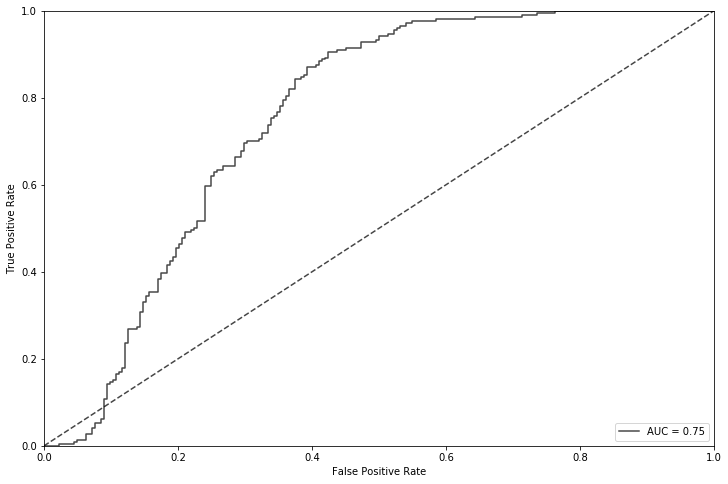

[0.02620954 0.26757337 0.28720763 0.05089377 0.07245709 0.04419849
 0.03154221 0.04655115 0.0176162  0.02791536 0.02991035 0.05624364
 0.0416812 ]


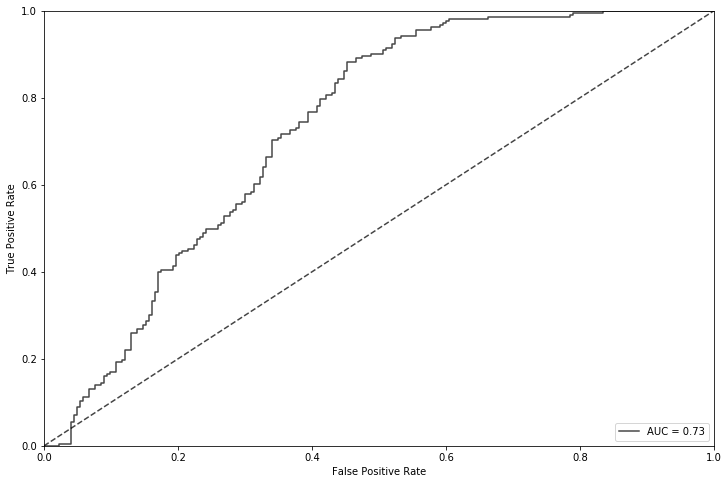

[0.02249195 0.20070594 0.33223275 0.04221754 0.08137192 0.03529058
 0.04737227 0.0477919  0.04217121 0.01881546 0.03506589 0.04318937
 0.05128322]


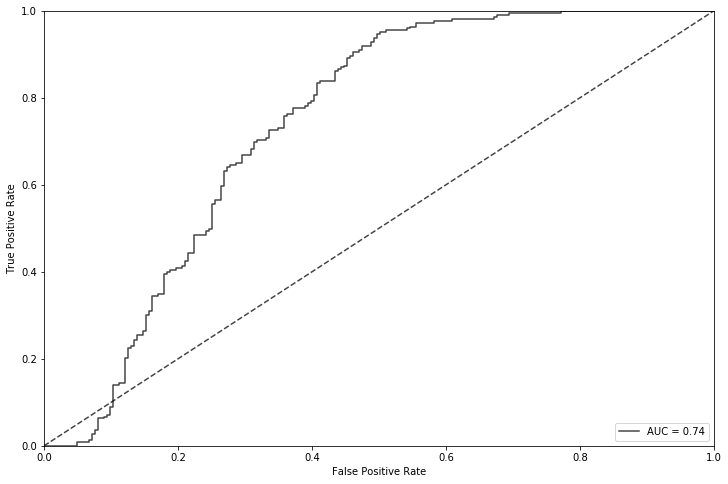

[0.03081541 0.24486691 0.26908935 0.09603159 0.06100802 0.04070387
 0.06406473 0.05236519 0.02439068 0.02033403 0.02717253 0.03721264
 0.03194504]


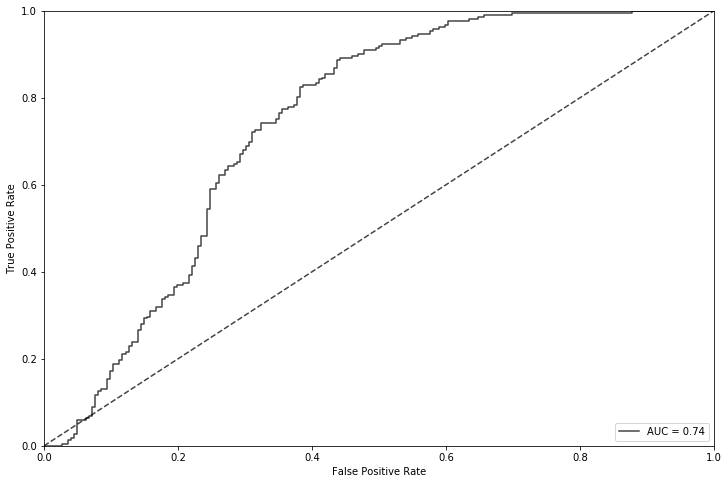

[0.03037038 0.21209434 0.27276202 0.03026271 0.09239032 0.03745479
 0.06034501 0.05708898 0.02502614 0.02661059 0.02678209 0.08591731
 0.0428953 ]


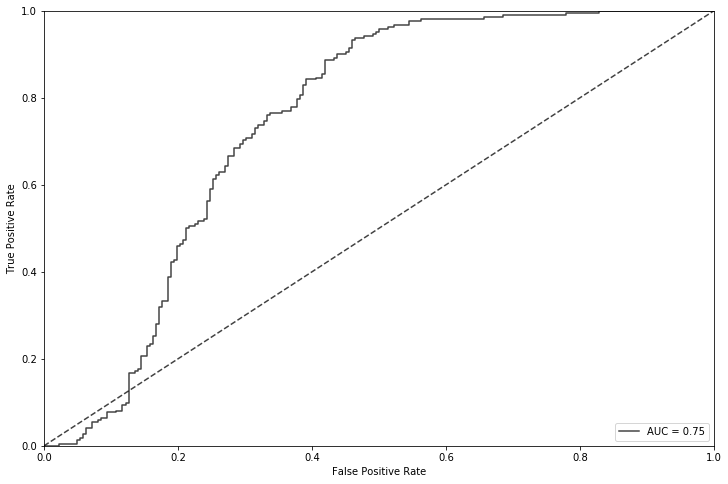

[0.02496521 0.28115483 0.24546584 0.02602641 0.09532495 0.04460558
 0.03328567 0.04787399 0.02295825 0.0204098  0.02496739 0.06955905
 0.06340302]


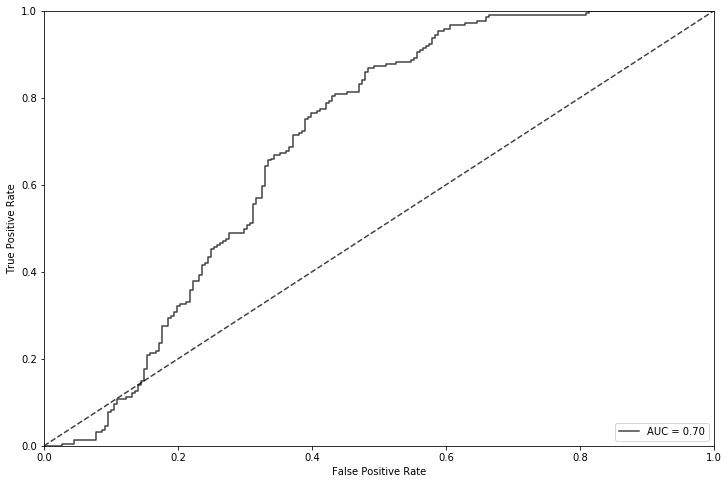

[0.0169892  0.26378306 0.30866857 0.05562046 0.07462298 0.03890166
 0.04961704 0.03005896 0.02747559 0.02804314 0.02472917 0.04254889
 0.03894128]


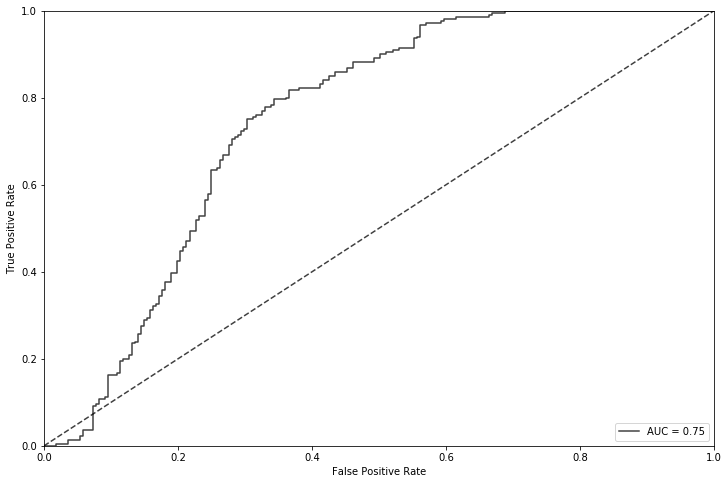

[0.02600192 0.24762486 0.29957063 0.02772562 0.05108992 0.05480127
 0.05362652 0.04877421 0.0355189  0.0248234  0.02156107 0.05822437
 0.05065731]


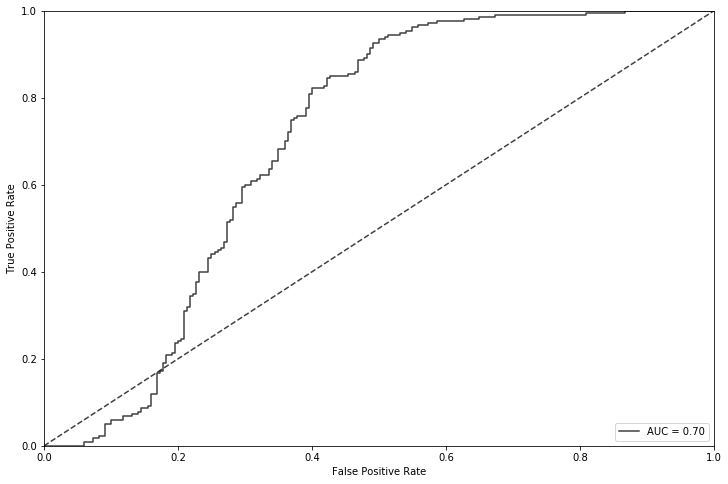

[0.01540851 0.23516595 0.25272548 0.07727295 0.09463542 0.0339251
 0.03266759 0.08471193 0.03162975 0.02500635 0.02218173 0.05752311
 0.03714614]


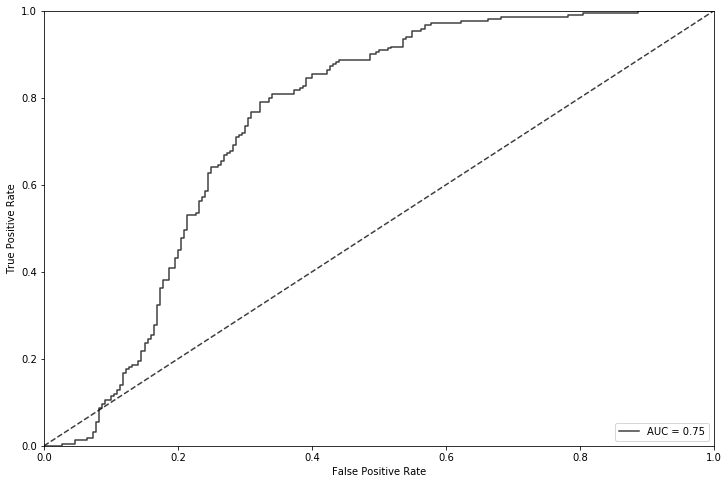

[0.01168912 0.23513623 0.30582484 0.03111221 0.06525326 0.0548612
 0.05690263 0.05232642 0.03758966 0.02263751 0.02562236 0.05487426
 0.0461703 ]


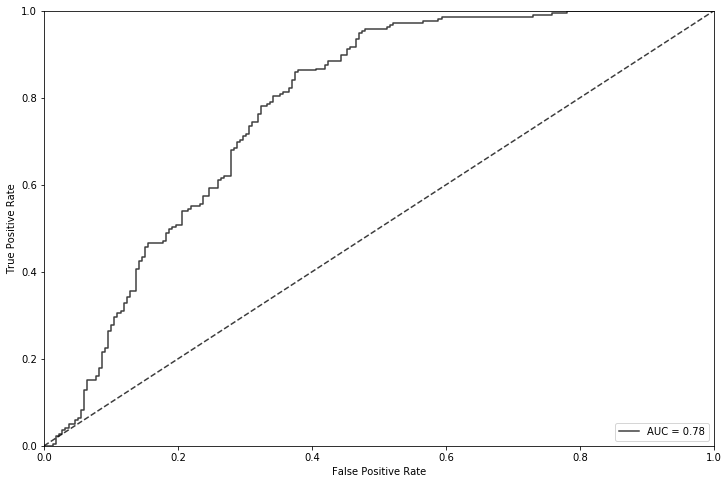

[0.01965514 0.23908385 0.27690317 0.06236453 0.06887021 0.04334071
 0.04629016 0.03914409 0.02529235 0.02267074 0.03250588 0.05370875
 0.07017042]


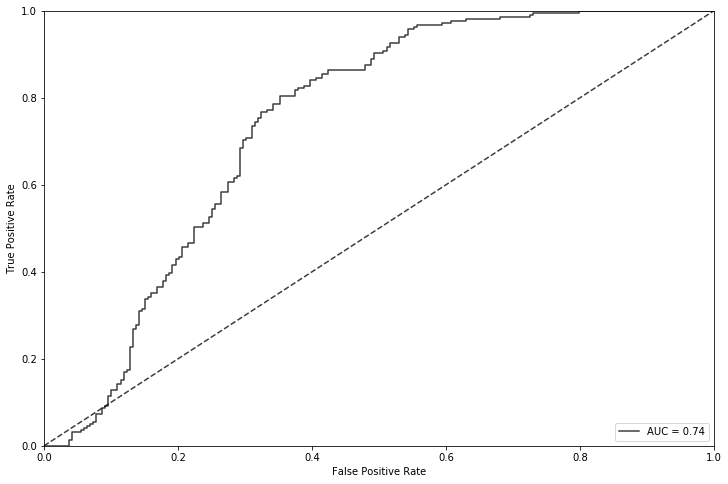

[0.02318847 0.28144387 0.25752411 0.07685154 0.05256259 0.0311354
 0.05566266 0.03266384 0.02428697 0.03240155 0.03901617 0.03376512
 0.0594977 ]


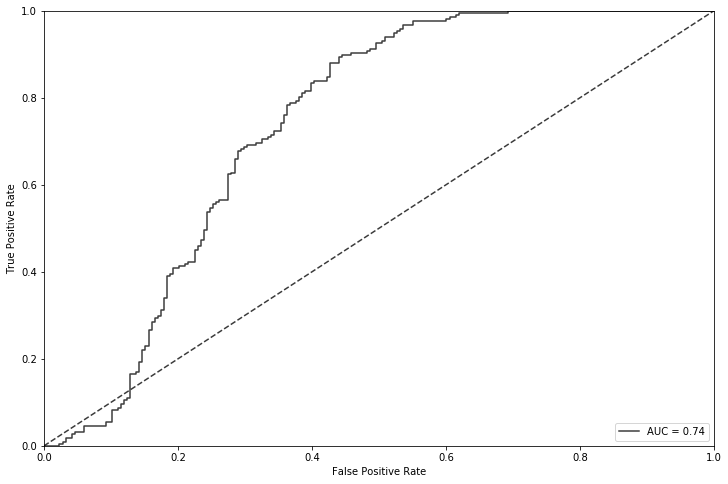

[0.02019273 0.23011512 0.26602057 0.06130307 0.07701857 0.05092973
 0.0354836  0.04027316 0.02725487 0.02594738 0.03614833 0.09302351
 0.03628937]


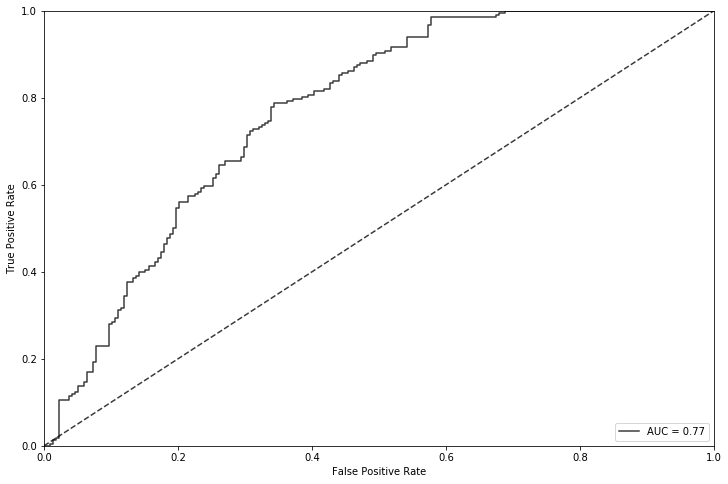

[0.0213881  0.25188086 0.29301378 0.0565049  0.06115635 0.03158299
 0.02797713 0.0491185  0.02919575 0.02855492 0.01835688 0.0702187
 0.06105113]


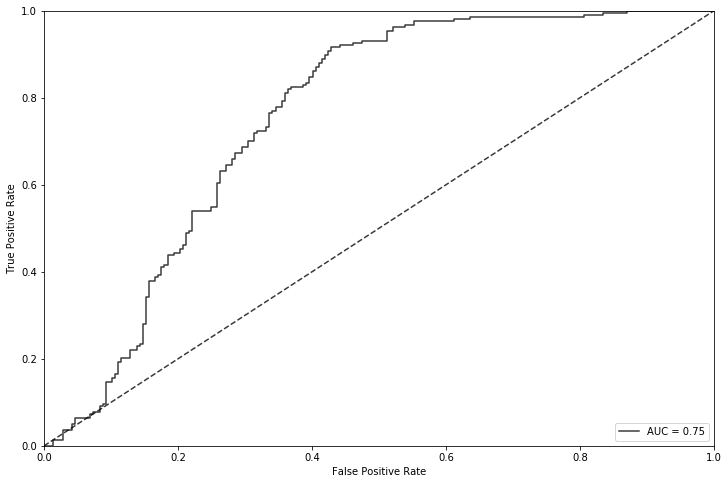

[0.01963701 0.23460232 0.26536815 0.06335975 0.05292256 0.04770569
 0.06788682 0.04534518 0.02960288 0.02298508 0.02296401 0.08819616
 0.03942438]


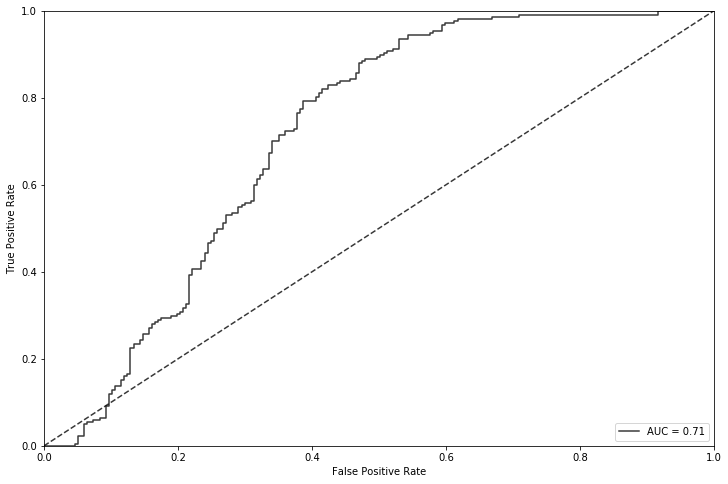

[0.03035972 0.25494803 0.27773887 0.05854101 0.10045353 0.02472955
 0.02786052 0.02483866 0.03727209 0.0297698  0.02495394 0.05804833
 0.05048594]


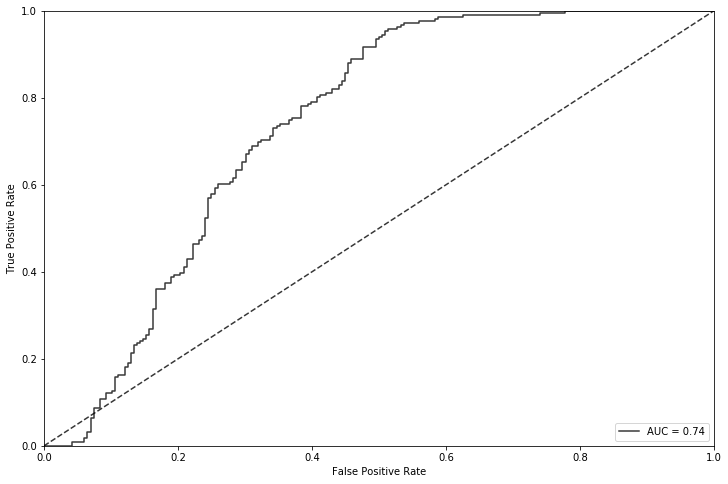

[0.03352766 0.245413   0.32687291 0.05775315 0.04515977 0.03542999
 0.04070257 0.03523011 0.03561992 0.02061545 0.04029809 0.05826076
 0.02511663]


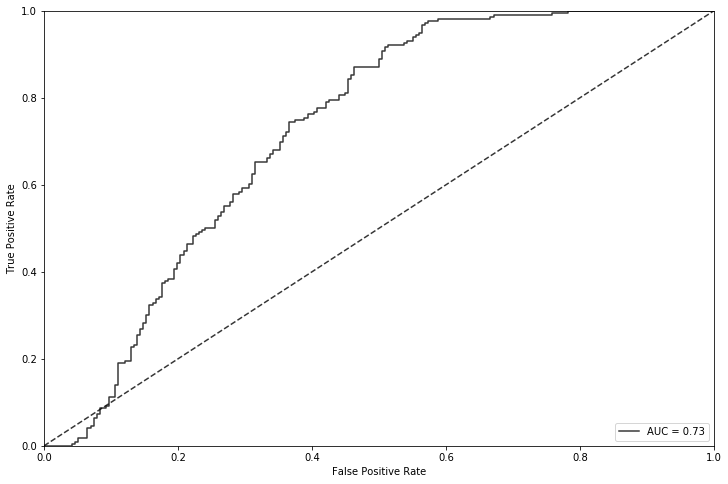

[0.03328395 0.23616937 0.33217083 0.04143006 0.04115677 0.059769
 0.03141455 0.03937113 0.02973133 0.02511336 0.02186511 0.0433556
 0.06516892]


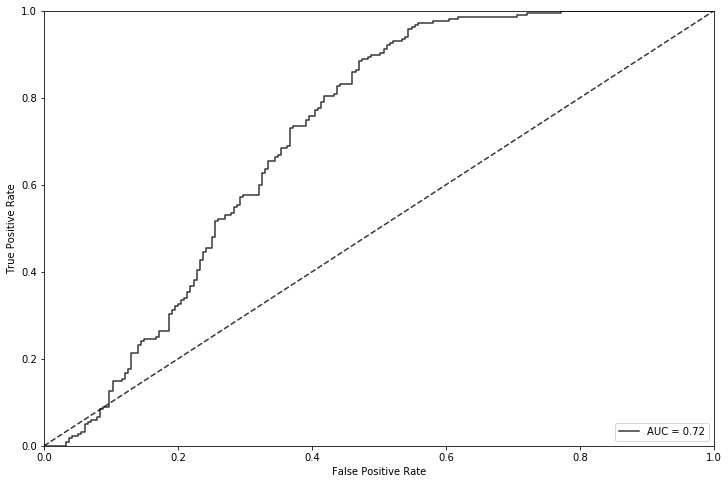

[0.02222814 0.27181265 0.27092254 0.08810068 0.03687416 0.05144733
 0.06299892 0.03688883 0.03231472 0.02242951 0.0268876  0.03700977
 0.04008516]


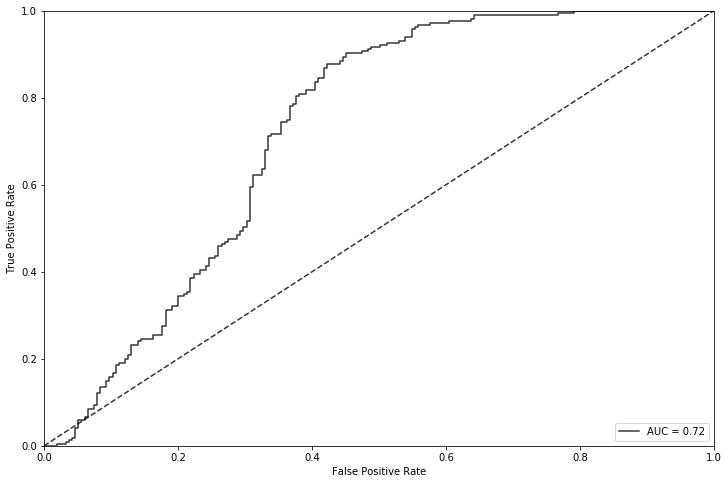

[0.0443941  0.28473181 0.25242218 0.05894343 0.04794802 0.06601906
 0.03202368 0.03499263 0.02776426 0.03599719 0.02267875 0.05514751
 0.03693737]


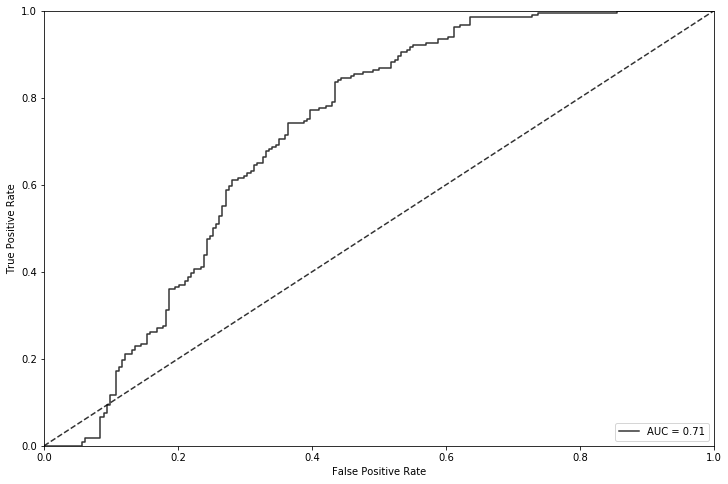

[0.01362651 0.25700101 0.29252369 0.05581806 0.05843093 0.05534084
 0.05077461 0.05027731 0.02905948 0.02373285 0.03168523 0.04208255
 0.03964691]


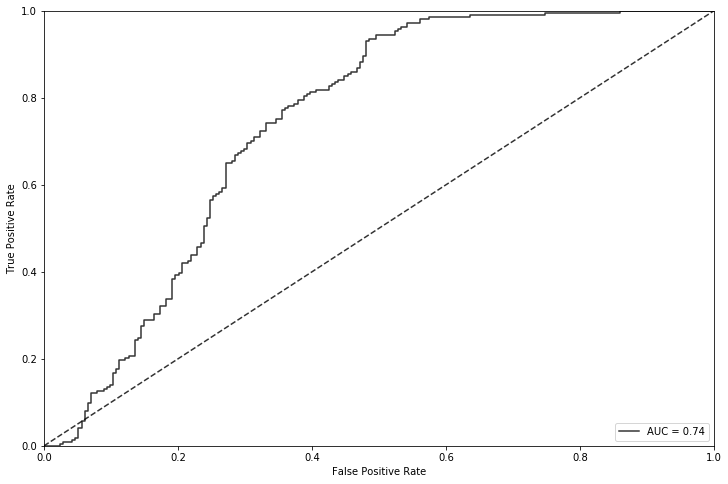

[0.0306449  0.19851892 0.31825372 0.05916846 0.0739024  0.03521956
 0.04383751 0.04272295 0.02489848 0.02538339 0.04252559 0.04799591
 0.05692822]


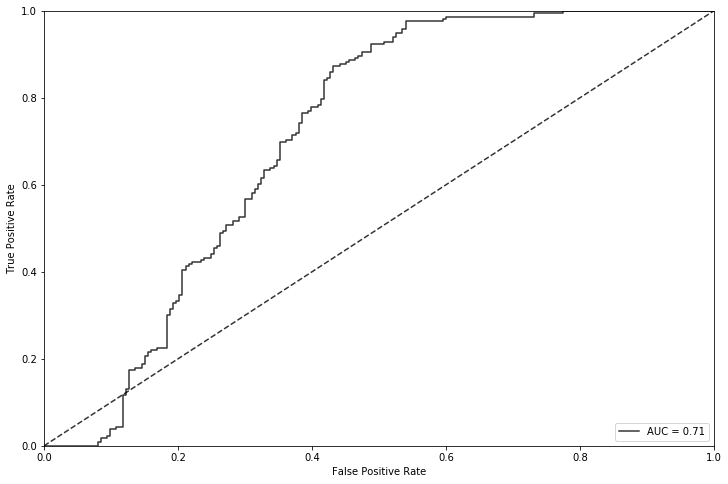

[0.03396792 0.22705636 0.32335155 0.05831211 0.06564428 0.03666768
 0.05809018 0.04800216 0.02738784 0.02581545 0.01945238 0.05287866
 0.02337343]


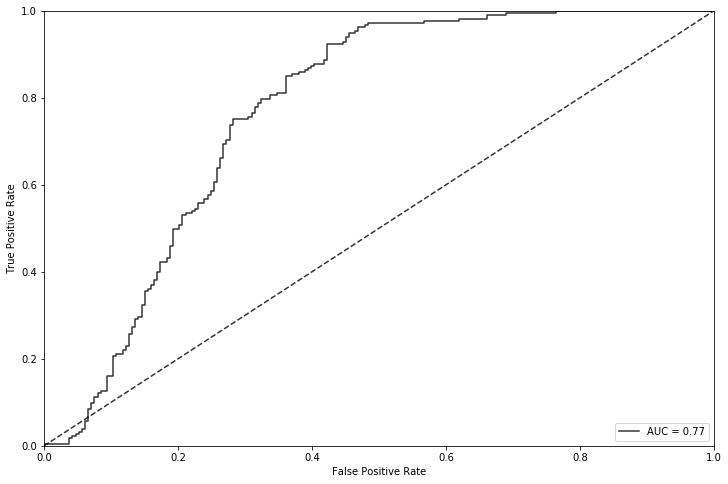

[0.03731237 0.25422523 0.26492936 0.04019657 0.08752281 0.04567258
 0.03936585 0.05484376 0.02895638 0.03130954 0.01599365 0.04926914
 0.05040275]


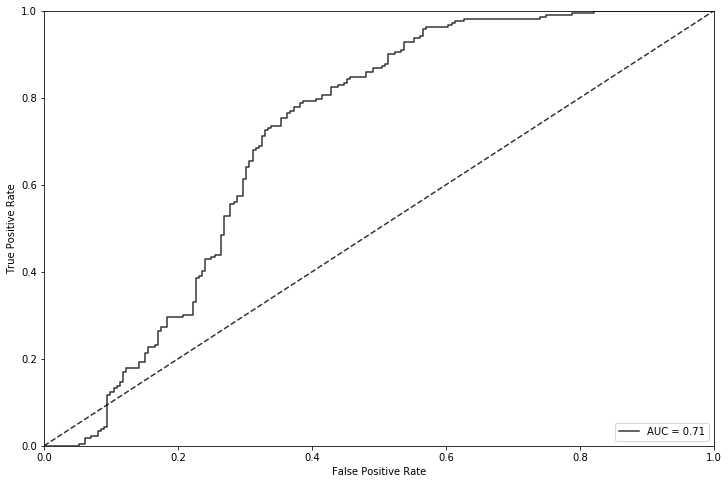

[0.04177089 0.24758355 0.24100488 0.04551211 0.07125727 0.05694819
 0.04640154 0.05193937 0.03643662 0.02120976 0.02480116 0.05746089
 0.05767377]


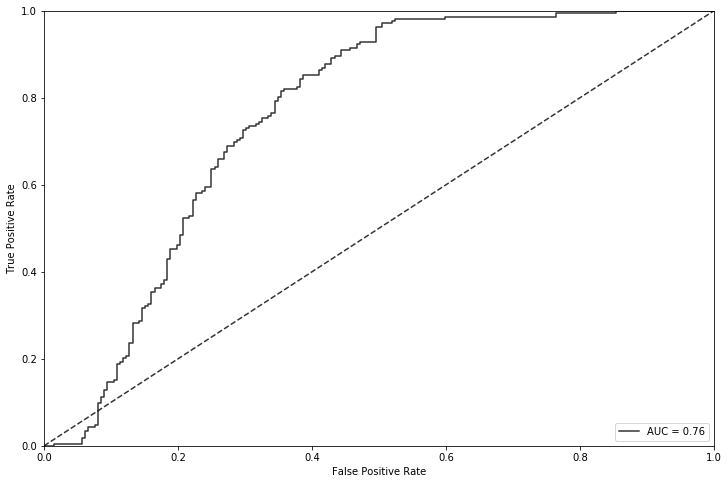

[0.02974444 0.2499464  0.27404467 0.03689389 0.08494031 0.05585732
 0.03906496 0.03445096 0.03090264 0.0221274  0.03207468 0.052359
 0.05759334]


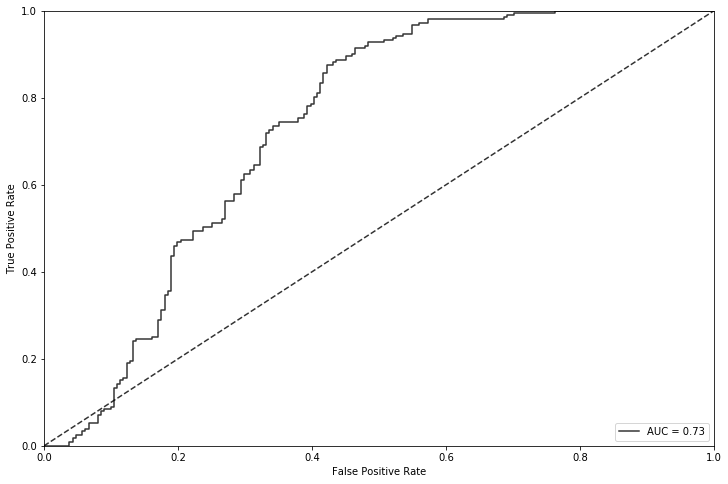

[0.02199296 0.23726087 0.28139514 0.02820407 0.08969795 0.04979111
 0.04778505 0.05574256 0.03161502 0.03250268 0.02439916 0.06171391
 0.03789953]


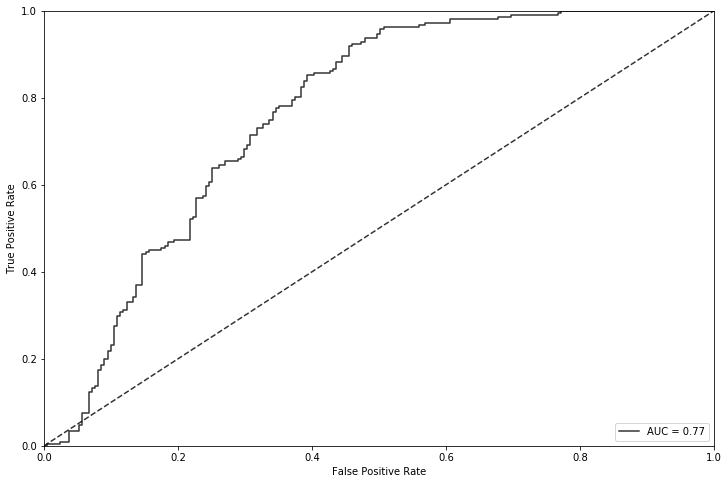

[0.02846781 0.23559878 0.25662313 0.05822644 0.08656196 0.04117418
 0.04066247 0.03942099 0.03389862 0.02245816 0.02469055 0.08416096
 0.04805595]


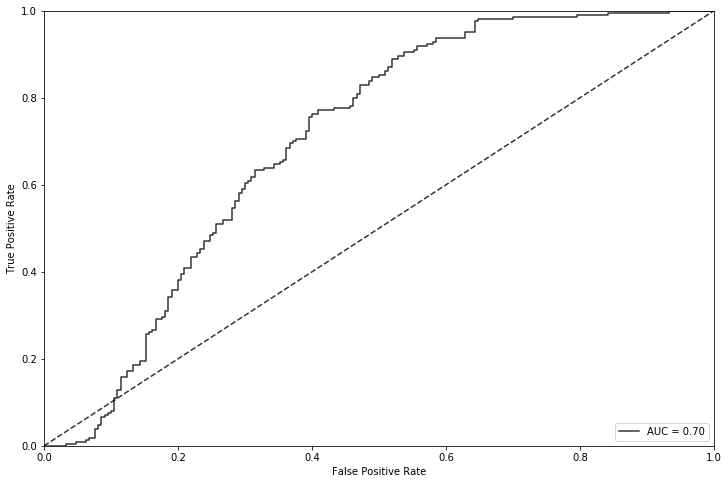

[0.04098586 0.20753259 0.29525478 0.08584037 0.08619324 0.03455975
 0.03335949 0.03582298 0.02465772 0.02218982 0.03754335 0.05926402
 0.03679604]


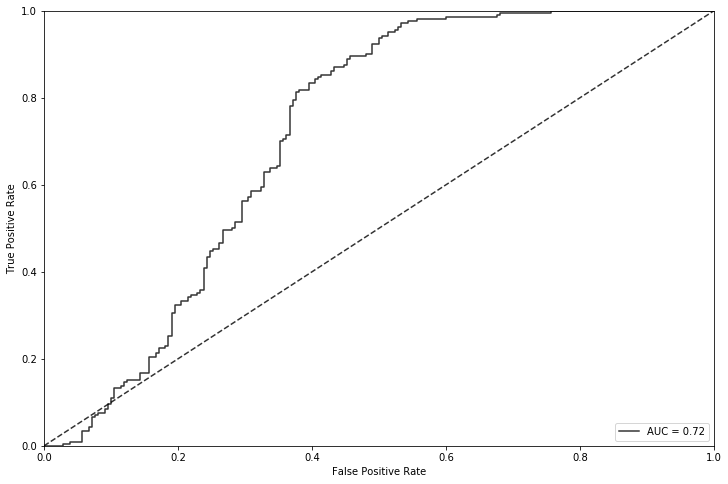

[0.01697301 0.25010917 0.21480644 0.03188565 0.09629224 0.04965936
 0.04587417 0.03883988 0.03851372 0.02632819 0.03345809 0.08628398
 0.0709761 ]


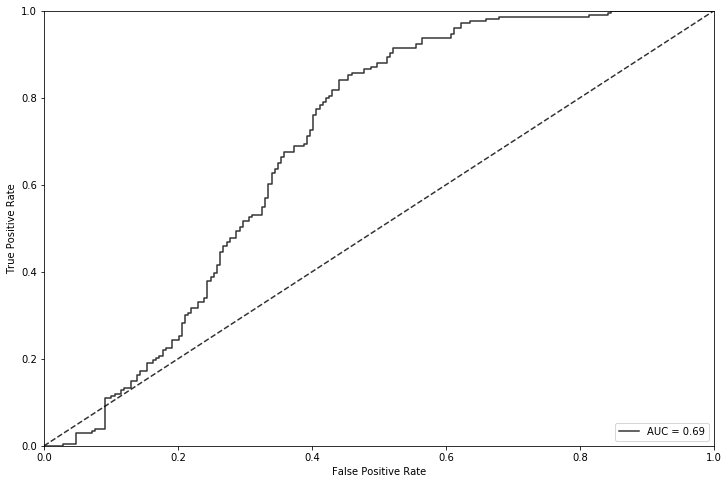

[0.03071967 0.19178377 0.28591909 0.09366726 0.08666928 0.04065076
 0.03091683 0.046914   0.03218786 0.02332327 0.03578492 0.06440826
 0.03705503]


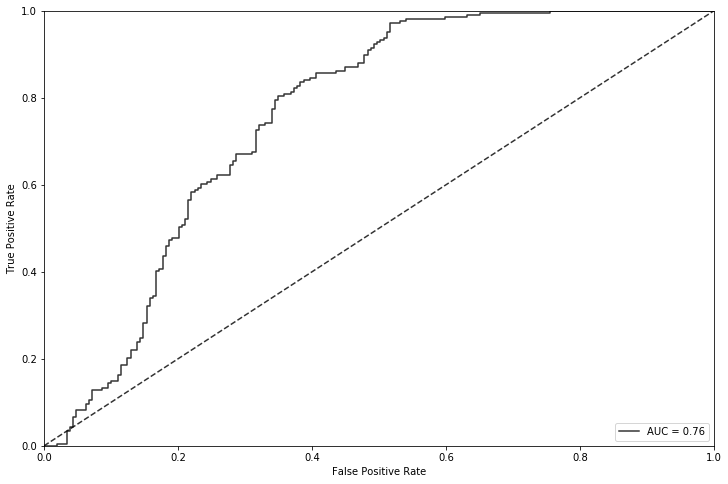

[0.01831108 0.27285251 0.2583868  0.05819322 0.06000687 0.03948297
 0.05545363 0.03530319 0.03878397 0.02886528 0.02793382 0.0560587
 0.05036795]


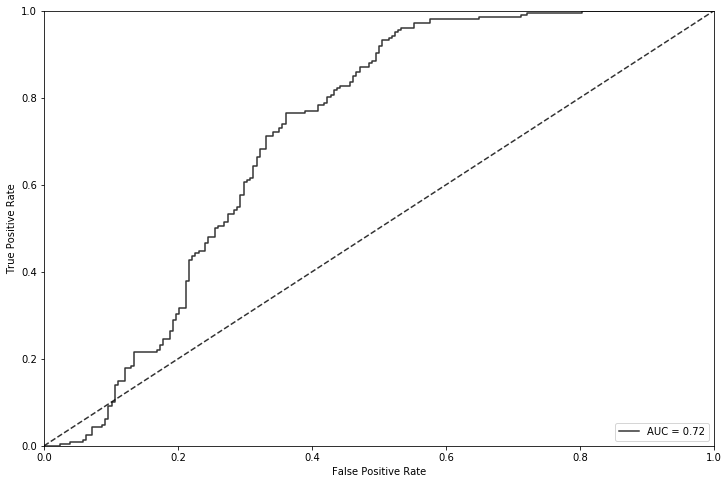

[0.02440469 0.2113689  0.33223036 0.07254355 0.08887853 0.03522158
 0.03356112 0.03346974 0.03809849 0.01930764 0.03214672 0.05223358
 0.02653512]


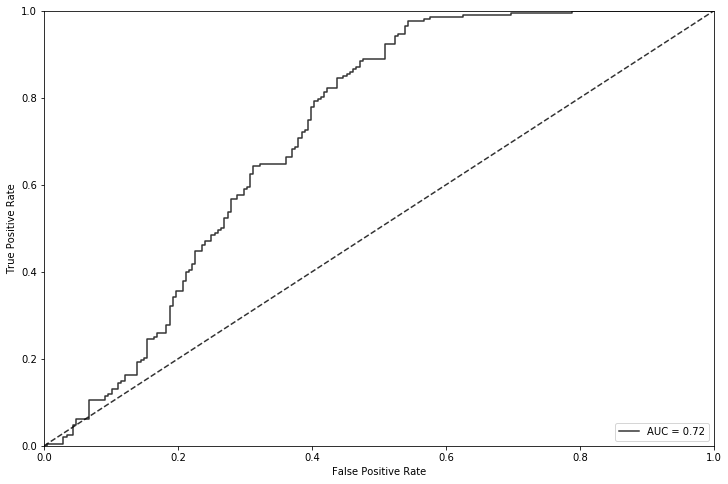

[0.01472505 0.17707965 0.26212974 0.10088979 0.09104254 0.05152676
 0.04551553 0.04335062 0.02787348 0.03058021 0.02872234 0.09334533
 0.03321896]


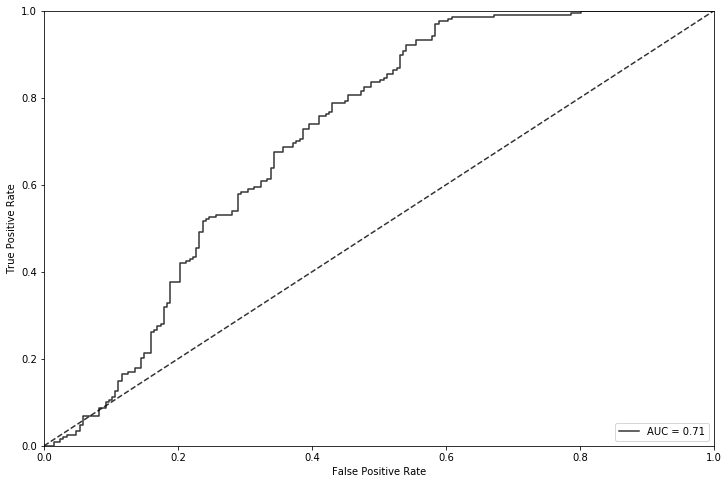

[0.03153193 0.23788687 0.27491605 0.05865026 0.06192777 0.03518021
 0.04325225 0.06297674 0.02373729 0.03064318 0.03360171 0.06660591
 0.03908983]


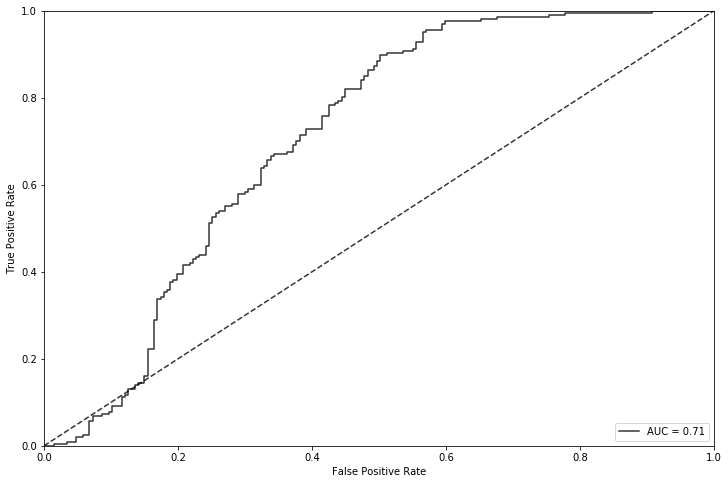

[0.01995281 0.25431874 0.23464915 0.06726487 0.09767438 0.07192896
 0.03176982 0.02689929 0.02769155 0.02444723 0.02432577 0.06783488
 0.05124254]


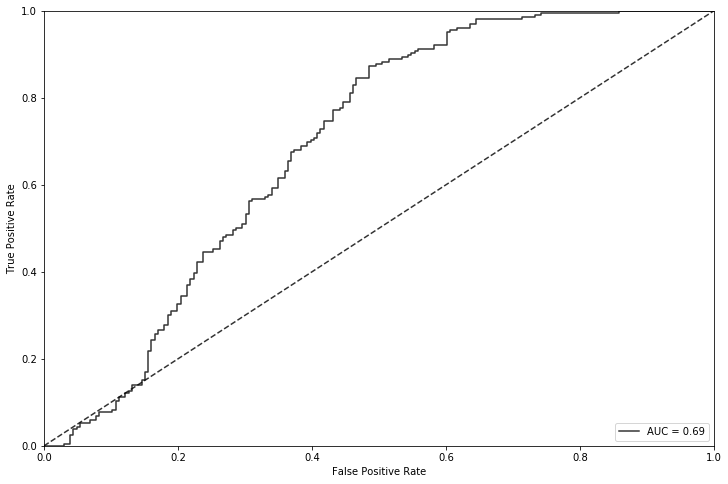

[0.04269911 0.21785764 0.29634732 0.02903498 0.07742263 0.05347332
 0.0392311  0.0468685  0.03188316 0.02402722 0.03562794 0.06118061
 0.04434647]


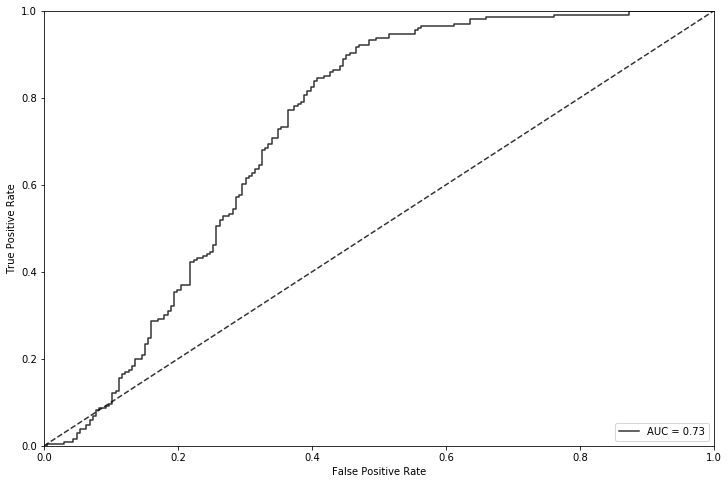

[0.03066193 0.26154863 0.22156179 0.06831629 0.11459209 0.0364947
 0.02845871 0.04531364 0.02837266 0.02855792 0.0525837  0.04375633
 0.03978162]


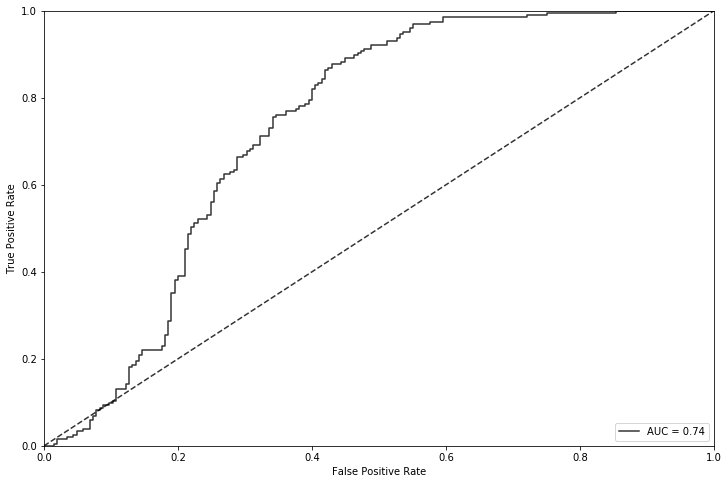

[0.02728604 0.26906641 0.27670532 0.04898959 0.06217033 0.05287687
 0.04338065 0.04603555 0.02493789 0.02638117 0.0162949  0.05475875
 0.05111653]


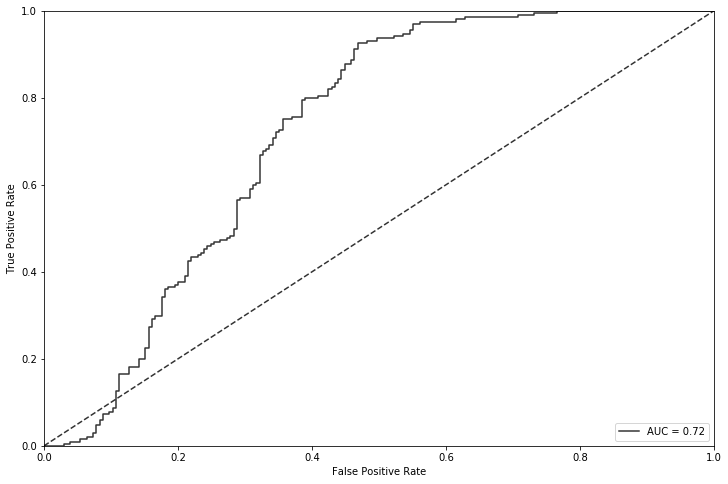

[0.03157761 0.2124576  0.3156491  0.0939047  0.05006537 0.0490627
 0.03151716 0.04737827 0.02551466 0.02259469 0.03016128 0.05952829
 0.03058858]


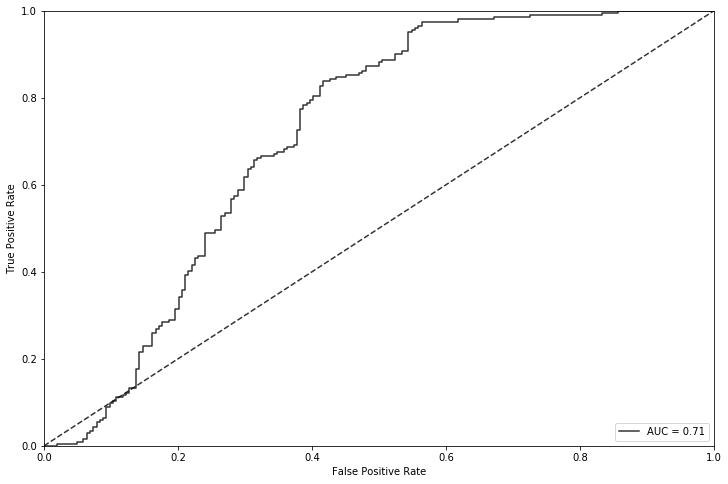

[0.02758604 0.22733575 0.32622849 0.06620401 0.05371679 0.04097032
 0.03026208 0.04007888 0.04150082 0.02631787 0.02173608 0.04681372
 0.05124915]


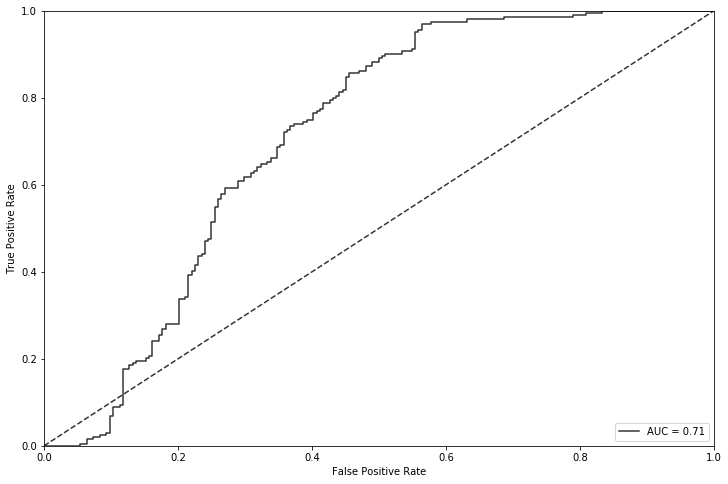

[0.03157992 0.25233354 0.3011142  0.07381805 0.0805868  0.04337587
 0.030063   0.02458548 0.02895477 0.02370525 0.02726433 0.05247151
 0.03014727]


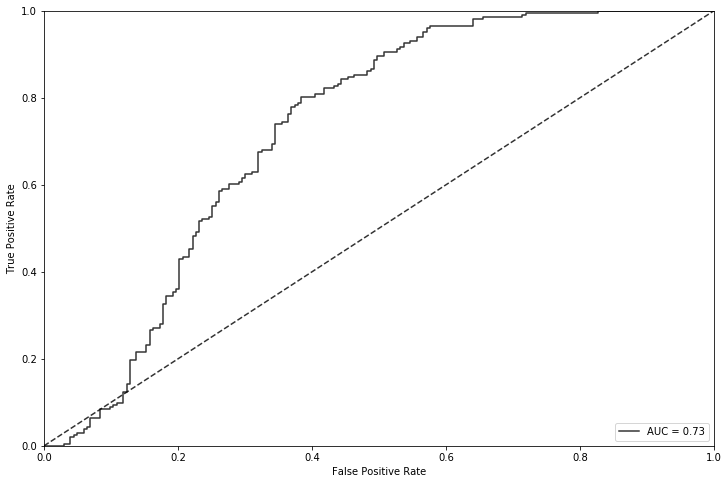

[0.0216569  0.24054402 0.26872654 0.07776382 0.07714723 0.03529027
 0.05804069 0.03195623 0.03464832 0.0194443  0.04153908 0.04530732
 0.04793528]


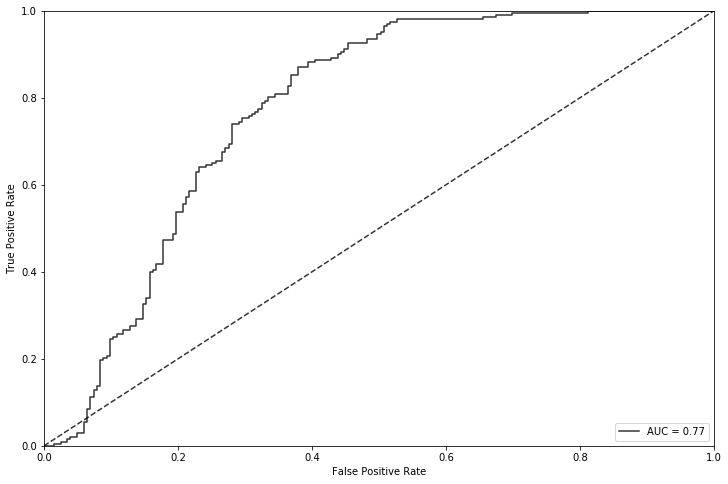

[0.03178036 0.25603323 0.27560784 0.0857852  0.07501199 0.0444965
 0.03822114 0.03819944 0.03061245 0.01586383 0.02609013 0.04630891
 0.03598898]


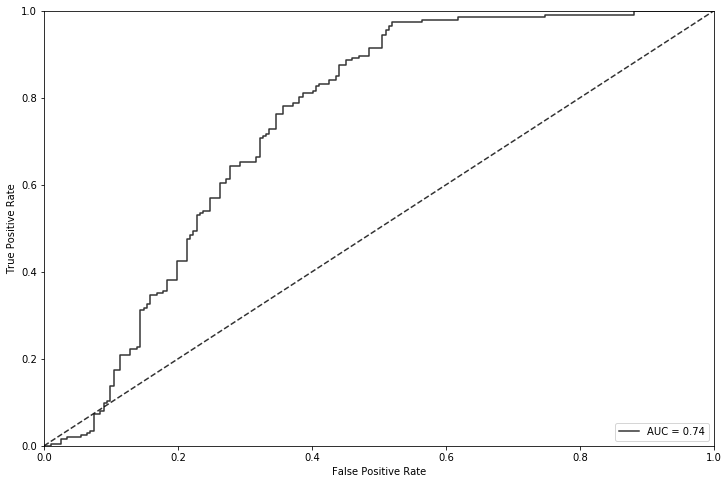

[0.03691097 0.28194324 0.25290468 0.03968735 0.07725117 0.03142683
 0.06762925 0.03910663 0.02094661 0.03180603 0.02936879 0.04458017
 0.04643827]


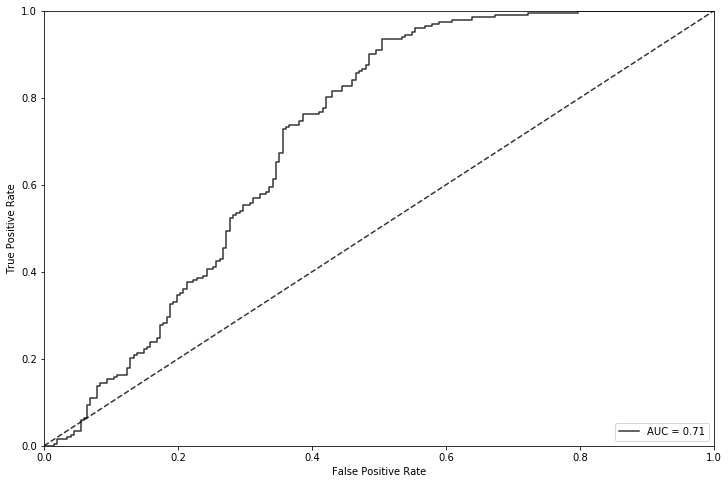

[0.03257493 0.21254271 0.35230856 0.06332016 0.06905649 0.02986212
 0.03592064 0.03272716 0.0286981  0.02153038 0.02505639 0.04504642
 0.05135594]


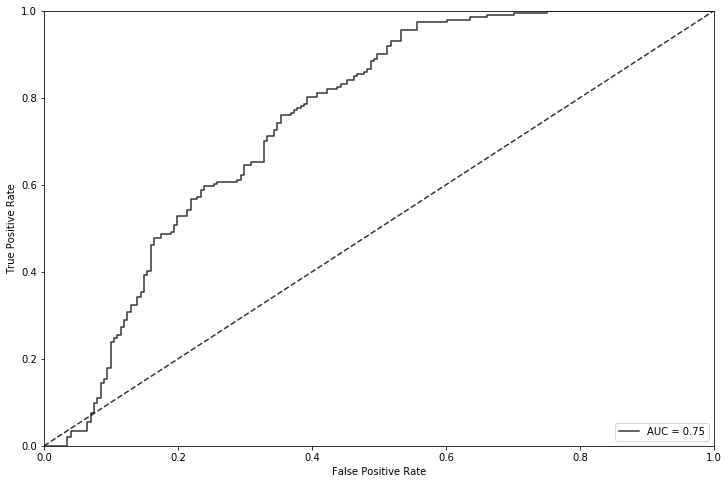

[0.02431053 0.23060025 0.29126867 0.06924697 0.08615196 0.03045647
 0.02604209 0.06180926 0.02798181 0.02413063 0.03190146 0.05573122
 0.04036868]


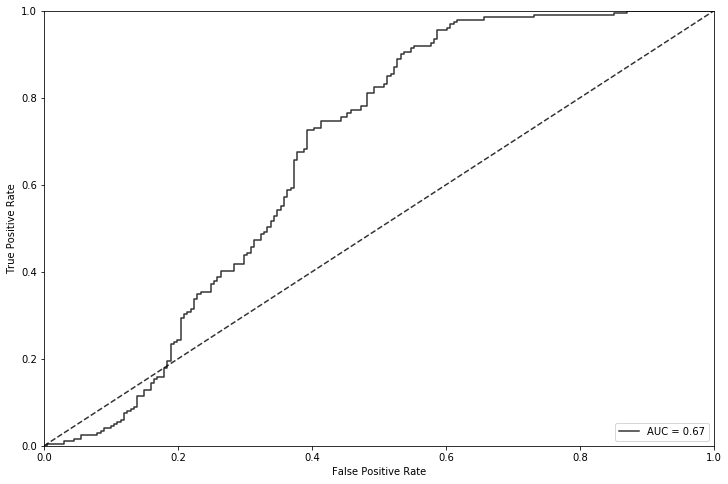

[0.01928576 0.23856866 0.25702265 0.05364746 0.04635764 0.05660028
 0.05473646 0.06798351 0.04316013 0.02716784 0.02733496 0.04386962
 0.06426504]


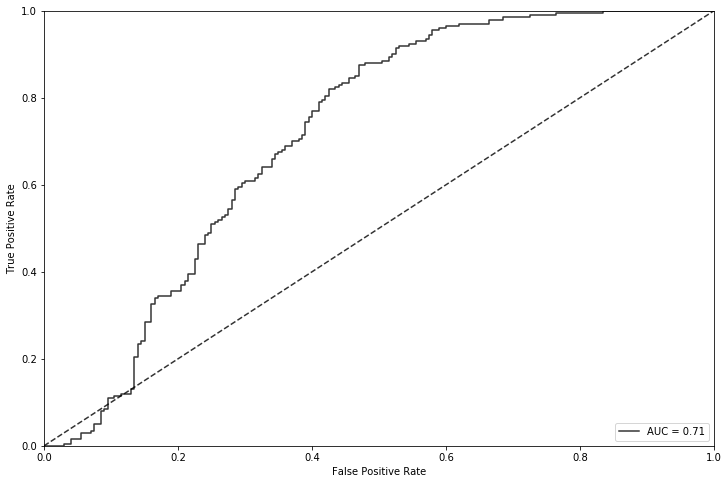

[0.02872361 0.23174958 0.25488604 0.06031494 0.10657618 0.04509805
 0.05333592 0.03705099 0.03820265 0.03034037 0.01570878 0.0667467
 0.03126618]


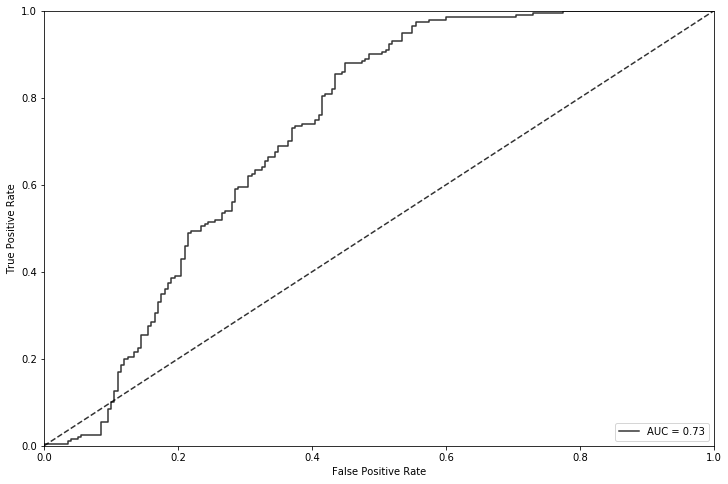

[0.02816942 0.22279247 0.27434536 0.05753125 0.09974776 0.04224135
 0.04278735 0.05273586 0.03745704 0.03013199 0.02573435 0.03822024
 0.04810556]


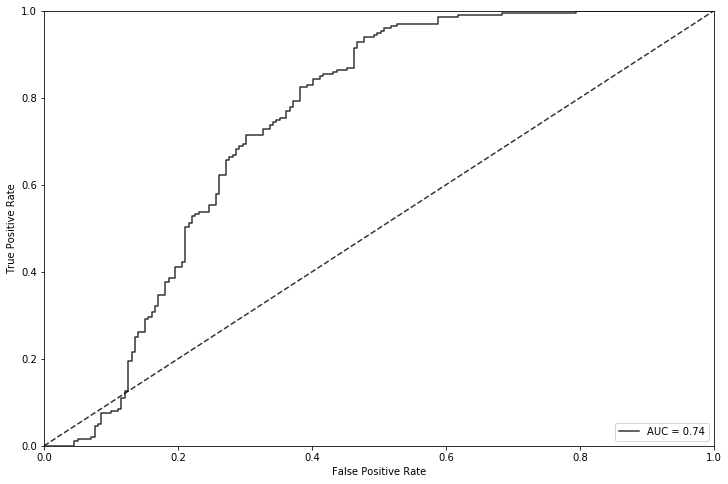

[0.02808756 0.25968567 0.26050329 0.06956987 0.08693554 0.03592183
 0.03523139 0.04042451 0.03205873 0.02301544 0.02812347 0.04704175
 0.05340096]


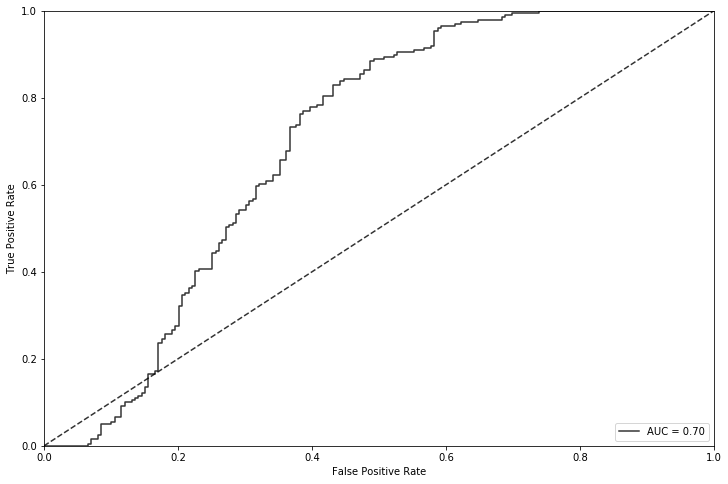

[0.03965081 0.25222829 0.28540466 0.0552384  0.07613122 0.03330157
 0.04345122 0.06266281 0.02781779 0.01970477 0.02307082 0.03937599
 0.04196164]


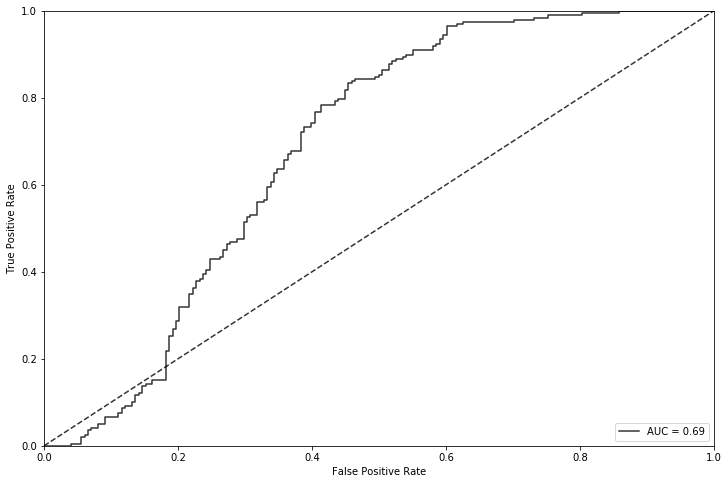

[0.02752308 0.19237609 0.30994443 0.07303531 0.11118321 0.02881829
 0.03765094 0.04529538 0.03462658 0.03272431 0.02403061 0.04939316
 0.03339861]


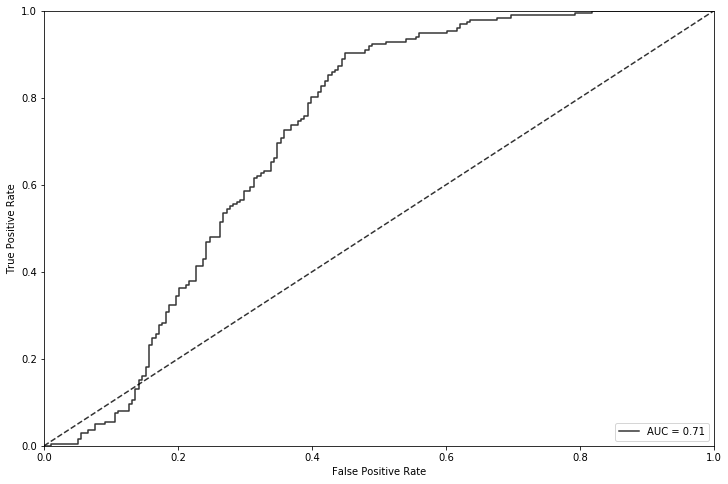

[0.02119679 0.28661425 0.24135942 0.04510274 0.0470209  0.05528558
 0.05863761 0.04977349 0.03981541 0.023713   0.01465383 0.0689357
 0.04789128]


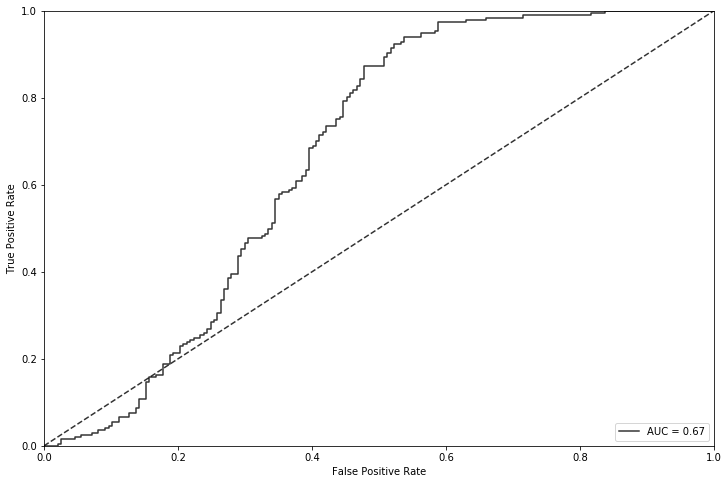

[0.01987008 0.25853154 0.31883535 0.04998617 0.06209902 0.03271668
 0.04016171 0.03198587 0.02738092 0.02508936 0.03779597 0.05373707
 0.04181024]


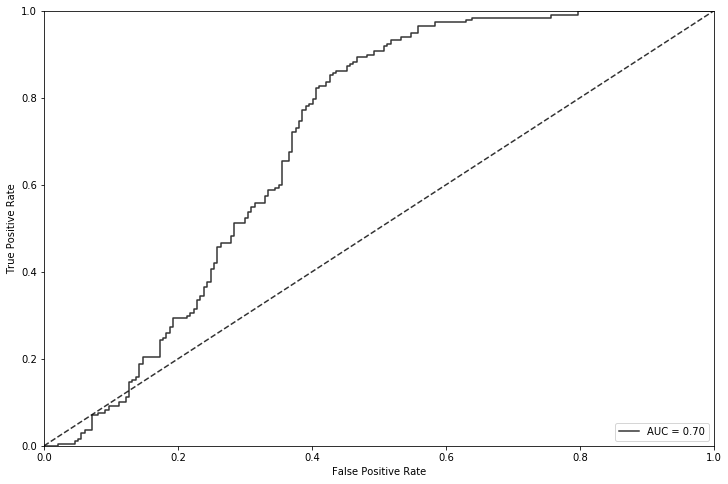

[0.0158409  0.17928314 0.36233892 0.03890571 0.04106784 0.06307763
 0.02716644 0.04367109 0.03629257 0.02765003 0.0184704  0.07077385
 0.07546146]


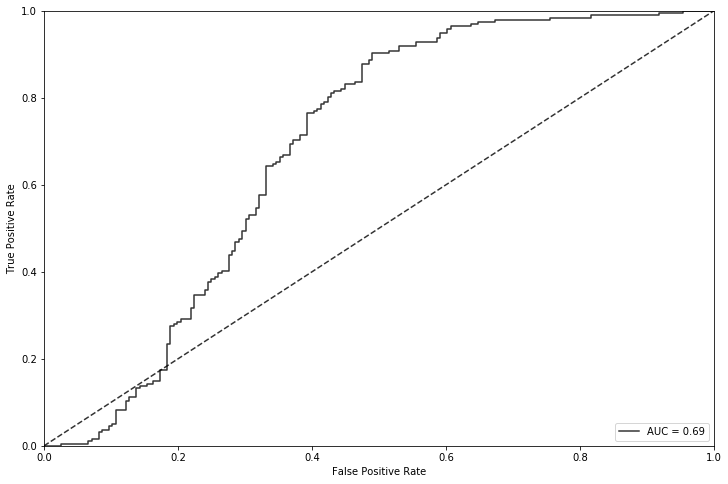

[0.02293586 0.20696324 0.26884354 0.09903209 0.07652784 0.04286772
 0.04249115 0.04295082 0.03273832 0.02417307 0.04240303 0.04716558
 0.05090773]


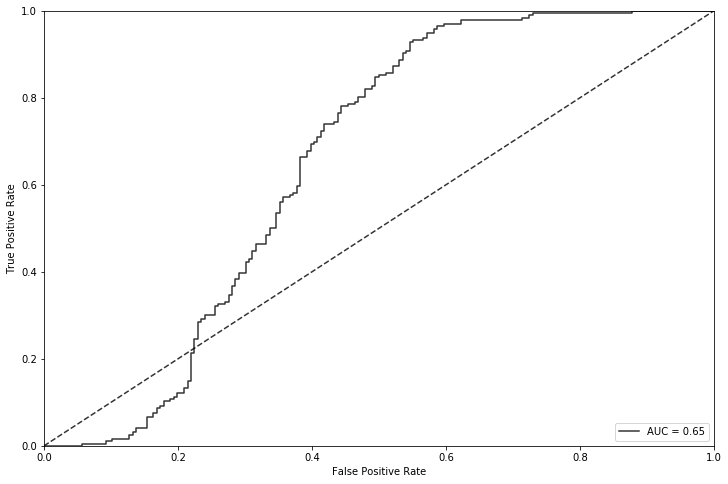

[0.01560332 0.26157413 0.32532892 0.0415253  0.05708699 0.07351004
 0.02900934 0.03861533 0.03139926 0.02591228 0.01715229 0.0378915
 0.0453913 ]


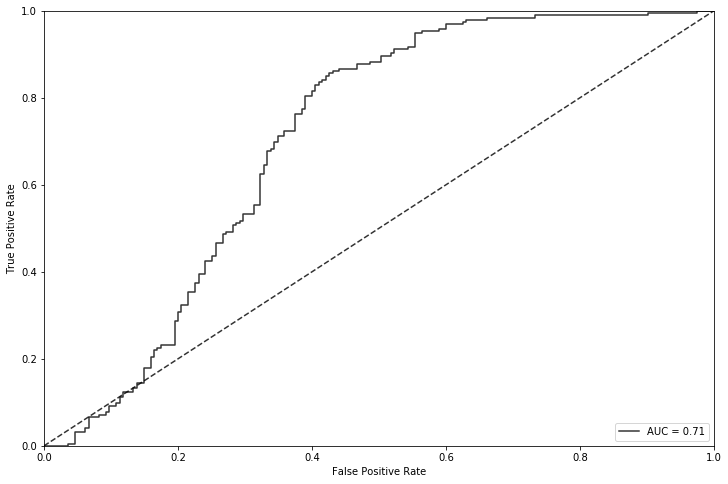

[0.03453296 0.27548171 0.2921558  0.04084041 0.07196849 0.02286635
 0.04074017 0.03327491 0.02464078 0.0373909  0.02790424 0.04066629
 0.05753698]


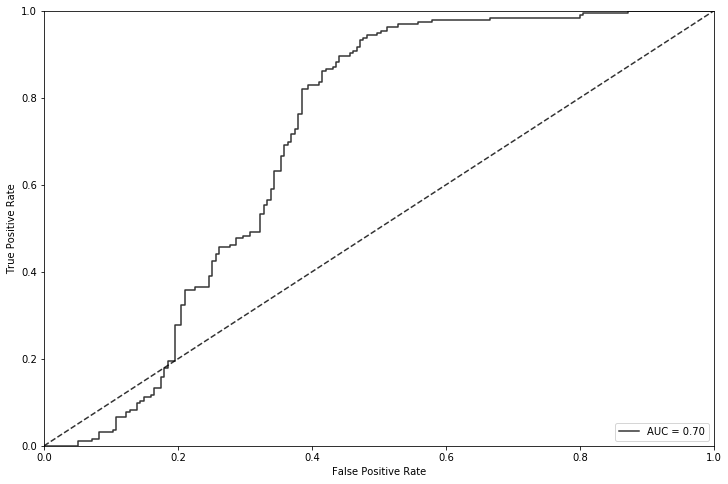

[0.02907378 0.24986845 0.25833256 0.08616953 0.04555361 0.03926844
 0.0433551  0.06687    0.02749795 0.02585748 0.01606778 0.06029829
 0.05178704]


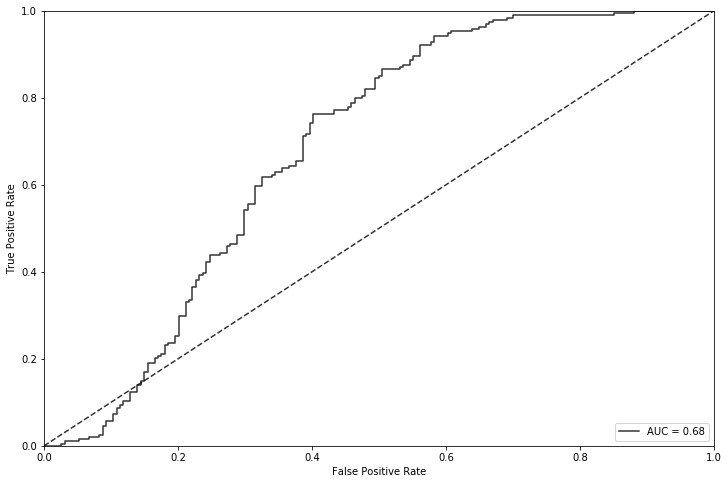

[0.01876363 0.22728157 0.32052158 0.06060488 0.08035672 0.02878842
 0.03470014 0.0296699  0.02565149 0.02635912 0.03372212 0.06101587
 0.05256457]


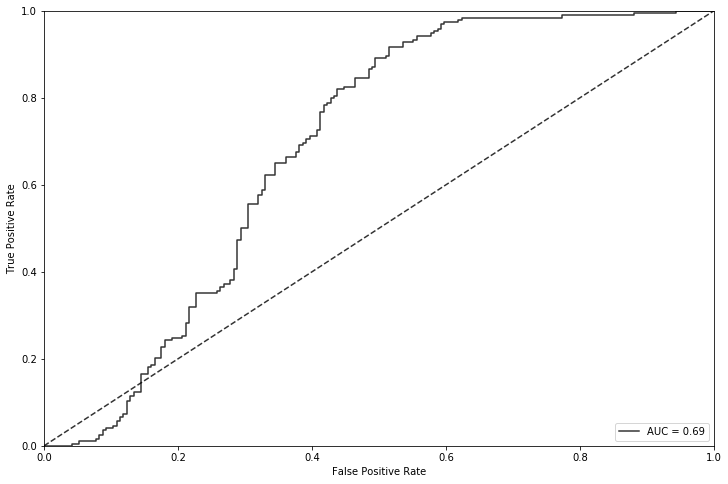

[0.01778094 0.19424447 0.31878482 0.09136562 0.0629281  0.04700442
 0.0446255  0.04408734 0.0313948  0.02129792 0.01724368 0.07048305
 0.03875934]


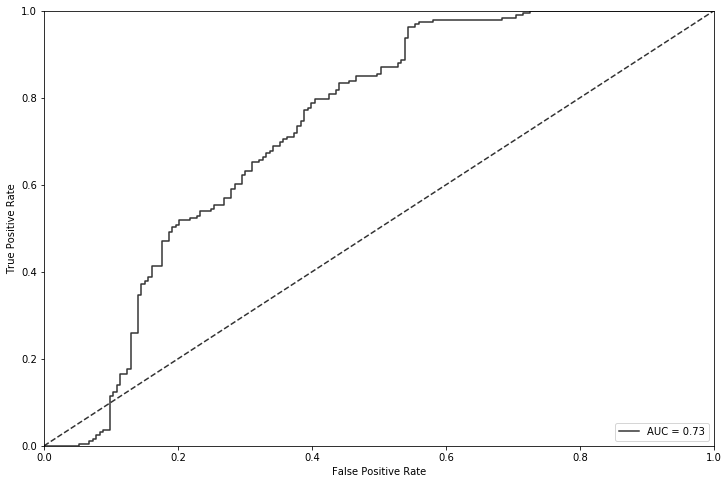

[0.01685676 0.25208953 0.29908602 0.033617   0.05672918 0.05875351
 0.03398159 0.04439704 0.02902556 0.0225225  0.03194489 0.05848322
 0.06251319]


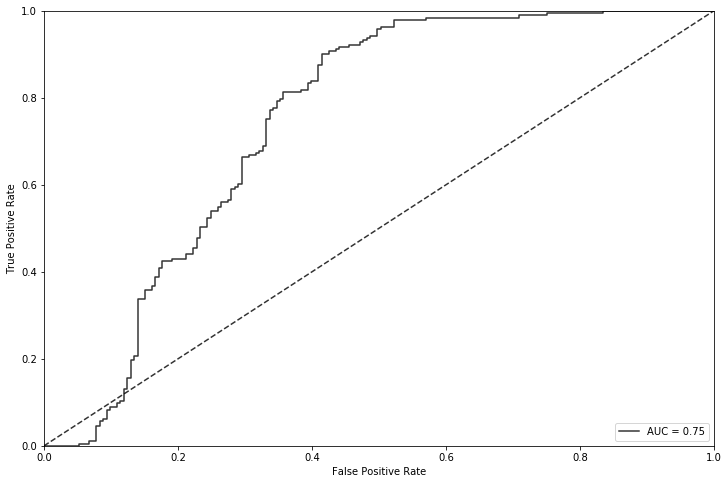

[0.0294693  0.28304607 0.27155386 0.05159139 0.05155148 0.04286988
 0.04185384 0.03925626 0.02656714 0.02623513 0.02351442 0.06533502
 0.04715619]


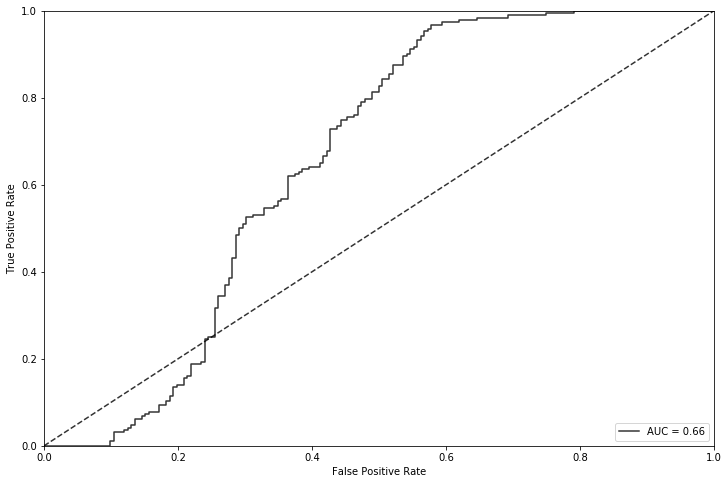

[0.03089123 0.21707387 0.25678758 0.04924045 0.110034   0.06702908
 0.03900063 0.04080481 0.02345963 0.03095915 0.03502195 0.03643027
 0.06326734]


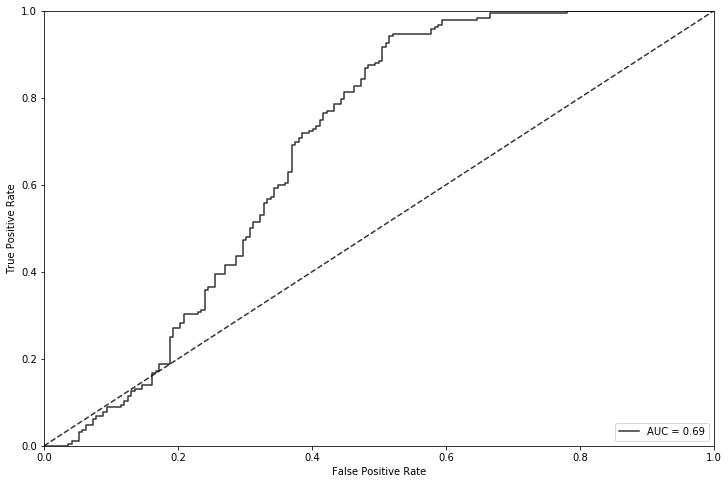

[0.02479918 0.22767329 0.33635196 0.0545359  0.08033873 0.0266572
 0.03212435 0.05519536 0.02184452 0.02931635 0.0315445  0.0438372
 0.03578148]


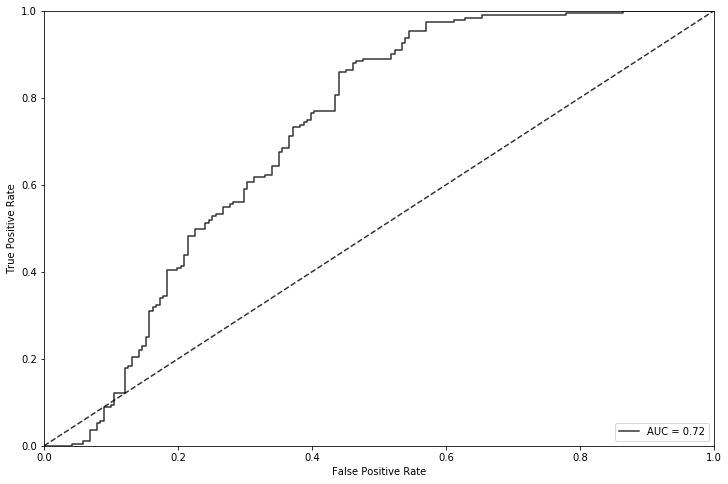

[0.02338765 0.27128341 0.2185983  0.05543926 0.08381627 0.03921337
 0.03619532 0.04329095 0.02676025 0.02832015 0.03034555 0.07292058
 0.07042894]


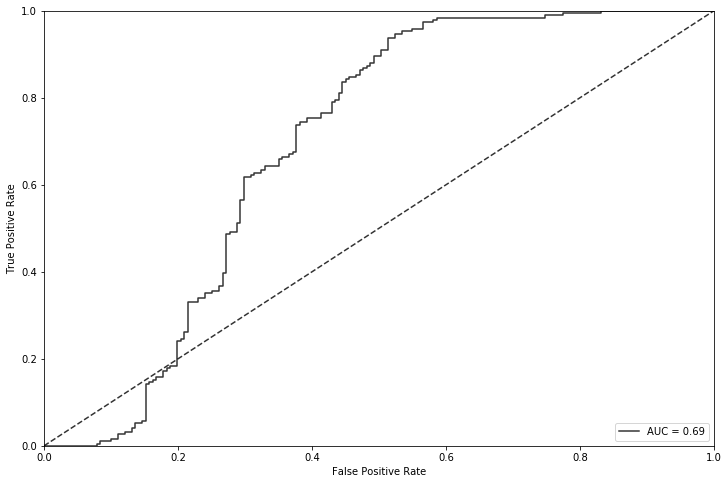

[0.02595764 0.26119028 0.26756736 0.06549124 0.07877292 0.04493877
 0.05827188 0.03102472 0.02996529 0.02580706 0.01675388 0.04586815
 0.04839081]


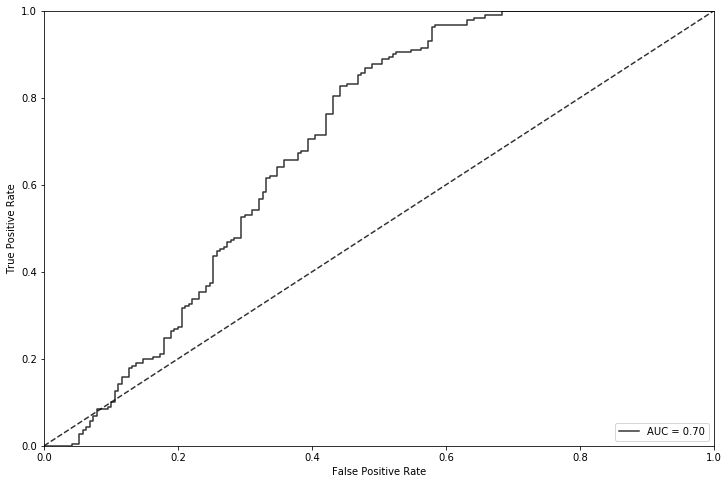

[0.02231542 0.21554458 0.2791505  0.02080418 0.09307555 0.04293775
 0.03866938 0.04626626 0.03189471 0.03026934 0.02627991 0.09724779
 0.05554464]


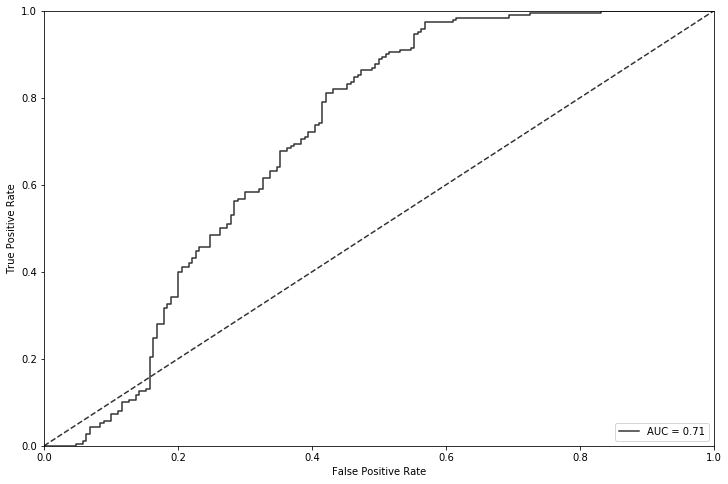

[0.0232286  0.2803309  0.27793664 0.02566098 0.06216789 0.03832171
 0.04740802 0.04830221 0.02548288 0.02209464 0.01945464 0.09354431
 0.03606657]


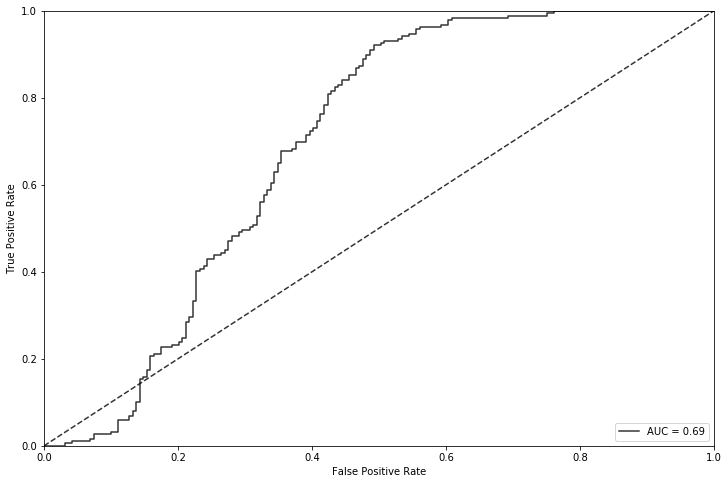

[0.0139971  0.20684894 0.3361966  0.07902484 0.04928959 0.03079827
 0.04498787 0.04038711 0.0282653  0.02642099 0.02268792 0.09221244
 0.02888303]


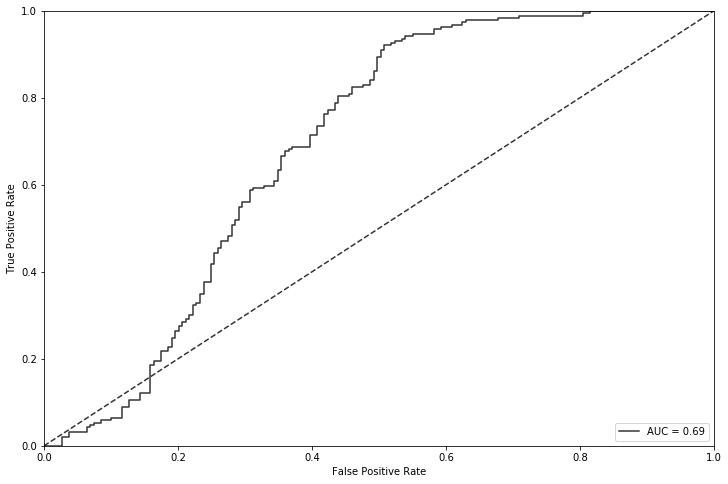

[0.0189577  0.24305109 0.2935951  0.03175086 0.08822249 0.04939156
 0.03854861 0.03660751 0.02852079 0.03182408 0.03779614 0.04457783
 0.05715624]


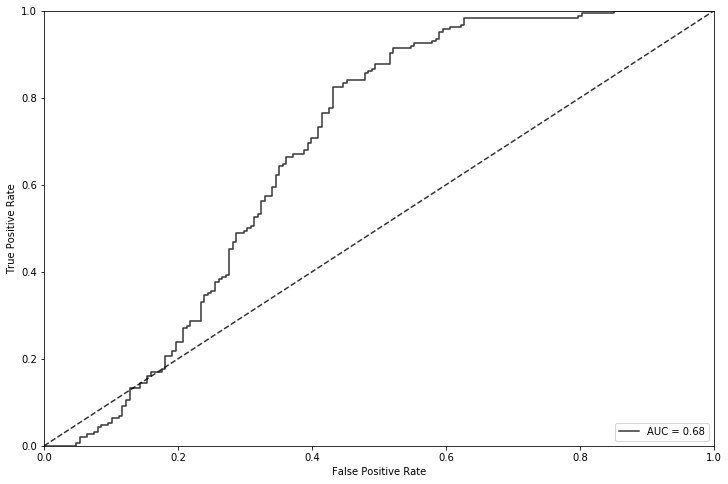

[0.04829216 0.26208696 0.31889729 0.06542341 0.04835371 0.02705214
 0.04065128 0.03771932 0.02984197 0.01975218 0.02225654 0.0410693
 0.03860373]


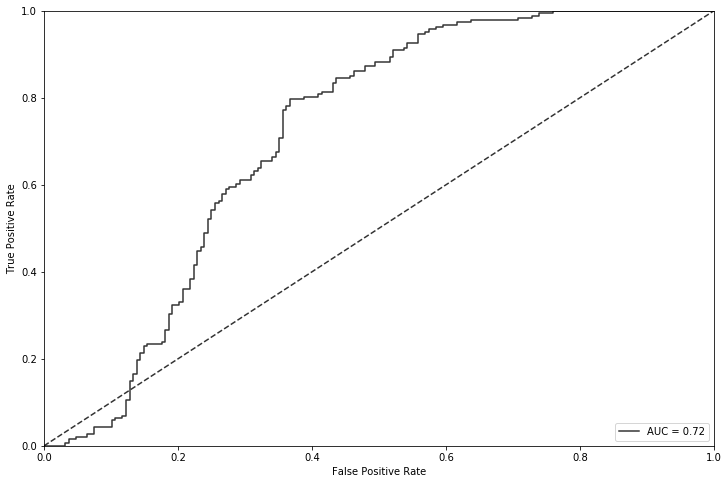

[0.01826745 0.2734287  0.26659221 0.03539176 0.09090083 0.02946549
 0.05059899 0.04544143 0.02936709 0.02922721 0.02313914 0.07433544
 0.03384427]


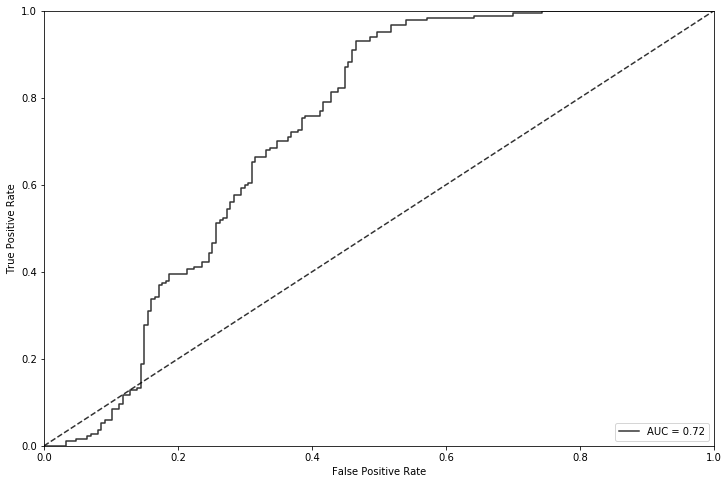

[0.04435513 0.23004608 0.30841924 0.02411292 0.06265061 0.04295945
 0.04242721 0.04385608 0.02485683 0.03369468 0.02671101 0.06093003
 0.05498075]


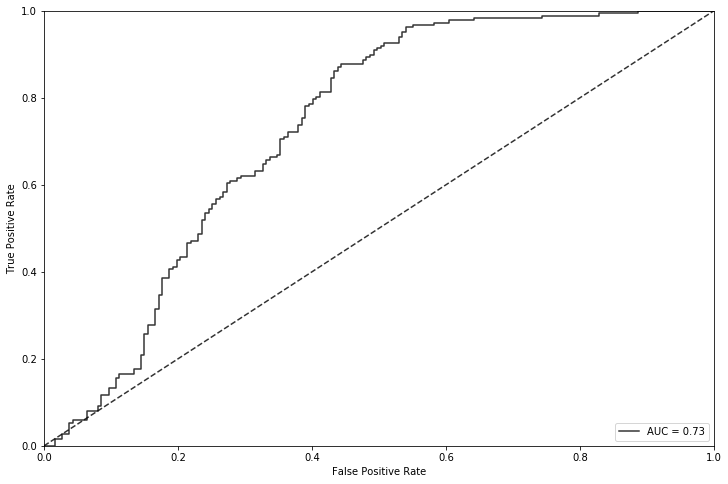

[0.02512879 0.23959227 0.30501569 0.03493152 0.0814268  0.03510137
 0.03509892 0.06035312 0.0265009  0.03325644 0.02320745 0.06929282
 0.03109391]


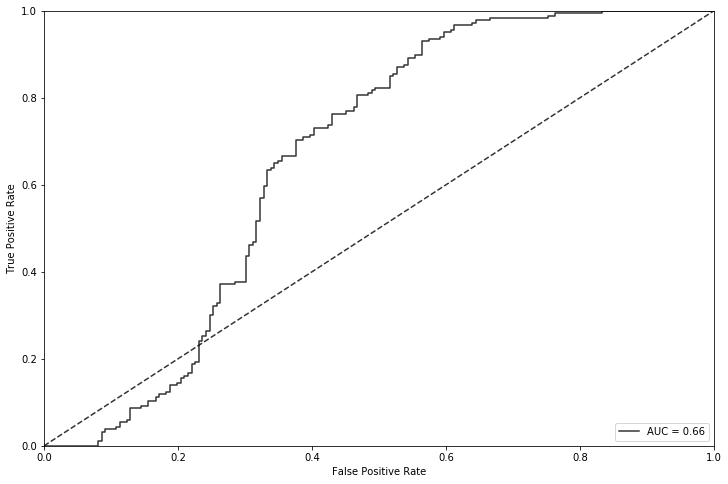

[0.01903265 0.21678677 0.31705271 0.02692679 0.10321602 0.04883014
 0.04521859 0.05837521 0.04342366 0.02320404 0.02606024 0.0472187
 0.02465447]


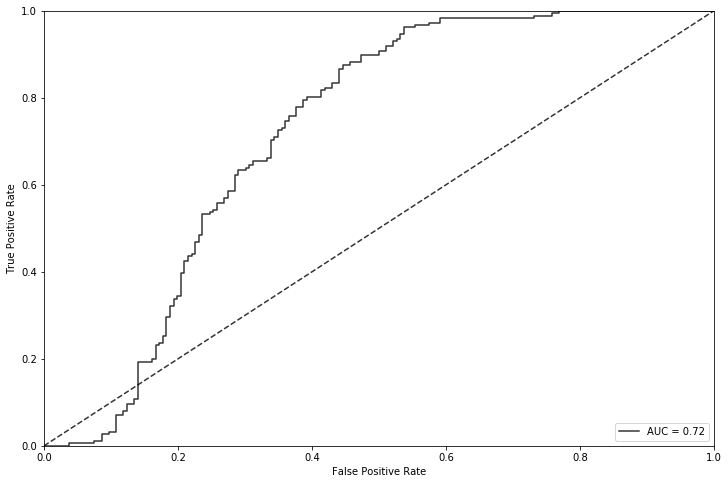

[0.02728646 0.32935041 0.19757051 0.03994665 0.07600981 0.04073695
 0.03849245 0.04299419 0.04085377 0.02008748 0.02190963 0.0814978
 0.04326388]


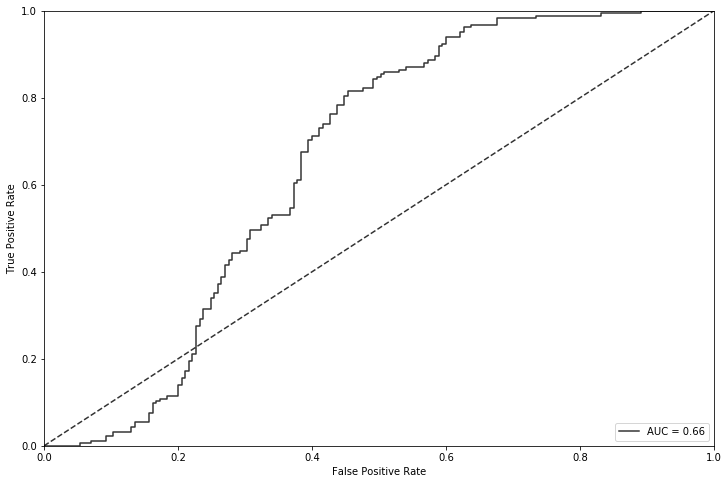

[0.02130291 0.23839134 0.26499014 0.03409429 0.07262512 0.04345555
 0.04162436 0.04474904 0.03015646 0.02753391 0.03985634 0.09090068
 0.05031986]


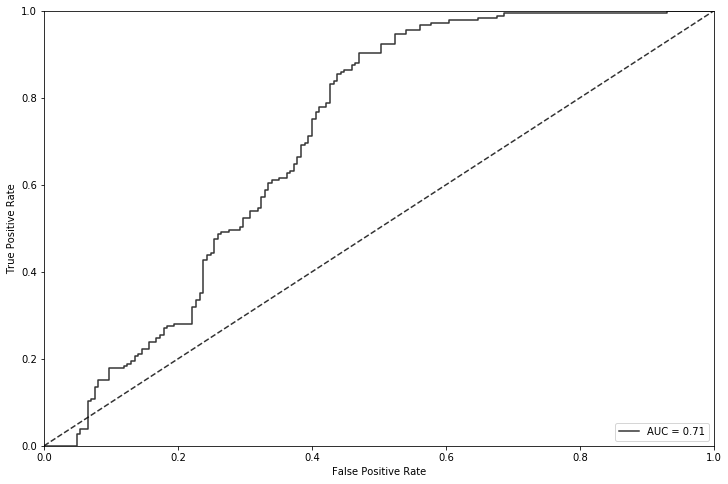

[0.02540545 0.21208227 0.27046764 0.05917373 0.08765278 0.04401549
 0.04458527 0.03159468 0.03390368 0.03068998 0.02398538 0.09740714
 0.03903652]


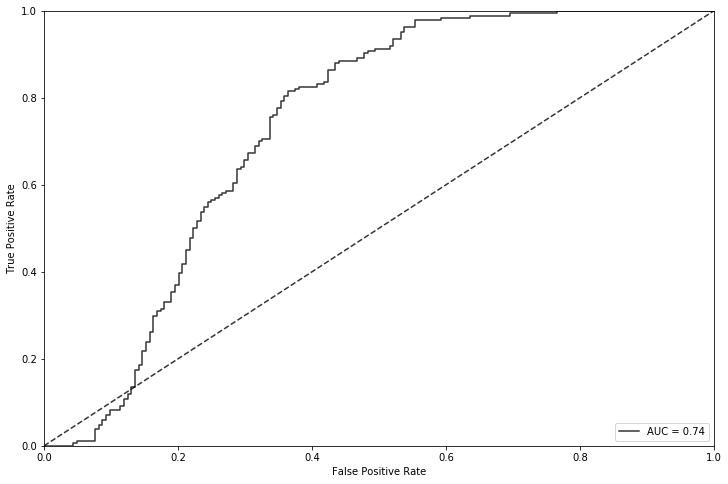

[0.01569158 0.2337435  0.28922667 0.03541811 0.11756504 0.06032593
 0.03966521 0.04015807 0.02872047 0.02427028 0.02653394 0.05894946
 0.02973174]


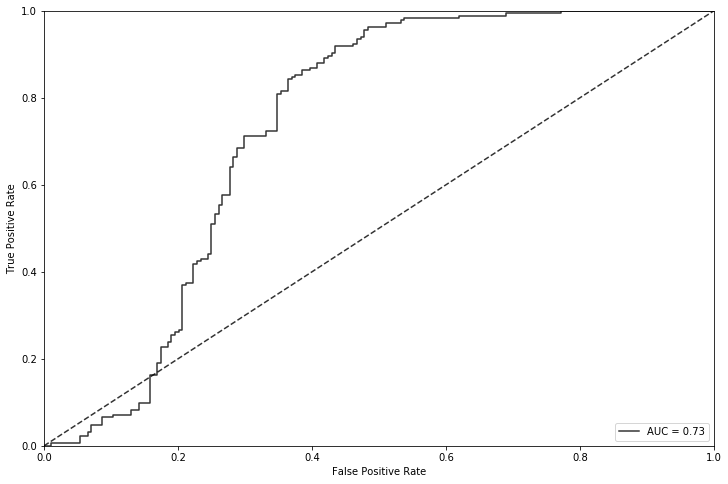

[0.02417972 0.19357059 0.25262261 0.05739031 0.06647636 0.0706244
 0.0457863  0.04159495 0.04067048 0.03007253 0.02115722 0.07043148
 0.08542304]


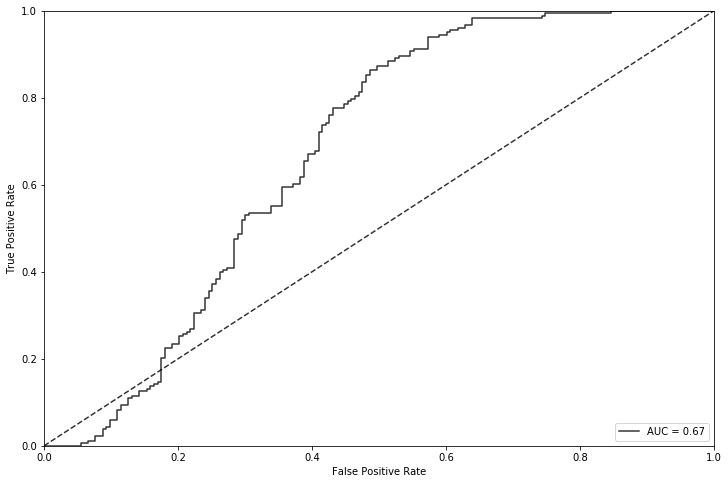

[0.04374287 0.24621424 0.2060203  0.08368782 0.08513037 0.03939081
 0.03658474 0.04355911 0.03450911 0.02615757 0.04438496 0.0652632
 0.04535489]


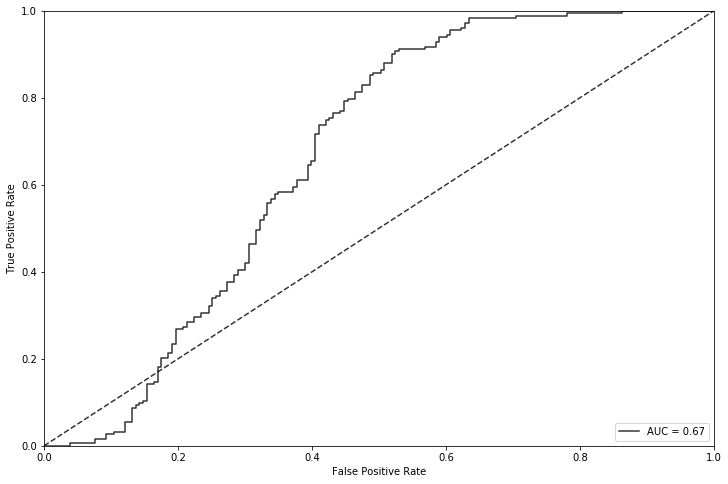

[0.02613394 0.26004123 0.21410943 0.10289023 0.07458126 0.03631439
 0.03591743 0.0367203  0.03076062 0.03568058 0.01743668 0.06768803
 0.06172589]


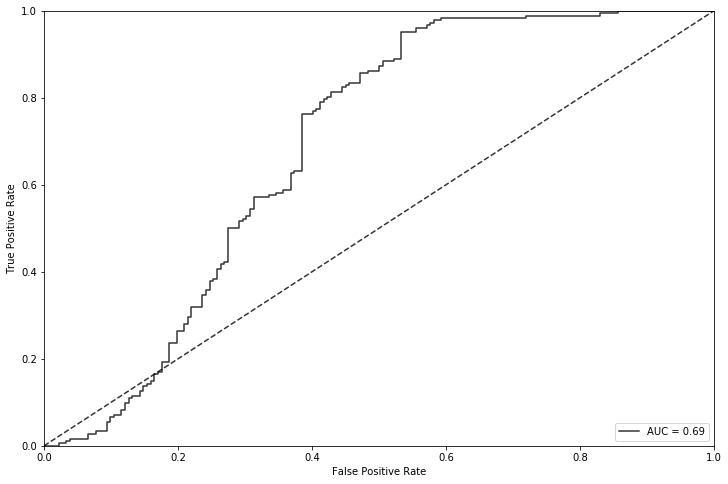

[0.01903733 0.28321554 0.25521935 0.03152005 0.06428499 0.04127439
 0.03801216 0.04505991 0.03496969 0.02786605 0.03843704 0.08413357
 0.03696992]


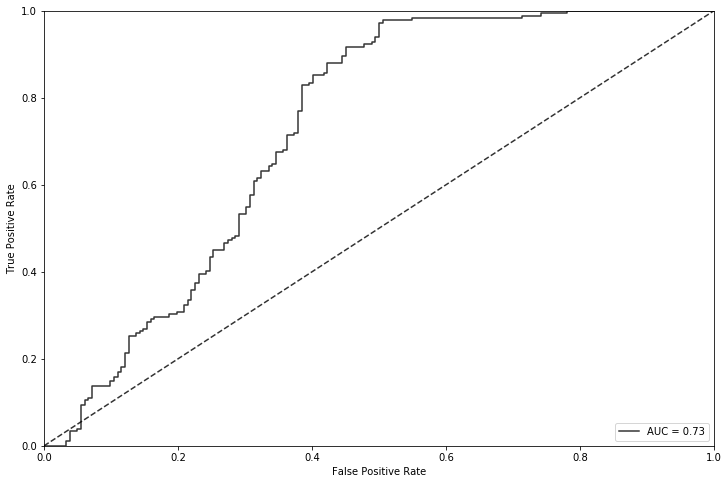

[0.04476092 0.23373529 0.26625308 0.03642786 0.07881956 0.02903478
 0.03437077 0.06058324 0.03928876 0.03140819 0.03640547 0.06234617
 0.0465659 ]


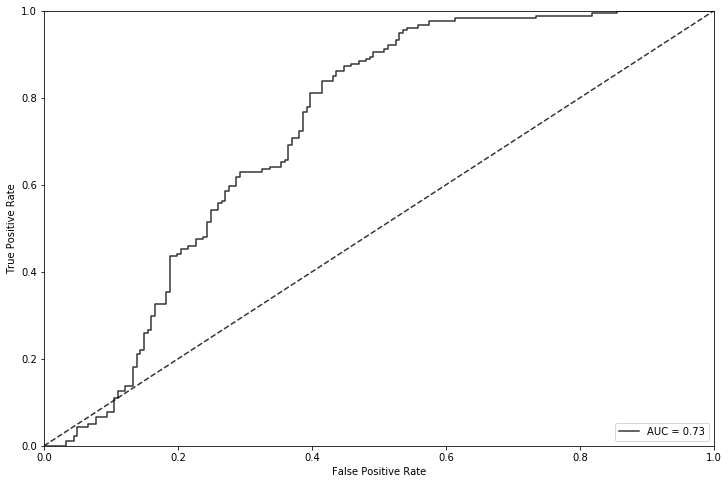

[0.0408725  0.24607287 0.26490509 0.04555166 0.06652336 0.03602674
 0.03480646 0.06374409 0.03633535 0.04287133 0.02666951 0.03778972
 0.05783132]


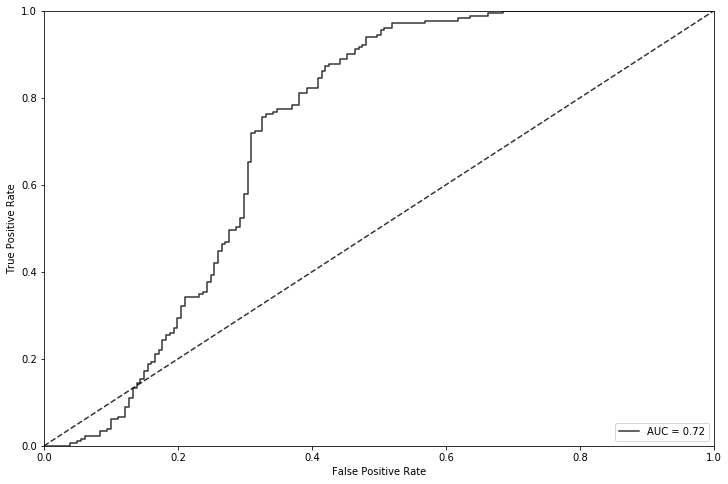

[0.01926631 0.23965054 0.30236207 0.08963286 0.05386401 0.05287828
 0.02708995 0.0342451  0.03384808 0.01915288 0.0283226  0.06020692
 0.03948039]


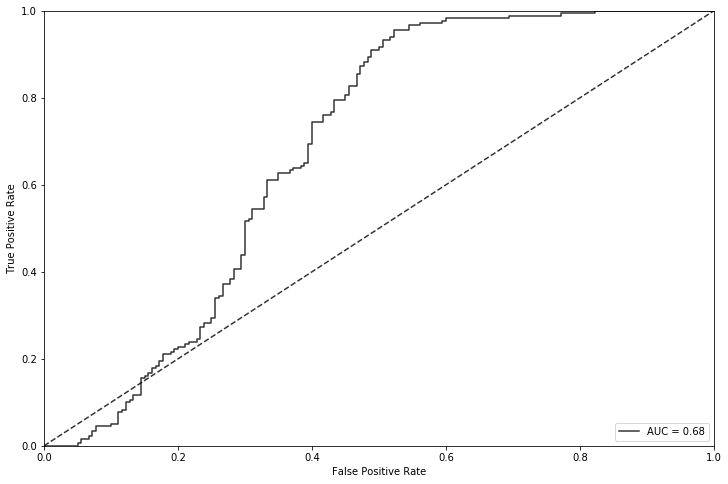

[0.02479554 0.22337493 0.31140914 0.03595381 0.07973806 0.03021368
 0.03259441 0.05736173 0.03622012 0.02182983 0.02803307 0.06844017
 0.05003552]


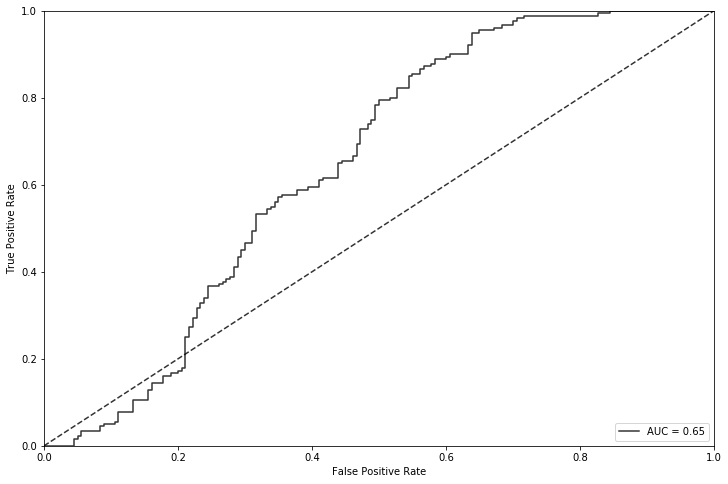

[0.02647118 0.22665355 0.30529968 0.02294119 0.0997962  0.03064651
 0.03122377 0.0486506  0.04167403 0.02335461 0.02322995 0.08417428
 0.03588445]


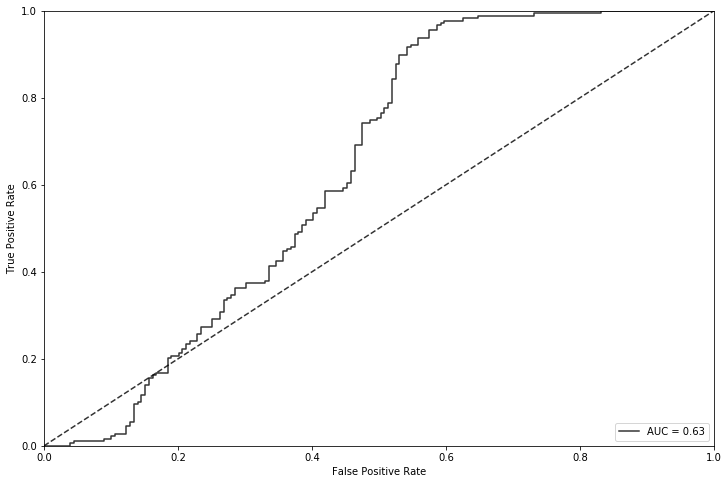

[0.01613062 0.25093615 0.24902009 0.03233634 0.11385731 0.06600807
 0.04932767 0.03503323 0.03475246 0.02650127 0.02351212 0.06145386
 0.0411308 ]


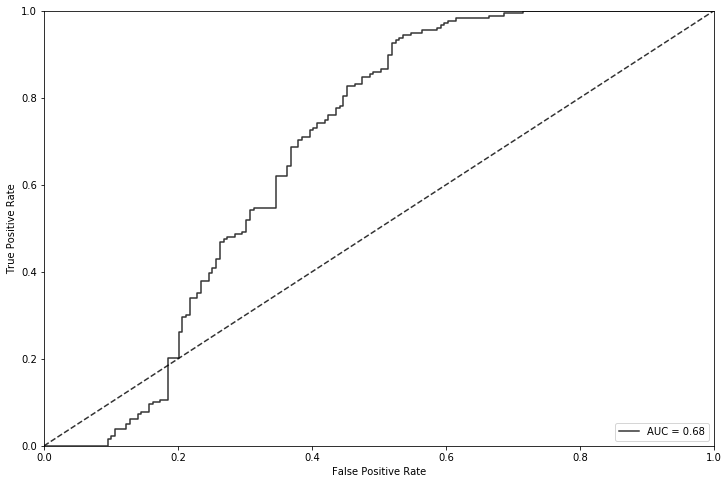

[0.04175003 0.25560078 0.26291649 0.07910556 0.09812902 0.04221114
 0.03361899 0.03234448 0.02693115 0.02697999 0.03569663 0.0355307
 0.02918503]


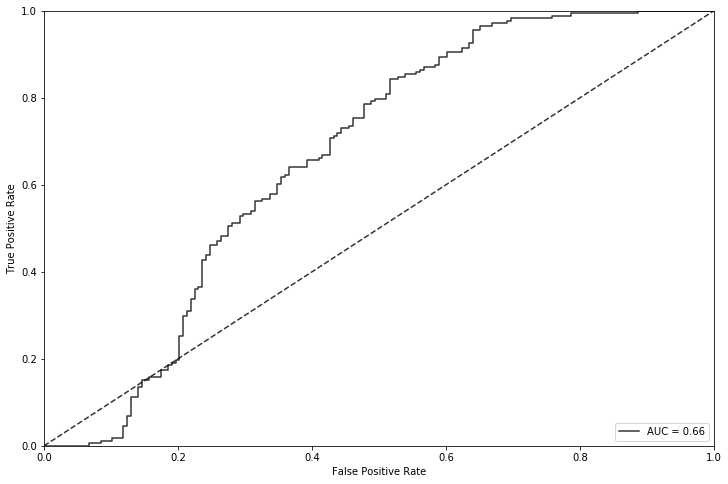

[0.02604497 0.19870284 0.22775546 0.05371305 0.09505228 0.05109429
 0.04257702 0.04978254 0.02953469 0.02477518 0.0240527  0.091942
 0.08497297]


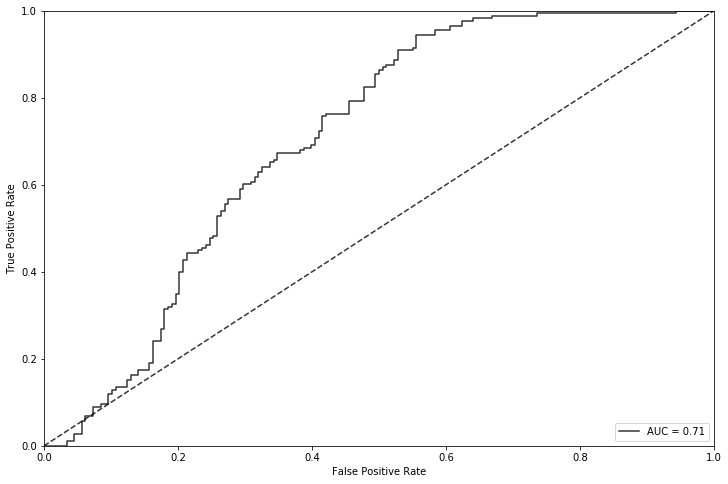

[0.03400965 0.24590404 0.31054487 0.02527226 0.07970689 0.03630965
 0.03084405 0.0624452  0.0272712  0.02427505 0.02547563 0.05254026
 0.04540127]


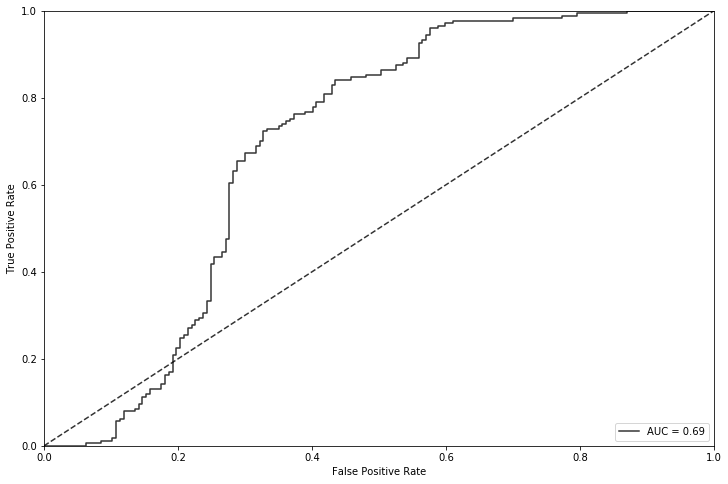

[0.02635272 0.2566431  0.29387373 0.02273394 0.05356522 0.05209421
 0.05211813 0.03314563 0.02541692 0.03584354 0.05468749 0.03888918
 0.05463619]


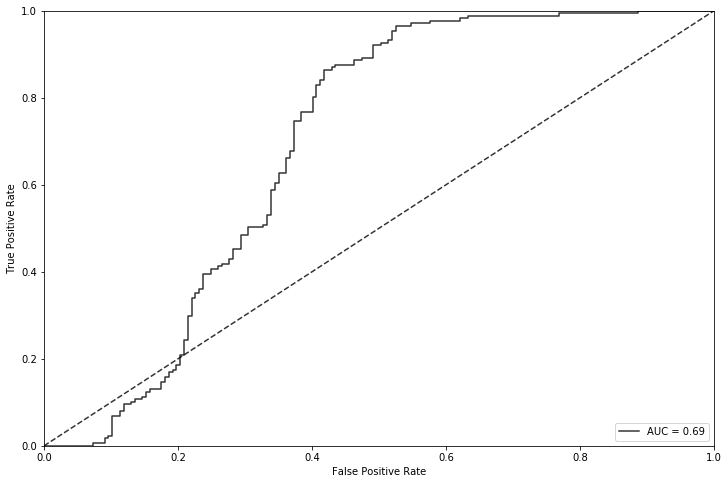

[0.02483318 0.25526857 0.27594029 0.03126198 0.04713396 0.04128252
 0.04431624 0.0553653  0.03071504 0.02966421 0.01798777 0.10724208
 0.03898888]


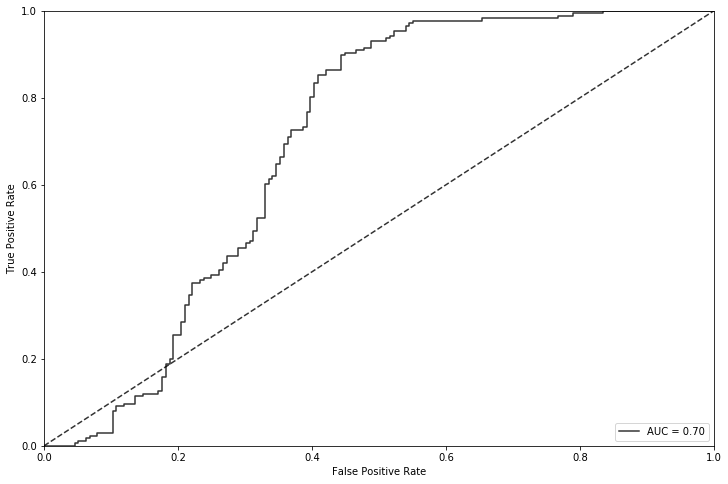

[0.02892427 0.31885672 0.25149409 0.0478683  0.07878773 0.04739677
 0.02869652 0.04197804 0.02565139 0.02152588 0.01764777 0.0581302
 0.03304232]


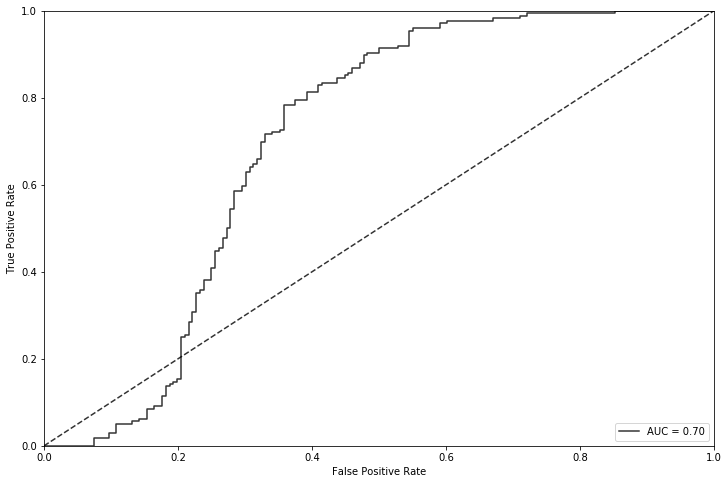

[0.04796534 0.27735864 0.27799881 0.04215479 0.05715707 0.04715703
 0.04072022 0.02884425 0.03809044 0.02189112 0.03023975 0.05403881
 0.03638374]


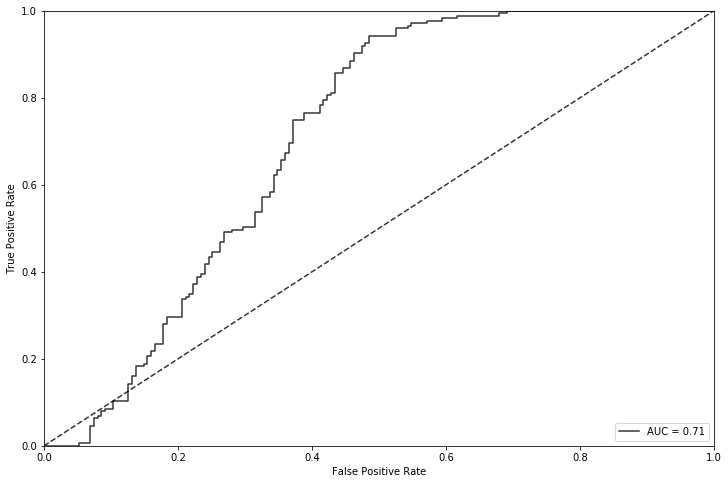

[0.0290955  0.21532389 0.24791988 0.04444064 0.07948164 0.06226593
 0.06486817 0.03328741 0.03013194 0.03044731 0.02503993 0.0737078
 0.06398995]


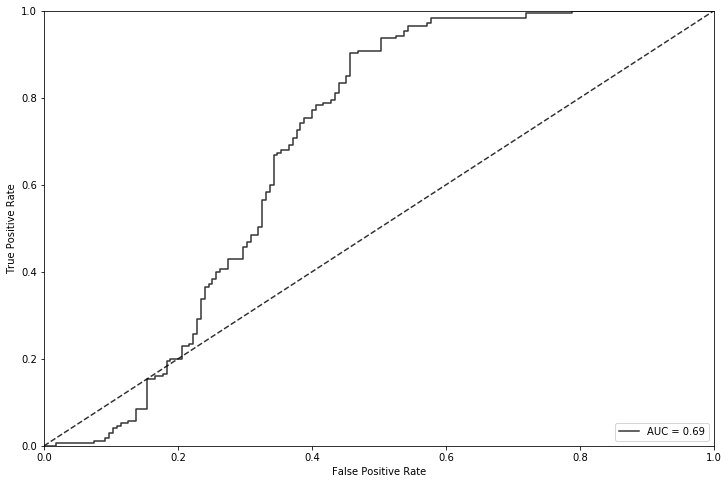

[0.03131999 0.2743185  0.2812596  0.0273985  0.05940999 0.0490478
 0.0437412  0.03437099 0.04486142 0.0343093  0.02472349 0.05675261
 0.03848662]


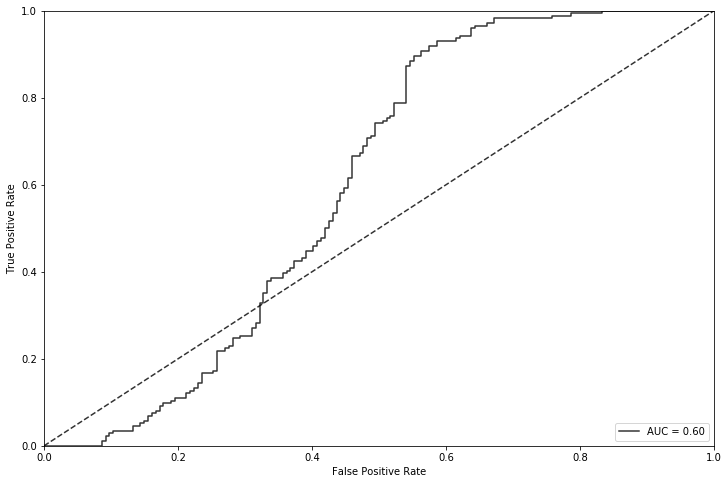

[0.04464627 0.24154704 0.23929138 0.02288872 0.05759092 0.05930554
 0.05245417 0.03880555 0.02956517 0.03193974 0.04363753 0.06400763
 0.07432034]


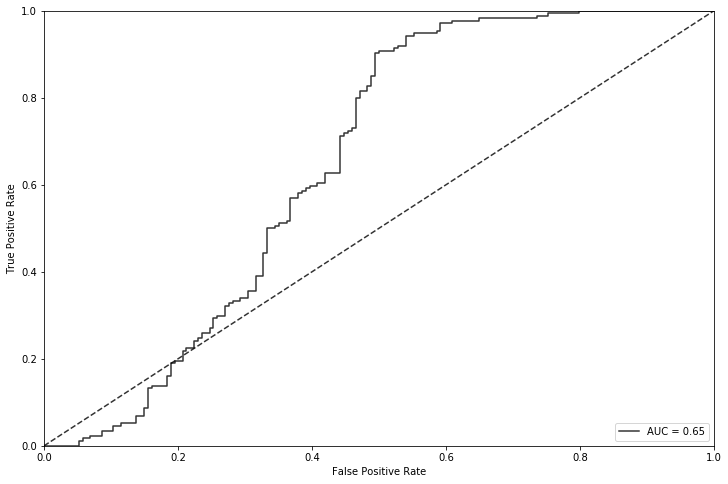

[0.01441167 0.23718722 0.27188968 0.04553546 0.0770899  0.04513717
 0.06118408 0.05714282 0.03797533 0.02125978 0.0229534  0.06784315
 0.04039034]


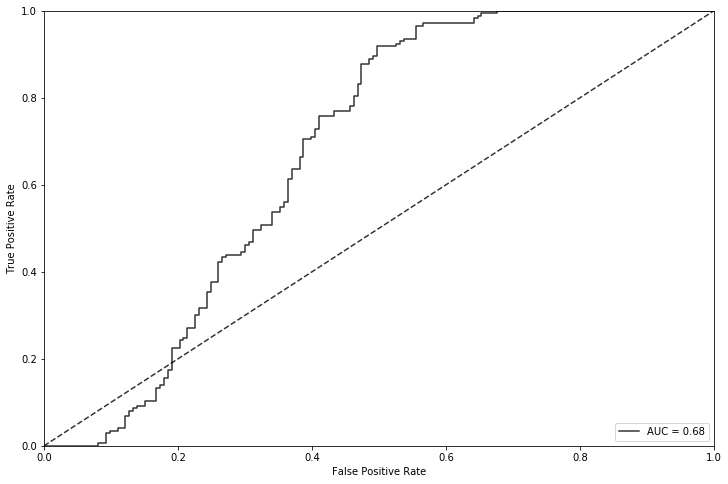

[0.02452342 0.21786409 0.31232089 0.04020196 0.08128148 0.04229385
 0.04342222 0.04375259 0.04013304 0.03826074 0.02161584 0.04818974
 0.04614013]


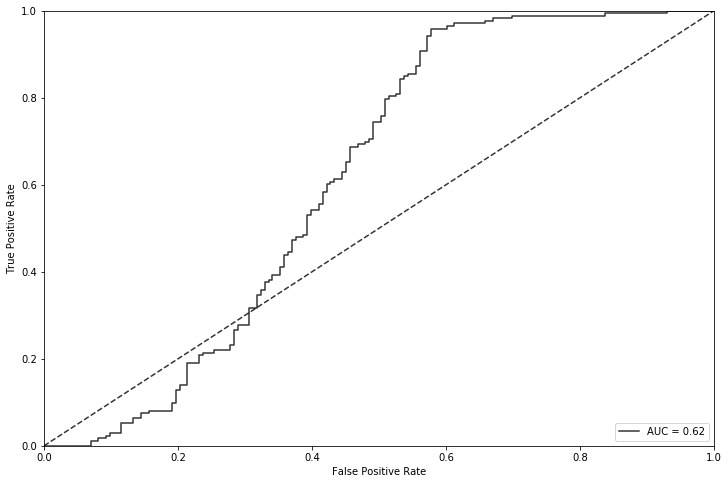

[0.02926848 0.26189776 0.26213493 0.06819785 0.06936334 0.02928634
 0.0491917  0.05063978 0.03583964 0.02335555 0.03080196 0.04795839
 0.04206429]


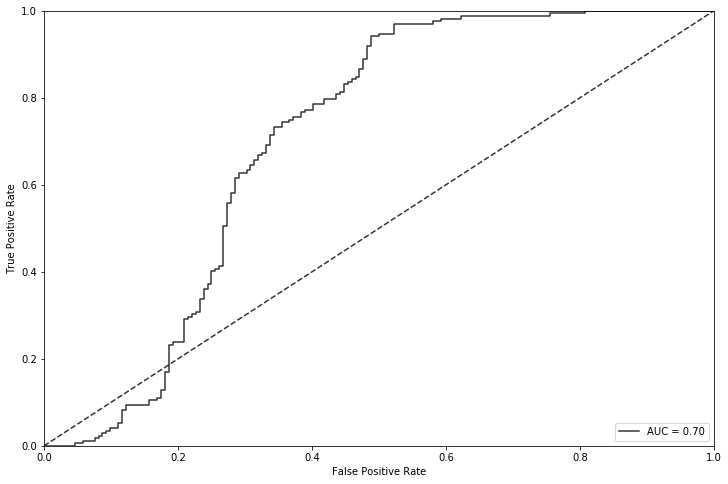

[0.01745498 0.22359798 0.22754496 0.07955702 0.08123895 0.03771456
 0.0470905  0.04541675 0.03185591 0.02386739 0.04694516 0.07629891
 0.06141693]


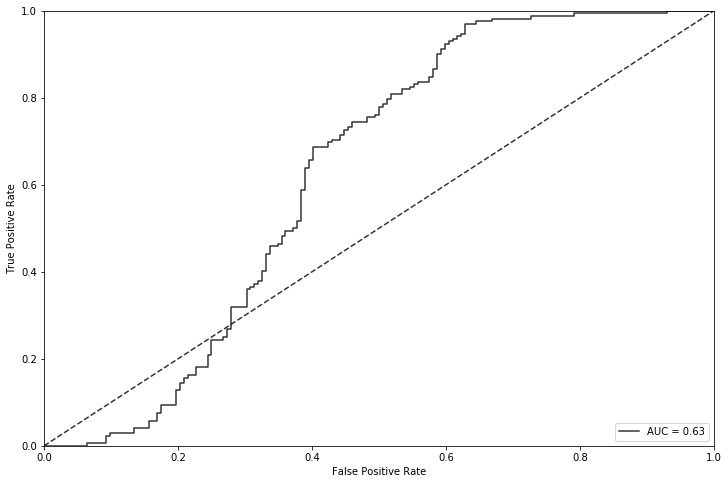

[0.04128565 0.23032858 0.2975203  0.03512405 0.07470413 0.03095354
 0.04275884 0.04510023 0.0246359  0.03051542 0.02389356 0.06995951
 0.05322029]


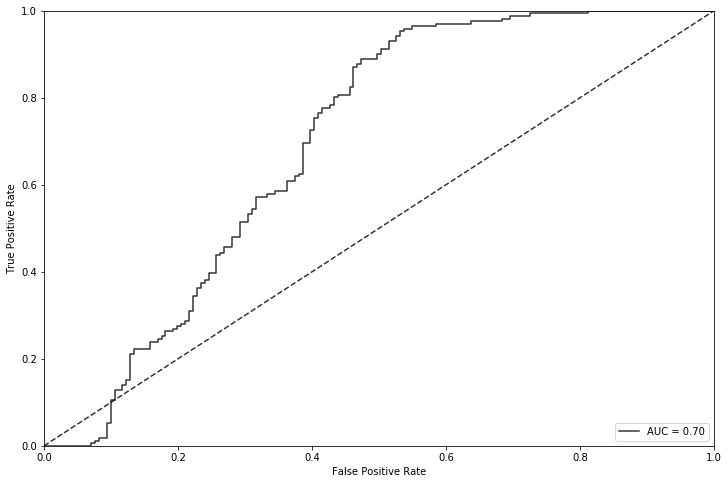

[0.03433296 0.1993428  0.27125828 0.04843805 0.09468116 0.02907686
 0.03624254 0.04004158 0.04612048 0.02449185 0.03137765 0.09998499
 0.0446108 ]


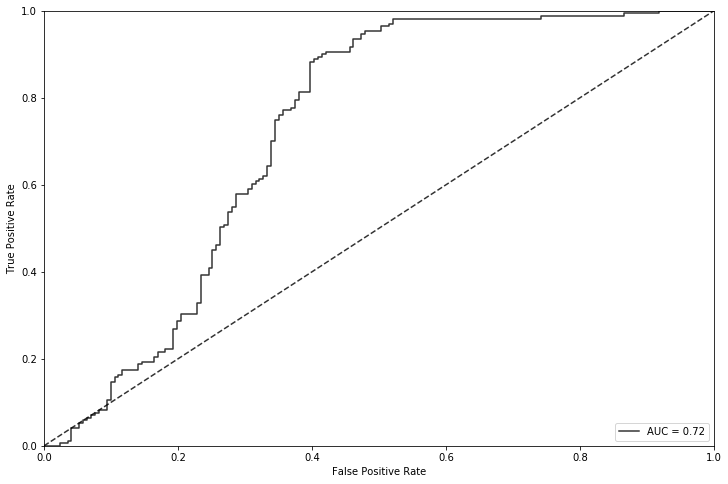

[0.02268256 0.22471292 0.27008486 0.05214979 0.08369683 0.0403284
 0.03577683 0.04447009 0.03982199 0.02233334 0.05543124 0.05335038
 0.05516077]


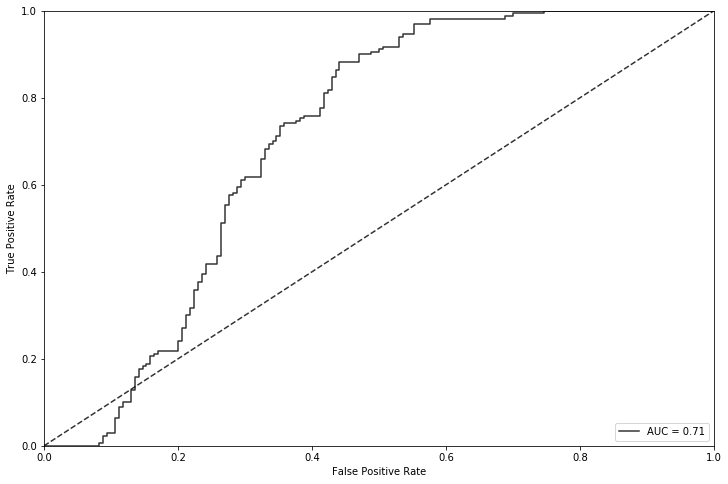

[0.03208253 0.28190402 0.23438218 0.01409785 0.07518768 0.04159577
 0.03941448 0.05051913 0.02917753 0.02783962 0.03190561 0.08915599
 0.05273762]


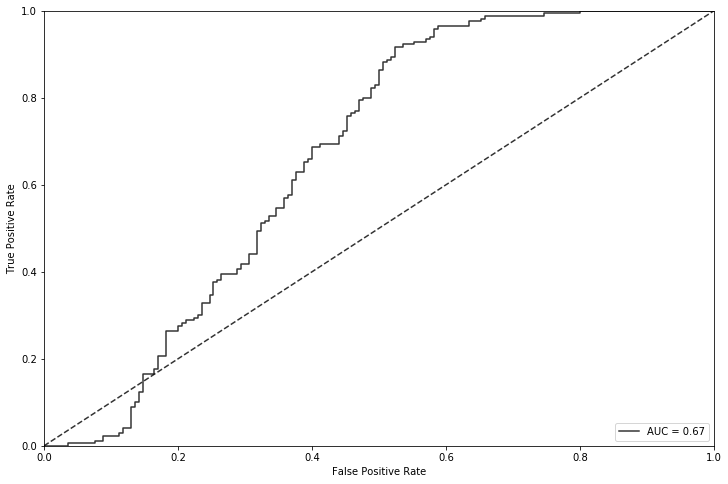

[0.04009455 0.26355754 0.24095453 0.04603748 0.07461745 0.05642276
 0.03745453 0.04708572 0.02593835 0.02985763 0.04785037 0.04718437
 0.04294473]


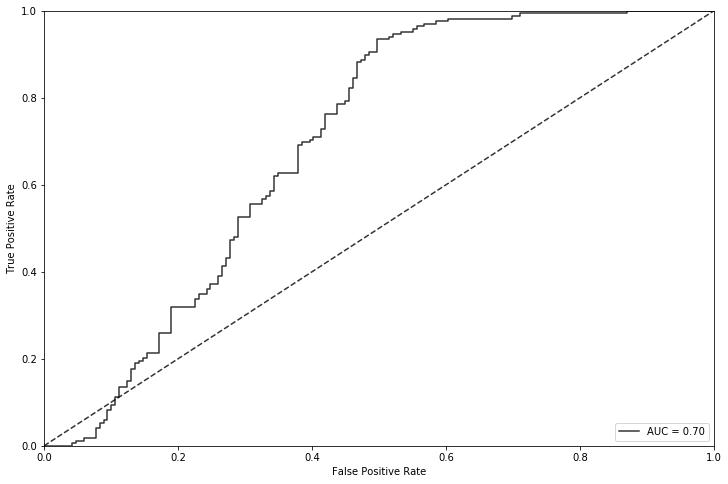

[0.01530362 0.26340072 0.31339209 0.05888353 0.06499093 0.04910196
 0.03297321 0.04014223 0.02040142 0.0199254  0.03150409 0.04491668
 0.04506412]


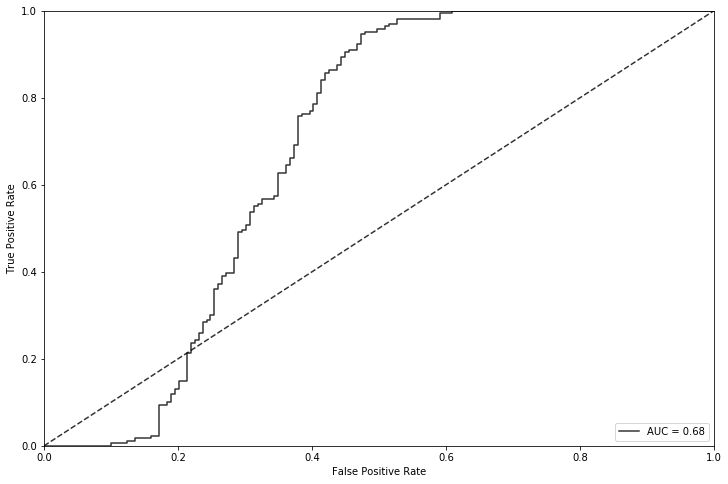

[0.03173516 0.2290369  0.29783908 0.04110814 0.09683544 0.03897678
 0.03856416 0.03840518 0.02429079 0.0372238  0.03717325 0.05727151
 0.03153981]


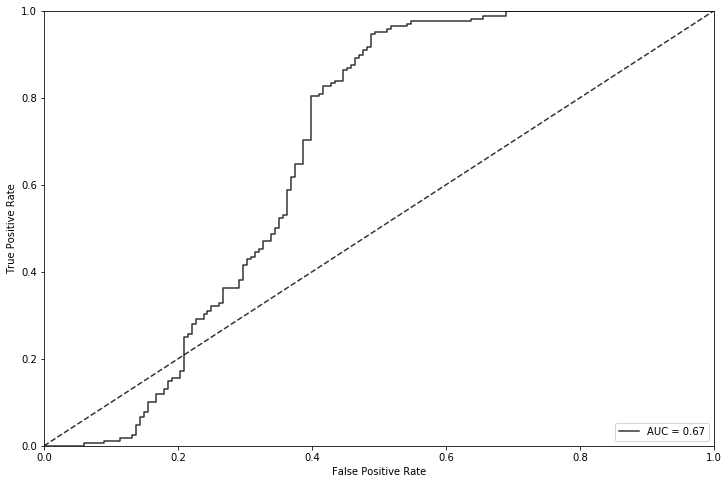

[0.03759156 0.30452368 0.23776782 0.03173003 0.07120961 0.03775533
 0.02812125 0.04930309 0.02963884 0.02707535 0.03873001 0.03670025
 0.06985316]


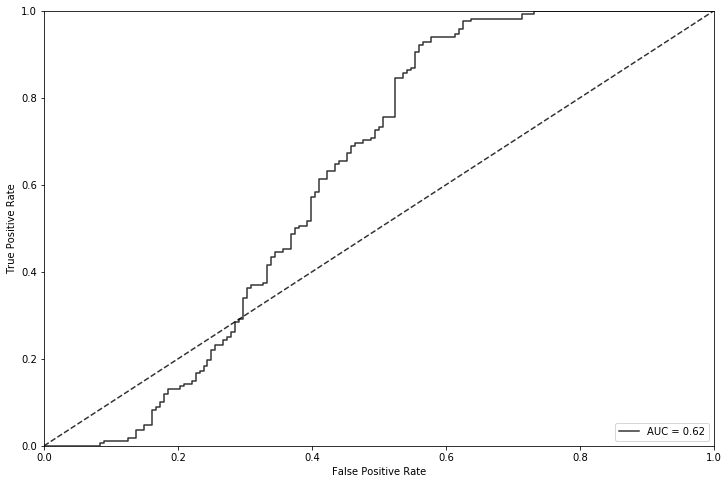

[0.01982467 0.27412924 0.22648705 0.02964699 0.05983971 0.0624571
 0.06042365 0.04612654 0.04347482 0.0224468  0.03650959 0.05184753
 0.06678632]


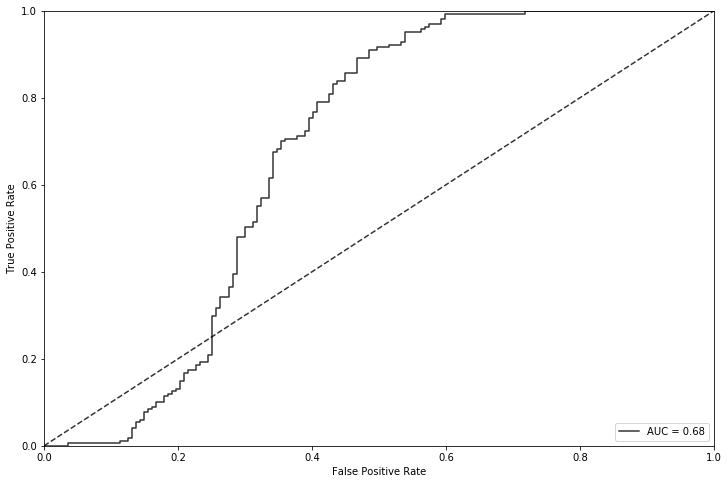

[0.03272518 0.23568229 0.21958067 0.04649768 0.0576892  0.03933998
 0.04233056 0.0432176  0.03050045 0.03763591 0.04028622 0.13303155
 0.04148272]


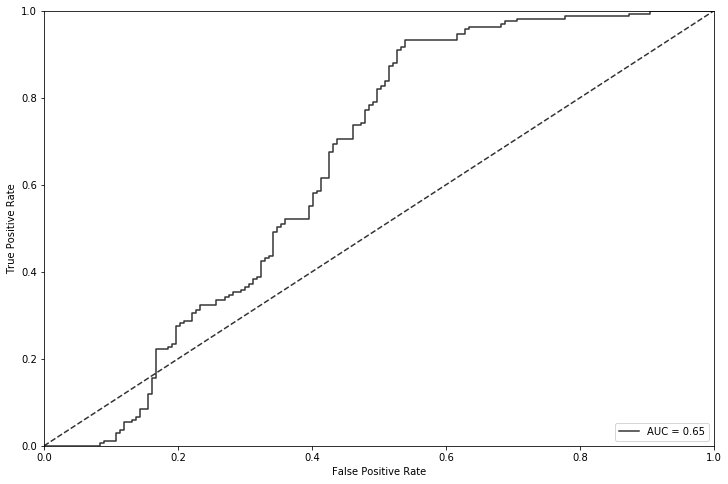

[0.04169046 0.22860853 0.25335135 0.01927517 0.10596269 0.03807844
 0.0350025  0.05157314 0.03298096 0.04022619 0.02434584 0.06703726
 0.06186748]


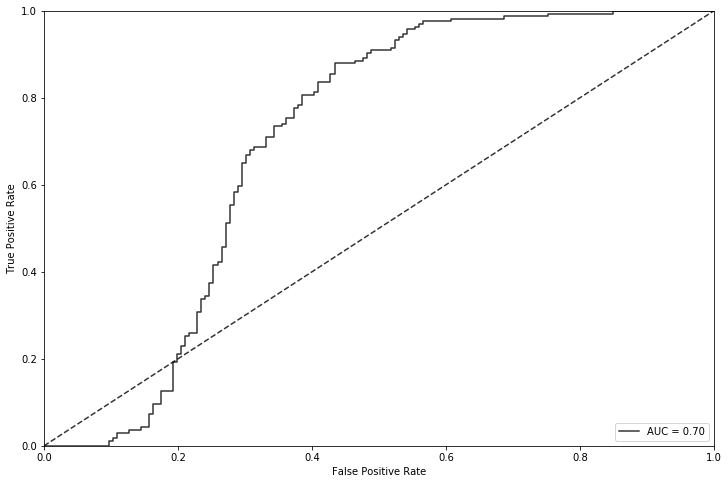

[0.0258118  0.26101516 0.24574127 0.04107069 0.06159191 0.09523537
 0.03862876 0.05643613 0.03358487 0.0375129  0.02222739 0.04996236
 0.0311814 ]


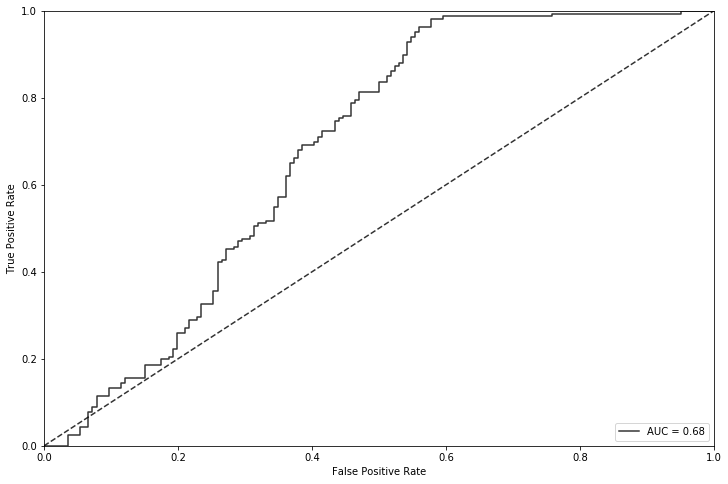

[0.03248168 0.21743303 0.28229075 0.06738533 0.06454898 0.04163079
 0.05358074 0.02772398 0.04737126 0.02791294 0.02040224 0.06780949
 0.04942879]


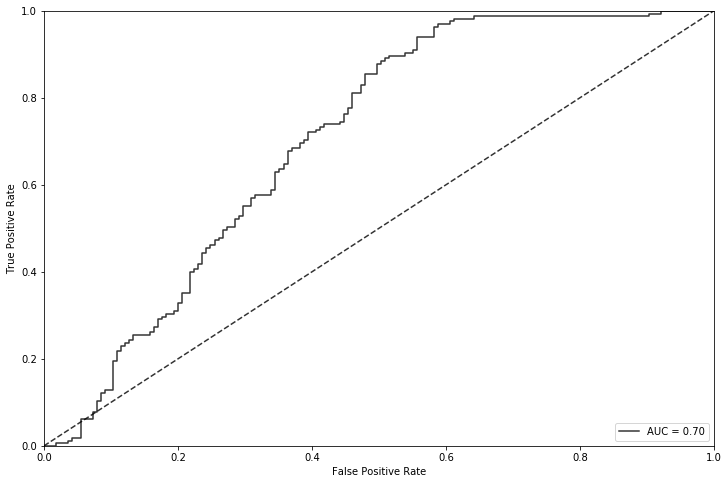

[0.02495931 0.25998638 0.26862064 0.0655088  0.05927236 0.0367479
 0.03978118 0.03209352 0.03530283 0.03973237 0.02985695 0.06170415
 0.04643362]


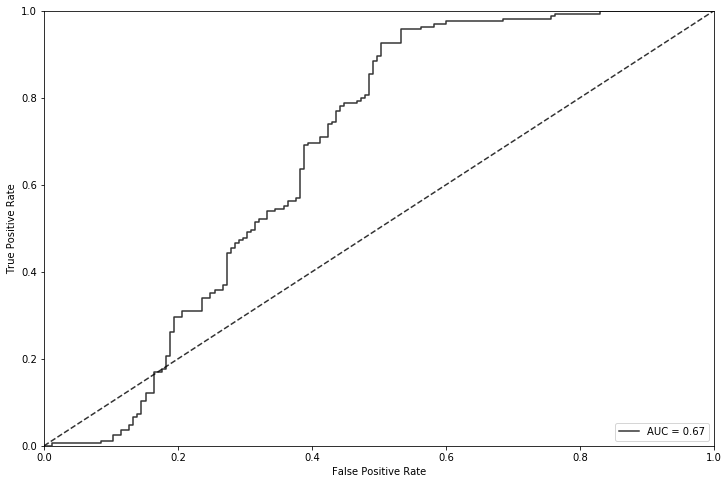

In [66]:
gbs = gbs_base.copy()

n = 579
iterations = 250
auroc = iterations*[0]

for ite in range(iterations):
    
    gbs = gbs.reindex(np.random.permutation(gbs.index))

    fst = int(n/2) #first half
    lst = n - fst  #second half

    df_1 = gbs.head(fst).copy()
    df_2 = gbs.tail(lst).copy()

    train = pd.concat([gesis.sample(n=lst), df_2])
    test = pd.concat([gesis.sample(n=fst), df_1])

    y = train.Umfrage
    X = train.drop(columns=['Umfrage'], axis=1).copy()
    clf = RandomForestClassifier(n_estimators=500, max_depth=4)
    clf.fit(X, y)
    print(clf.feature_importances_)

    y_test = test.Umfrage
    X_test = test.drop(columns=['Umfrage'], axis=1).copy()

    preds = [i[1] for i in clf.predict_proba(X_test)]
    
    auroc[ite] = roc(y_test, preds, ite/iterations, ite) 
    
    rem = df_1.drop(columns = ['Umfrage'], axis=1)
    result = [i[1] for i in clf.predict_proba(rem)]

    gbs = gbs.drop(gbs.index[np.argmax(result)]).copy()
    n = n-1

In [64]:
from PIL import Image


plt.savefig(os.path.join(path, 'tex/fig/roc/'+str(name)+'.png'))


for ite in range(iterations):
    img = Image.open(os.path.join(path, 'tex/fig/roc/'+str(name)+'.png'))
    img = img.convert("RGBA")
    datas = img.getdata()
    newData = []
    for item in datas:
        if item[0] == 255 and item[1] == 255 and item[2] == 255:
            newData.append((255, 255, 255, 0))
        else:
            newData.append(item)
    img.putdata(newData)
    img.save(os.path.join(path, 'tex/fig/roc/'+str(name)+'.png'), "PNG")

for ite in range(iterations):
    background = Image.open(os.path.join(path, 'tex/fig/roc/roc.png'))
    foreground = Image.open(os.path.join(path, 'tex/fig/roc/'+str(name)+'.png'))
    Image.alpha_composite(background,foreground).save(os.path.join(path, 'tex/fig/roc/roc.png'))